In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# **CCAI Tutorial:**
# Smart Meter Data Analytics: Practical Use-Cases and Best Practices of Machine Learning Applications for Energy Data in the Residential Sector

**Authors:**
* Tobias Brudermüller (Brudermueller), Bits to Energy Lab, ETH Zurich, tbrudermuell@ethz.ch
* Markus Kreft, Bits to Energy Lab, ETH Zurich, mkreft@ethz.ch

**Supervisors:**
* Prof. Dr. Elgar Fleisch, Bits to Energy Lab, ETH Zurich & University of St. Gallen
* Prof. Dr. Thorsten Staake, Bits to Energy Lab, ETH Zurich & University of Bamberg

**Funding:**
- The authors note that their research in smart meter data analytics is funded by the Swiss Federal Office of Energy under grant number SI/502257 and SI/502271.

This notebook is part of a series of tutorials at the [ICLR 2023 Workshop on Tackling Climate Change with Machine Learning](https://www.climatechange.ai/events/iclr2023).

# **Key Learning Objectives** 🎯
In this tutorial, we provide a practical guide to current trends in smart meter data analytics. In particular, we focus on feature engineering and machine learning scenarios for energy data. During this tutorial:

- You will gain insights into current trends and use cases in the energy space.
- You will learn best practices for energy data visualization.
- You will apply both machine learning approaches and data mining techniques to real-world energy data.
- You will get a sense of typical and atypical energy use in a residential building.

In addition, some concepts offer the possibility of being applied to other time series data outside of the energy domain.

**Note:** We would also like to point out that some utilities allow their customers access to their own smart meter data either through customer portals or upon request. If you have an active smart meter at home, you can use this guide as a starting point for analyzing your own energy usage.

### **Abstract:**
To cope with climate change, the energy system is undergoing a massive transformation. Due to the electrification of all sectors, the power grid is facing high additional demand. As a result, the digitization of the grid is increasingly gaining attention. The smart grid relies heavily on the increasing deployment of smart meters around the world. The corresponding smart meter data is typically a time series of power or energy measurements with a resolution between 1 s and 60 min. This data provides valuable insights and opportunities for monitoring and controlling activities on the power grid.

In this tutorial, we therefore provide an overview of best practices for analyzing smart meter data. We focus on machine learning applications and low resolution (15 min) energy data in a residential setting. We use only real-world data and cover use cases that are highly relevant to practical applications. Although this tutorial is specifically tailored for an energy audience, we believe that anyone in the data analytics and machine learning field can benefit from it, as many techniques are applicable to all time series data. Through our tutorial, we hope to foster new ideas, contribute to interdisciplinary exchange between different research fields, and educate people about energy use.

### **Target Audience:**
In the best case, you have already worked with Python and have some basic knowledge of machine learning. Nevertheless, this tutorial can be completed and understood by anyone with basic programming skills.

- If you are a **student**, this tutorial will provide you with a practical introduction to applying machine learning to time series data.
- If you are a **researcher in machine learning**, you can use this tutorial to find ideas for your research and potential data sets for benchmarking.
- If you work for a **utility**, this tutorial will provide you with an overview of practical use cases and the current state of the art in smart meter data analytics.
- If you are an **individual** interested in energy-related topics, you can learn more about smart grid applications and energy consumption in this tutorial.

<a name=outline></a>
# **Outline** 🧭

**1.** [**Introduction to smart meter data**](#introduction)
  1. [What is smart meter data?](#what_is_smd)
  2. [Relevance for tackling climate change](#climate_change_relevance)
  3. [Chances and limitations](#chances_limitations)
  4. [Power vs. energy measurements](#power_vs_energy)
  5. [Data resolution](#data_resolution)
  6. [Data availability](#data_availability)
  7. [Contextual information and domain knowledge](#context_and_domain_knowledge)
  7. [Making use of additional data sources](#using_additional_data_sources)

**2.** [**Preparations for this tutorial**](#tutorial_preparations)
  1. [Importing packages](#package_imports)
  2. [Importing the data](#data_imports)

**3.** [**Best practices for visualizing smart meter data**](#visualizing_smd)
  1. [Time-series visualizations of energy data](#time_series_visualizations)
  2. [Visualizing distributions of energy consumption](#visualizing_distributions)
  3. [Multi-dimensional visualizations](#multidimensional_visualizations)
  4. [Annotating visualizations with additional context information](#annotating_visualizations)
  5. [Displaying aggregated demand](#displaying_aggregated_demand)

**4.** [**Pre-processing smart meter data**](#preprocessing_smd)
  1. [Combining smart meter data with temperature data](#combining_smd_weather)
  2. [Add additional information for filtering timestamps](#adding_time_information)
  3. [Normalization methods](#normalization_methods)
  4. [Interpolation methods and downsampling](#interpolation_methods)
  5. [Outlier detection with Hampel filter](#outlier_detection_hampel)
  6. [Simple baseload estimation](#simple_baseload_estimation)
  7. [Enhancing small activities](#small_activities)
  8. [Detecting switching activities](#detecting_switching_activities)
  9. [Sliding window approaches](#sliding_window_approaches)
  10. [Feature extraction](#feature_extraction)
  11. [Detecting peaks in distribution](#distributional_peak_detection)
  12. [Frequency-based methods for low-resolution data](#frequency_based_methods)

**5.** [**Non-Intrusive Load Monitoring (NILM) / Load Disaggregation**](#nilm)
  1. [Using classification algorithms to detect appliance installations](#classification_for_appliance_detection)
  2. [Applying simple deep learning models for NILM](#nilm_deep_learning)
  3. [Applying Hidden Markov Models for NILM](#nilm_hmm)
  4. [Correctly evaluating NILM approaches](#evaluating_nilm)
  5. [Rule-based heuristics for pattern isolations](#rule_based_heuristics)


**6.** [**Flexibility Estimation**](#flexibility_estimation)
  1. [Estimating load shifting potential of disaggregated appliances](#load_shifting_potential)

**7.** [**Anomaly Detection**](#anomaly_detection)
  1. [Introduction to online vs. offline change point detection](#online_vs_offline_cpd)
  2. [Finding state changes with offline change point detection](#applying_offline_cpd)
  3. [Finding anomalies with sliding window](#finding_anomalies_sliding_window)
  4. [Applying Symbolic Aggregate ApproXimation](#applying_sax)
  5. [Finding discords and motifs](#finding_discords_and_motifs)

**8.** [**Customer segmentation**](#customer_segmentation)
  1. [Extraction of energy signatures through regression](#energy_signatures)
  2. [Extraction of average day profiles](#average_day_profiles)
  3. [Applying clustering algorithms](#clustering_algorithms)

**9.** [**Load Forecasting**](#load_forecasting)
  1. [Brief and short introduction](#load_forecasting_introduction) (*as the topic has already been covered in previous CCAI-tutorial*)

**10.** [**Conclusion**](#conclusion)

**11.** [**Additional Resources**](#additional_resources)
  1. [Data Sets](#resources_data_sets)
  2. [Software Packages](#resources_software)
  3. [Other](#resources_other)

**12.** [**References**](#references)

<a name="introduction"></a>
# **1. Introduction to smart meter data** 🔌

<a name="what_is_smd"></a>
### **1.1 What is smart meter data?**

The name **smart meter data (SMD)** comes from its measuring device - a so-called **smart meter**. This is a connected electricity meter that measures and transmits information about the electricity consumption of the building or apartment in which it is installed. Most smart meters provide time series data with a resolution of a few minutes to hours.

<a name="climate_change_relevance"></a>
### **1.2 Relevance for tackling climate change**
In [15], the International Energy Agency (IEA) summarizes the **status quo and current trends of the energy transition**. According to this article [15], global energy-related emissions will reach an all-time high of 36.6 Gt in 2021. With particular focus on electricity generation, distribution and demand, the following can be observed:

- **Increasing electricity demand:** The IEA expects global electricity demand to increase by 25-30% by 2030, partly due to more electric motors, electric vehicles, heat pumps, and hydrogen production [15], but generally due to electrification in all sectors.
- **Increasing share of renewables:** While most of the world's electricity still comes from fossil fuels, faster adoption of renewables is not only needed but already happening [15].  
- **Energy efficiency needed:** To meet the increasing demand for electricity from renewables, new technologies and efficiency measures are needed to reduce the amount of energy required per good or service [15].
- **Expanding access to electricity:** As of 2019, 770 million people still did not have access to electricity [15]. As stated in the United Nations Sustainable Development Goals (SDGs), everyone should have access to electricity, which requires even more effort on all of the above.

In order to achieve net zero emissions by the middle of the century, the energy sector is currently undergoing a massive transformation. This also requires digitization of the power grid to ensure a stable power supply for the energy-hungry modern society. In this context, **smart metering infrastructure plays a critical role in combating climate change** by enabling more efficient use of energy resources and reducing carbon emissions, in particular for:

- **Accurate monitoring:** Smart meters can provide feedback (in real time) to individuals and businesses on energy consumption. This has been shown to have a strong impact on behavioral changes in energy consumption [16, 17, 18].
- **Demand response:** Smart meters enable demand response programs, where consumers are incentivized to reduce their energy consumption during peak periods. This can help utilities reduce the need for expensive and carbon-intensive infrastructure that is only needed to meet peak demand [22].
- **Renewable energy integration:** By providing real-time data on energy demand and supply, smart meters can help utilities balance the grid and ensure that renewable energy sources are used efficiently [20].
- **Energy Efficiency:** Smart meters can help identify areas where energy is being wasted or used inefficiently. This can lead to lower carbon emissions and a more sustainable energy system [19, 21].


<a name=chances_limitations></a>
### **1.3 Chances and limitations**

Despite some challenges in deploying smart metering systems, smart meter data has the potential to bring significant benefits to households, businesses, and utilities.

**Opportunities and benefits:**
- More accurate data compared to traditional analog meters
- Can help understand energy use and promote energy efficiency
- Can increase customer engagement and lead to energy and cost savings
- Can improve billing accuracy
- Provides capabilities to monitor and control activity on the electric grid
- Can help optimize power distribution and increase power grid stability

**Limitations:**
- Secure data management must be in place, as smart meter data is sensitive information and some customers may have privacy concerns *(for more information, see [24]: Data protection impact assessment for smart grid and smart metering environment by the European Commission)*
- Requires significant investment from utilities and customers, as smart meters and related infrastructure can be expensive to install and deploy
- Smart meters can be compromised by errors in data collection.
- Contextual information is often required to interpret data.
- The type and resolution of measurements can vary, leading to challenges in data analysis

<a name=power_vs_energy></a>
### **1.4 Power vs. energy measurements**

Without getting too technical in the sense of energy science, it is important to note that the term smart meter data can refer to different types of measurements. Specifically, a smart meter can measure the following:

- **Active power:** measured in *Watts (W)* or *Kilowatts (kW)* is the real power actually consumed by an appliance or system to do useful work.
- **Reactive power:** measured in *volt-ampere reactive (VAR)*, is the power required for electric and magnetic fields in an AC circuit, e.g., to operate motors and transformers.
- **Apparent power:** measured in *volt-amperes (VA)* is the combination of active and reactive power.
- **Phase angle:** is the phase difference between voltages and currents in circuits that use more than just resistors as components.
- **Energy:** is measured in *kilowatt-hours (kWh)* and is the result of multiplying active power by time, e.g., if a 100-W light bulb is on for one hour, it consumes 100 Wh = 0.1 kWh of energy.

The phase angle, active, reactive, and apparent power are connected with each other through the so-called **power triangle** (see figure below).

**We further note that in the following, we mostly refer to energy data, but for simplification sometimes transform the data into approximations of average power by using multiplication factors.**

 <div class="myfig" style="width: 200px;">
 <a id="fig:power-phase-angle"></a>
<figure>
<p>
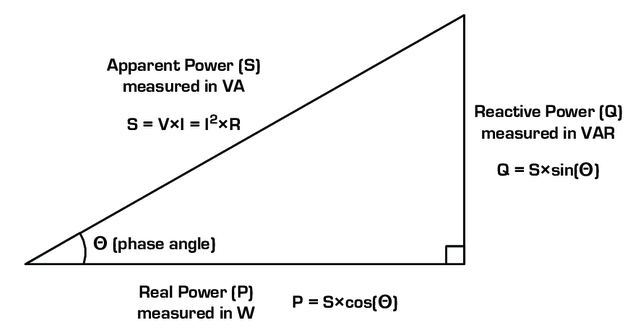
</p>
<figcaption style="font-size: 18px; color: #444444">Figure 1: Power Triangle (visualization taken from [1]).</figcaption>
</figure>
</div>

<a name=data_resolution></a>
### **1.5 Data resolution**
Resolution refers to the frequency with which data is recorded and transmitted. For smart meter data, it can range from **low resolution data** that is recorded only once per day or less frequently to **high resolution data** that is recorded several times per hour or even more frequently.
Resolution depends on several factors, including the meter itself, the utility's data management, the desired use case, and most importantly, the communication channel for the data. For example, in more rural areas, data may be transmitted over the power line, which requires a lower resolution [2]. The **most typical resolutions** are: 15-minute, 30-minute, 1-hour, 1-day, or 1-second.

**Only low-resolution data is used in this tutorial**, as this is the most common case and high-resolution data can be downsampled.

<a name=data_availability></a>
### **1.6 Data availability**

**Hundreds of millions of smart meters have already been installed worldwide, and deployment continues.** In 2016, 71 million smart meters were already installed in the United States, covering nearly half of all U.S. electricity customers [3]. Deployment in key Asian markets (China, India, Japan, and South Korea) is also growing rapidly. In 2019, total smart meter penetration in this region was 69% (653.3 million units), and 572.3 million additional units are expected to be installed between 2021 and 2025 [4]. In the European Union, most countries are expected to reach a deployment rate of at least 80% during 2020-2025, while some countries are already using second-generation devices [5]. This means that the rollout of smart meters is still ongoing and is a continuous effort.

**The following must therefore be taken into account** when analyzing smart meter data:
- **Different start times:** Smart meters are installed and activated at different times, i.e., individual time series of households have different start times.
- **Different end times:** Smart meter data is usually identified by a customer and a location, i.e. individual time series may end at different times, e.g. when a customer changes location.
- **Missing data:** Smart meters may experience outages, i.e., gaps may occur in some time ranges of the time series. For example, if outages vary significantly within a studied population, this makes it difficult to compare households in terms of annual energy consumption.
- **Erroneous readings:** Smart meters can have errors and transmit data that is not meaningful. We recommend always being critical and reasoning carefully. Check and discuss with colleagues and peers whether your interpretations seem reasonable.
- **Multiple Smart Meters:** In most cases, a single smart meter measures all appliances in a household. However, sometimes more than one smart meter is installed in a building to measure appliances separately (e.g., when special tariffs are offered).

See the [section on smart meter data pre-processing](#preprocessing_smd) to learn how to handle these aspects to make data from different households comparable.


<a name=context_and_domain_knowledge></a>
### **1.7 Contextual information and domain knowledge**

**There are many factors that influence energy consumption, such as**:
- Building type (e.g., apartment vs. single-family home).
- Size of the building
- Building insulation (often depends on the age of the building)
- Number of occupants
- Type of equipment (e.g., electric vehicle present or not)
- Building is heated electrically (e.g., with a heat pump) or with fossil fuels
- Electric or non-electric water heating
- Installation of a photovoltaic (PV) system

This means that the smart meter data can vary significantly depending on these factors. For example, a household may triple its annual energy consumption by installing a heat pump. **We recommend that when working with smart meter data, you try to get as much contextual information as possible.** Often this requires the use of additional data sources. The more you work with smart meter data, the more you will get a sense of its patterns, which will allow you to better interpret data without context. For example, in a [later section on load disaggregation](#nilm) you will see that device installations behave quite differently, and in [another section](#anomaly_detection) you will learn how to find anomalies in smart meter data.


<a name=using_additional_data_sources></a>
### **1.8. Making use of additional data sources**

As mentioned in the previous section, contextual information can help to interpret smart meter data correctly and make it comparable between households. For example, to identify patterns that are specific to a particular group of households, you can use survey data, as is often done in research projects. Alternatively, you can look for publicly available data sources that can provide context. However, this often requires knowledge of the exact address of each location to be studied and some additional effort to automate the search for contextual information. **Useful data sources may include:**
- Weather data services
- Data sets on PV installations
- Local or national geographic information systems  
- National building register databases

[Bring me back to the outline](#outline)

<a name=tutorial_preparations></a>
# **2. Preparations for this tutorial**
For this tutorial to work, we need to import some packages and of course some smart meter data.
Even if you only want to work on some sections of the tutorial, you should run the cells provided in this chapter beforehand.

<a name=package_imports></a>
### **2.1 Importing Packages**

First, we **install and import the necessary Python packages**. Other potentially useful software tools that we do not use in this tutorial can be found in one of the last sections on [additional resources](#resources_software).

In [ ]:
%%capture
!pip install ruptures
!pip install saxpy
!pip install tsfresh

In [ ]:
# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# package for change point detection
import ruptures as rpt

# package for SAX
from saxpy.hotsax import *
from saxpy.sax import sax_via_window

# package for feature training
import tsfresh

# sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans

# set global variables about the time-zone (used by pandas and matplotlib)
TZ_LOCAL = 'Europe/Zurich'
plt.rcParams['timezone'] = TZ_LOCAL
plt.rcParams['figure.dpi'] = 100

<a name=data_imports></a>
### **2.2 Importing the data**

Next, we import some **smart meter data in 15-minute resolution**, which will serve as **example** in this tutorial. This data comes from real households in Switzerland and is provided by a local utility company. We have four households, each with two separate smart meters. All households have a heat pump installed for heating purposes, which is measured by one separate smart meter. All other appliances are measured by the second smart meter. In addition to the smart meter data, we also load temperature measurements from a nearby weather station. We will use this data in later sections of this tutorial.

If you would like to apply what you have learned in this tutorial to alternative, publicly available data sets yourself, you can find some references in a [section at the end of this tutorial](#resources_data_sets).

In [ ]:
# ---------------------
# DEFINE HELPER METHODS
# ---------------------

def load_remote_data(url, filename, index_col):
  '''
    Loads the data from an URL and file name.
    Args:
      url: Google Drive URL to file
      filename: name of file
      index_col: the column name to set the index to
    Returns:
      data frame
  '''
  # if the data is not yet downloaded, retrieve it by URL
  if not os.path.isfile(filename):
    urllib.request.urlretrieve(url, filename)

  # load data with pandas
  df = pd.read_csv(filename, index_col=index_col)
  return df

def handle_timezones(df_smd, df_weather_daily, df_weather_hourly):
  '''
    Sets local timezones on data frames of smart meter and weather data.
    Args:
      df_smd: data frame holding smart meter data
      df_weather_daily: data frame holding daily temperature readings
      df_weather_hourly: data frame holding hourly temperature readings
  '''
  df_smd.index = pd.to_datetime(df_smd.index, format='%Y-%m-%d %H:%M:%S').tz_convert(TZ_LOCAL)
  df_weather_daily.index = pd.to_datetime(df_weather_daily.index, format='%Y-%m-%d').tz_localize('UTC')
  df_weather_hourly.index = pd.to_datetime(df_weather_hourly.index, format='%Y-%m-%d %H:%M:%S').tz_localize('UTC').tz_convert(TZ_LOCAL)

def get_household_file_ids(customer_number):
  '''
    For each customer defines the file-IDs in Google Drive.
    Args:
      customer_number: integer between 1 and 4 to identify the four example customers
    Returns:
      dictionary with file IDs for smart meter data, daily weather, and hourly weather
  '''
  return {
      1 : {'customer1_smd' : '1bQaj4Gu_rCHxKa1fQuu-yNp7ceCIrPbb', 'customer1_weather_daily' : '1qM2YguM7Ij3LHkPwplLSFQTEdYedjQ9y', 'customer1_weather_hourly' : '1qjDkM3TPmaeNEPHWMPgCkobbRVLpgcxc'},
      2 : {'customer2_smd' : '1swUbaR1960i46AGXHp1ZL3KV1uI44Kd8', 'customer2_weather_daily' : '1WQUAlz4AsMqjsg33rwoRyPko9qNHkiMz', 'customer2_weather_hourly' : '1b_Nk0gYKESw5EeBImICbg7uiIpNOpXe6'},
      3 : {'customer3_smd' : '1Cmv_oRtHx5PlHadaXhA2aqmmEOpNCnqB', 'customer3_weather_daily' : '15ErtjTLiKKMaBOv68HTgxbZ5fPEnsswF', 'customer3_weather_hourly' : '1nYOv-55n2DFpQYbcS88V2zL8-xCLlHr6'},
      4 : {'customer4_smd' : '1keacAOQGpPFYVM2MhQdaO-3c0DVtcsXl', 'customer4_weather_daily' : '1EddXm10v26MGlb0pYJgaaqemCTLGtlc_', 'customer4_weather_hourly' : '1PXdmlEZKt0mNbLJ7fWReJgmRPOAVh6EM'}
  }[customer_number]

def get_download_information(customer_number):
  '''
    For each customer get the file names and URLS for data download from Google Drive.
    Args:
      customer_number: integer between 1 and 4 to identify the four example customers
    Returns:
      dictionary with file names as keys and URLs as values
  '''
  d = {}
  for k, v in get_household_file_ids(customer_number).items():
    d[k+'.csv'] = 'https://drive.google.com/uc?id={}&export=download'.format(v)
  return d

def load_customer_data(customer_number):
  '''
    Loads the smart meter data, daily and hourly temperature readings for each of the four customers.
    Args:
      customer_number: integer between 1 and 4 to identify the four example customers
    Returns:
      sequence of df with smart meter, df with daily weather, df with hourly weather
  '''
  assert customer_number in range(1, 5), 'Customer number must be one of the following integers: 1, 2, 3, 4'
  d = get_download_information(customer_number)
  customer_id = 'customer{}_'.format(customer_number)

  # fetch data
  df_smd = load_remote_data(d[customer_id+'smd.csv'], customer_id+'smd.csv', 'Timestamp')
  df_weather_daily = load_remote_data(d[customer_id+'weather_daily.csv'], customer_id+'weather_daily.csv', 'date')
  df_weather_hourly = load_remote_data(d[customer_id+'weather_hourly.csv'], customer_id+'weather_hourly.csv', 'date_and_time')

  # handle time zones
  handle_timezones(df_smd, df_weather_daily, df_weather_hourly)

  return df_smd, df_weather_daily, df_weather_hourly

# ---------------------
# LOAD DATA
# ---------------------
customer = 4 # must be an integer - can be: 1, 2, 3, 4
df_smd, df_weather_daily, df_weather_hourly = load_customer_data(customer)
print('Loaded Data successfully for customer: {}'.format(customer))

Loaded Data successfully for customer: 4


Let's take a look at the data frame that contains the smart meter data.
The index of the frame contains the timestamps of the measurements.
There are three columns of energy values that reflect the total consumption in kilowatt hours (kWh) for each 15-minute time interval:
- **Value_HeatPump:** Consumtion of the heat pump measured by one smart meter
- **Value_OtherAppliances:** All other consumption in the household measured by a second smart meter
- **Value:** Sum of both measurements reflecting the total consumption

For now we will focus on the **total consumption**.

In [ ]:
display(df_smd)

Value  Value_HeatPump  Value_OtherAppliances
Timestamp                                                              
2019-11-20 00:00:00+01:00  0.736           0.682                  0.054
2019-11-20 00:15:00+01:00  1.216           1.126                  0.090
2019-11-20 00:30:00+01:00  0.488           0.450                  0.038
2019-11-20 00:45:00+01:00  0.065           0.023                  0.042
2019-11-20 01:00:00+01:00  0.650           0.608                  0.042
...                          ...             ...                    ...
2022-08-31 22:45:00+02:00  0.052           0.000                  0.052
2022-08-31 23:00:00+02:00  0.035           0.000                  0.035
2022-08-31 23:15:00+02:00  0.031           0.000                  0.031
2022-08-31 23:30:00+02:00  0.042           0.000                  0.042
2022-08-31 23:45:00+02:00  0.043           0.000                  0.043

[97532 rows x 3 columns]

Let's also look at the **daily and hourly weather data**. In the daily data frame, we have three columns for the minimum, maximum and average temperature in degrees Celsius (°C) on each day. The hourly data frame contains a single column with the temperature at each hour.

In [ ]:
display(df_weather_daily)
display(df_weather_hourly)

daily_mintemp  daily_maxtemp  daily_avgtemp
date                                                                  
2019-11-19 00:00:00+00:00              0              5              3
2019-11-20 00:00:00+00:00              2              7              4
2019-11-21 00:00:00+00:00              0              7              4
2019-11-22 00:00:00+00:00              0              6              4
2019-11-23 00:00:00+00:00              0              9              6
...                                  ...            ...            ...
2022-08-27 00:00:00+00:00             14             25             21
2022-08-28 00:00:00+00:00             13             24             20
2022-08-29 00:00:00+00:00             14             30             23
2022-08-30 00:00:00+00:00             16             20             19
2022-08-31 00:00:00+00:00             14             20             18

[1017 rows x 3 columns]

hourly_temperature
date_and_time                                
2019-11-19 01:00:00+01:00                   2
2019-11-19 02:00:00+01:00                   2
2019-11-19 03:00:00+01:00                   2
2019-11-19 04:00:00+01:00                   2
2019-11-19 05:00:00+01:00                   1
...                                       ...
2022-08-31 21:00:00+02:00                  18
2022-08-31 22:00:00+02:00                  18
2022-08-31 23:00:00+02:00                  17
2022-09-01 00:00:00+02:00                  17
2022-09-01 01:00:00+02:00                  16

[24408 rows x 1 columns]

In addition, for [later use in the context of clustering](#clustering_algorithms), we **load data of average daily profiles that we extracted for a few hundred households**.

In [ ]:
url = 'https://drive.google.com/uc?id=1bKNvlzOmm9063D-rgxC2lX1W8J-3zE5M&export=download'
df_profiles = load_remote_data(url, 'profiles.csv', 'id')
display(df_profiles)

0      1      2      3      4      5  \
id                                                                           
05799b091d77acb8963bc4f189cbbc94  0.021  0.020  0.018  0.015  0.014  0.014   
057c30dbdc165d5dbc8dfaba85be5be7  0.566  0.557  0.799  0.908  0.822  0.770   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.014  0.013  0.013  0.015  0.015  0.013   
057d57d2e17e556e76045ec53f58beb2  0.459  0.342  0.286  0.342  0.900  0.858   
057d990ed2aee058d63f15f30443f9e4  0.631  0.624  0.624  0.620  0.629  0.634   
...                                 ...    ...    ...    ...    ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.086  0.126  0.101  0.084  0.093  0.082   
a427d8292c36aadbf48269008ce844b3  0.620  0.480  0.437  0.522  0.842  0.413   
a428b13bc581d14804c35c1f6b4169be  2.800  3.114  3.097  2.848  2.614  2.765   
a429fd879fe72a1660cbd364cced304b  0.463  0.482  0.457  0.443  0.497  0.480   
a42a3bba9dcf618c93b5cbb32da24a32  0.445  0.509  0.362  0.367  0.754  0.709   

                                      6      7      8      9  ...     86  \
id                                                            ...          
05799b091d77acb8963bc4f189cbbc94  0.013  0.012  0.013  0.013  ...  0.056   
057c30dbdc165d5dbc8dfaba85be5be7  0.658  0.609  0.934  0.931  ...  0.040   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.013  0.015  0.015  0.014  ...  0.037   
057d57d2e17e556e76045ec53f58beb2  0.660  0.592  0.521  0.160  ...  0.113   
057d990ed2aee058d63f15f30443f9e4  0.632  0.634  0.638  0.632  ...  0.632   
...                                 ...    ...    ...    ...  ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.082  0.087  0.079  0.075  ...  0.166   
a427d8292c36aadbf48269008ce844b3  0.439  0.400  0.406  0.353  ...  0.476   
a428b13bc581d14804c35c1f6b4169be  2.877  3.013  3.371  2.895  ...  0.441   
a429fd879fe72a1660cbd364cced304b  0.531  0.475  0.398  0.283  ...  0.137   
a42a3bba9dcf618c93b5cbb32da24a32  0.681  0.273  0.224  0.117  ...  0.130   

                                     87     88     89     90     91     92  \
id                                                                           
05799b091d77acb8963bc4f189cbbc94  0.054  0.044  0.040  0.037  0.033  0.029   
057c30dbdc165d5dbc8dfaba85be5be7  0.040  0.581  0.752  0.773  0.782  0.713   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.034  0.033  0.034  0.032  0.029  0.025   
057d57d2e17e556e76045ec53f58beb2  0.180  0.727  0.723  0.719  0.529  0.431   
057d990ed2aee058d63f15f30443f9e4  0.618  0.612  0.617  0.624  0.622  0.624   
...                                 ...    ...    ...    ...    ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.163  0.176  0.193  0.166  0.136  0.142   
a427d8292c36aadbf48269008ce844b3  0.593  0.847  0.579  0.580  0.537  0.632   
a428b13bc581d14804c35c1f6b4169be  0.629  0.974  1.541  1.746  1.910  1.880   
a429fd879fe72a1660cbd364cced304b  0.189  0.417  0.357  0.374  0.369  0.232   
a42a3bba9dcf618c93b5cbb32da24a32  0.119  0.118  0.127  0.108  0.132  0.452   

                                     93     94     95  
id                                                     
05799b091d77acb8963bc4f189cbbc94  0.024  0.023  0.022  
057c30dbdc165d5dbc8dfaba85be5be7  0.563  0.470  0.528  
057c3fcbdcbfd97b9f8a50fb34f385d6  0.024  0.021  0.018  
057d57d2e17e556e76045ec53f58beb2  0.471  0.488  0.518  
057d990ed2aee058d63f15f30443f9e4  0.634  0.632  0.636  
...                                 ...    ...    ...  
a42793c65fddea7c1f8228f8d4742635  0.068  0.058  0.069  
a427d8292c36aadbf48269008ce844b3  0.433  0.415  0.438  
a428b13bc581d14804c35c1f6b4169be  2.270  2.557  2.546  
a429fd879fe72a1660cbd364cced304b  0.249  0.273  0.282  
a42a3bba9dcf618c93b5cbb32da24a32  0.540  0.494  0.332  

[1000 rows x 96 columns]

[Bring me back to the outline](#outline)

<a name=visualizing_smd></a>
# **3. Best practices for visualizing smart meter data** 🎨

Now that the data is loaded, let's examine it and get a feel for it. Instead of just printing out the values, it is very useful to display them graphically. This allows us to see patterns and behaviors quickly and intuitively. So here are some starting points and best practices for visualizing smart meter data.

<a name=time_series_visualizations></a>
### **3.1 Time-series visualizations of energy data**

The easiest way to display the data is in a **one-dimensional line chart** that shows the entire time span.
It is easy to see the range of data availability as well as the maximum values.
Large-scale trends within the data can also be seen.
However, this **visualization is too dense to observe more detailed behavior** and relate it to specific timestamps.

To solve this problem, we calculate the total energy consumption on each day and reduce the number of data points by a factor of $24h / 15min = 96$. Now we can see clear trends across seasons.

We can also reduce the density of the plot by only visualizing one week of data. Here we can see regular patterns that seem to repeat each day.

Another insightful way to examine such regularities is to **calculate the mean consumption profile by averaging the consumption at each time of day** over the entire period of measurements. Here we can clearly see a peak of increased consumption at night.

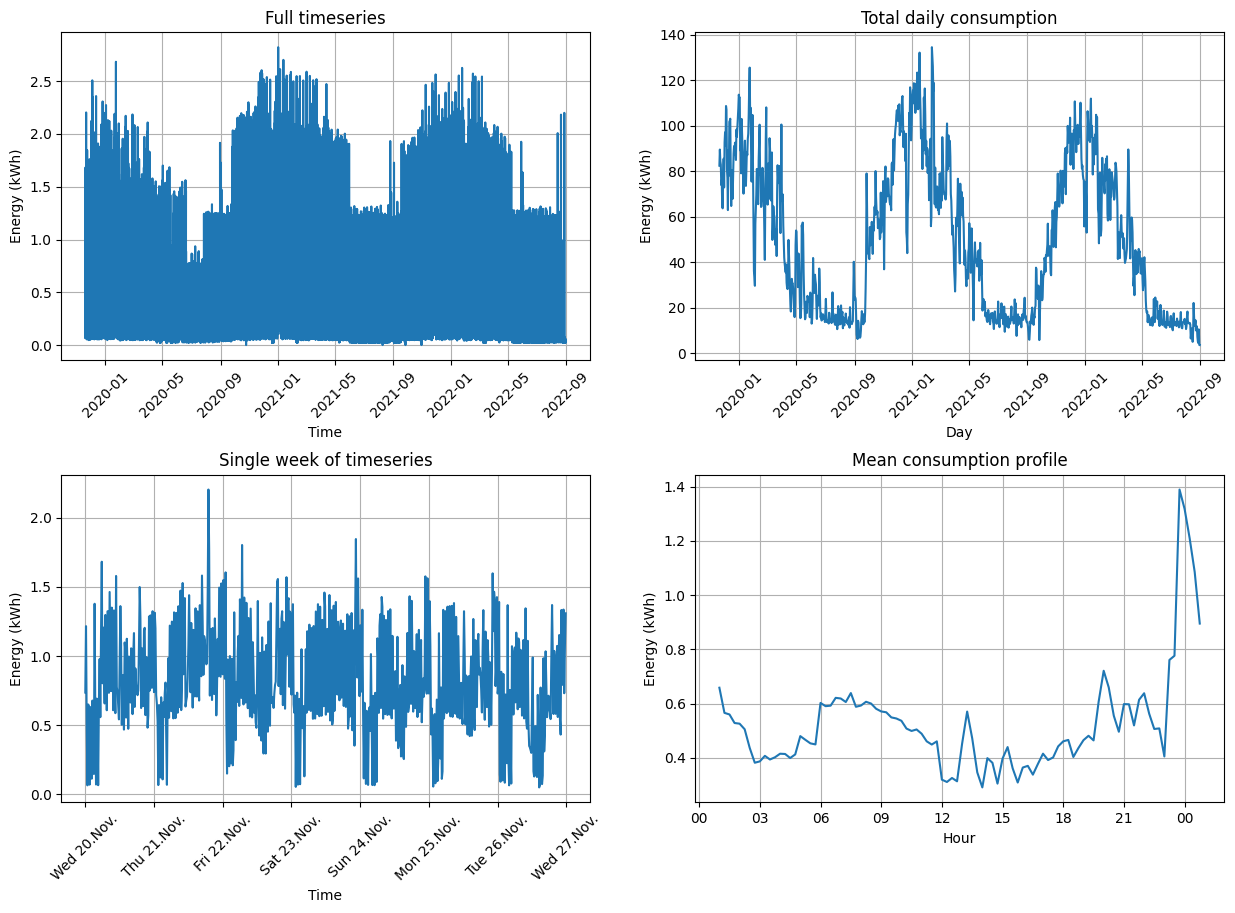

In [ ]:
# ------------------------
# DEFINE HELPER FUNCTIONS
# ------------------------

def plot_data(ax, df, column='Value'):
  if column is None:
    ax.plot(df)
  else:
    ax.plot(df[column])
  ax.xaxis.set_tick_params(rotation=45)
  ax.set_xlabel('Time')
  ax.set_ylabel('Energy (kWh)')
  ax.grid()

def calculate_daily_consumption(df, column='Value'):
  return df.groupby([df.index.date])[column].sum()

def plot_daily_consumption(ax, df):
  # Divide by 4 to convert 15 Wmin to 1 Wh
  ax.plot(df)
  ax.xaxis.set_tick_params(rotation=45)
  ax.set_xlabel('Day')
  ax.set_ylabel('Energy (kWh)')
  ax.set_title('Total daily consumption')
  ax.grid()

def calculate_mean_profile(df, column='Value'):
  mean_profile = df.groupby([df.index.time])[column].mean()
  mean_profile.index = mean_profile.index.map(lambda t: dt.datetime.combine(dt.datetime(year=1970, month=1, day=1), t))
  return mean_profile

def plot_mean_profile(ax, mean_profile):
  ax.plot(mean_profile)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
  ax.set_xlabel('Hour')
  ax.set_ylabel('Energy (kWh)')
  ax.set_title('Mean consumption profile')
  ax.grid()

# ------------------------
# CREATE THE GRAPHS
# ------------------------

# define a figure with two columns and two rows
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.35)

# plot first graph
plot_data(ax[0, 0], df_smd)
ax[0, 0].set_title('Full timeseries')

# plot the second graph
plot_daily_consumption(ax[0, 1], calculate_daily_consumption(df_smd))

# plot the third graph
plot_data(ax[1, 0], df_smd.iloc[:96 * 7, :])
ax[1, 0].set_title('Single week of timeseries')
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%b."))
ax[1, 0].xaxis.set_major_locator(mdates.AutoDateLocator())

# plot the fourth graph
plot_mean_profile(ax[1, 1], calculate_mean_profile(df_smd))

<a name=visualizing_distributions></a>
### **3.2 Visualizing distributions of energy consumption**

While it is very interesting to observe the evolution of energy consumption over time, it can also be informative to analyze **how often how much energy is consumed, i.e. the histogram of the values in the time series**.

In most cases, consumption is very low and the distribution falls off rapidly as energy increases.
However, there are peaks in the distribution that indicate recurring measurements with the same energy. These are indications of regularly running devices (see [later section](#distributional_peak_detection) in the context of pre-processing).

Plotting the distribution with a logarithmic scale of the y-axis reveals peaks with lower counts at higher energy.

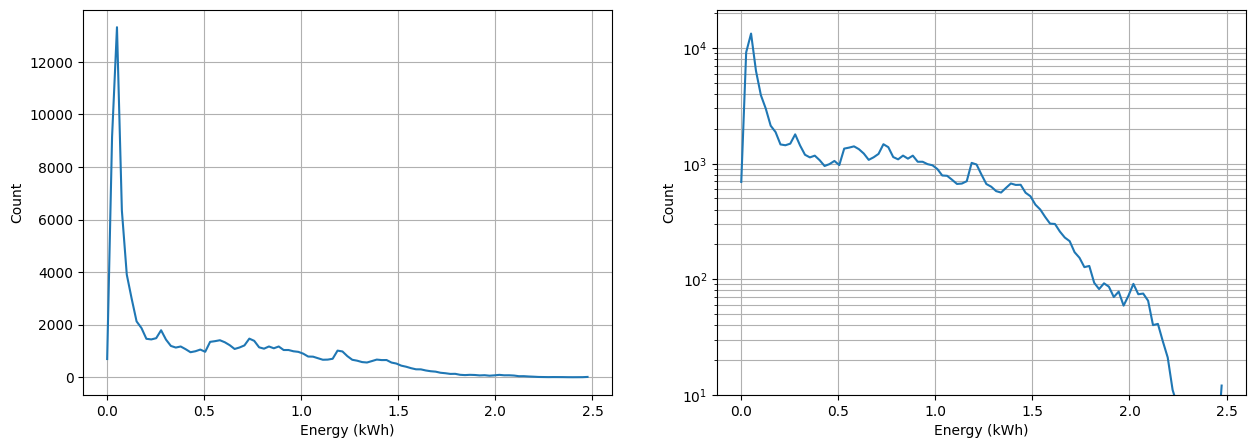

In [ ]:
# define the energy intervals to use for the histogram
bins = np.linspace(0, 2.5, 100)

# calculate the distribution of energy values
df_smd_hist, _ = np.histogram(df_smd['Value'], bins=bins)

# define a figure with two columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot the histogram
ax[0].plot(bins[:-1], df_smd_hist)
ax[0].set_xlabel('Energy (kWh)')
ax[0].set_ylabel('Count')
ax[0].grid()

# plot the histogram on a logarithmic scale
ax[1].plot(bins[:-1], df_smd_hist)
ax[1].set_yscale('log')
ax[1].set_ylim(10, None)
ax[1].set_xlabel('Energy (kWh)')
ax[1].set_ylabel('Count')
ax[1].grid(which='both')

<a name=multidimensional_visualizations></a>
### **3.3 Multi-dimensional visualizations**

The simple line graphs can be advantageous for plotting average data or short periods of time (e.g., a few days). However, observing longer periods in this way is difficult due to the density of the measurements. In the case of smart meter data, we are particularly interested in observing the behavior of prominent appliances and their regular on/off switching per day. **Heatmaps** are a very powerful method to visualize the corresponding time series patterns in a multidimensional way.

To achieve this, we **divide** each timestamp into day and time, which can be interpreted as transferring time in one dimension into a **two-dimensional space**. Consequently, the axes of the heatmap are as follows:
- **x-axis:** shows the date in chronological order from left to right.
- **y-axis:** shows the time of day in chronological order from top to bottom.

Now you can interpret the area spanned by x and y as a canvas that you can color according to the patterns generated by the smart meter data:
- The **position of each pixel** in the canvas is indicated by the date and time (i.e., the timestamp).
- The **color of each pixel** is defined by a mapping of the energy consumption at the given time to a continuous color scale.

Let's take a look at what that looks like!

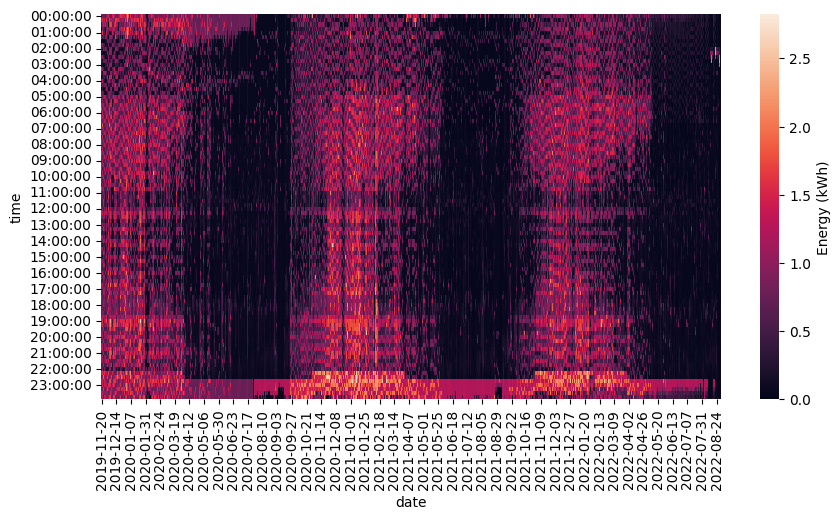

In [ ]:
# ------------------------
# DEFINE HELPER FUNCTION
# ------------------------

def create_heatmap(df, column, interval_minutes=15):
  # As we will add additional columns and do not want the original data to be affected, create copy of the original data frame
  data_df = df.copy()
  # Add columns for date and time
  data_df["date"] = df.index.date
  data_df["time"] = df.index.time
  # Define a function that handles duplicate values which can occur in local time due to daylight savings time
  # Using only the first datapoint instead of summing avoids unrealistically height demand
  get_first = lambda x: x.iloc[0]
  # Pivot dates and times to create a two dimensional representation
  data = data_df.pivot_table(index='time', columns='date', values=column, aggfunc=get_first, dropna=False)
  return data

# ------------------------
# CREATE THE FIGURE
# ------------------------

hm = create_heatmap(df_smd, column='Value')

fig_hm, ax_hm = plt.subplots(1, 1, figsize=(10, 5))
# Seaborn has a function to plot the dataframe including time labels for the axes
sns.heatmap(hm, ax=ax_hm, cbar_kws={'label': 'Energy (kWh)'})

fig.show()

Now we can see **patterns in the data over the entire time span** across both, seasons and hours of the day:
- activity is higher in winter than in summer because there is no heating in summer
- there seems to be a device that turns on very regularly every day
- the checkerboard pattern especially visible in winter is caused by a heat pump *(check out [6] if you want to learn more about its patterns in smart meter data)*.

We can also **visualize the heatmap data in a three-dimensional representation** that makes the consumption peaks even clearer.

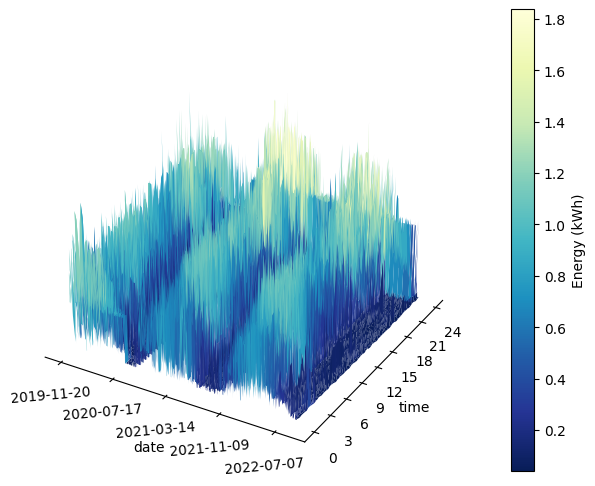

In [ ]:
# create a 3d figure
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='3d')

# Create meshgrid
X, Y = np.meshgrid(np.arange(hm.shape[1]), np.arange(hm.shape[0]))

# Plot the surface
plot = ax.plot_surface(X=X, Y=Y, Z=np.nan_to_num(hm.values), cmap='YlGnBu_r')

# set tick every three hours for the time axis
ax.set_yticks(ticks=range(0, 97, 3 * 4))
ax.set_yticklabels(labels=range(0, 25, 3))
ax.set_ylabel('time')

# set ticks for the date axis based on the heatmap above
ax.set_xticks(ax_hm.get_xticks()[::10])
ax.set_xticklabels(ax_hm.get_xticklabels()[::10], rotation=5)
ax.set_xlabel('date')

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)
# Remove z-axis
ax.zaxis.line.set_lw(0.)
ax.set_zticks([])
# ax.set_zlabel('Energy (kWh)')

fig.colorbar(plot, ax=ax, label='Energy (kWh)')

fig.show()

<a name=annotating_visualizations></a>
### **3.4 Annotating visualizations with additional context information**

To add **more useful information** to the figure, we enter the daily consumption previously studied and the average consumption profile along the x- and y-axes, respectively.
We also enter the times of sunrise and sunset on each day (as white lines in the heatmap), as these may be related to energy consumption for lighting and heating.
The upper insert shows the daily energy consumption (gray area) and the daily peak demand (black dots).
The right insert shows the average demand profile.

Since this figure requires quite a bit of code, we import a small script with some helper functions that we provide separately.

In [ ]:
# Clean up and download fresh version of the script
!rm -rf /content/iclr-smartmeteranalytics
!git clone --depth 1 https://github.com/bitstoenergy/iclr-smartmeteranalytics
import sys
# Add the script to the library path
sys.path.append('iclr-smartmeteranalytics')
import smartmeteranalytics as sma

Cloning into 'iclr-smartmeteranalytics'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 5.84 KiB | 2.92 MiB/s, done.


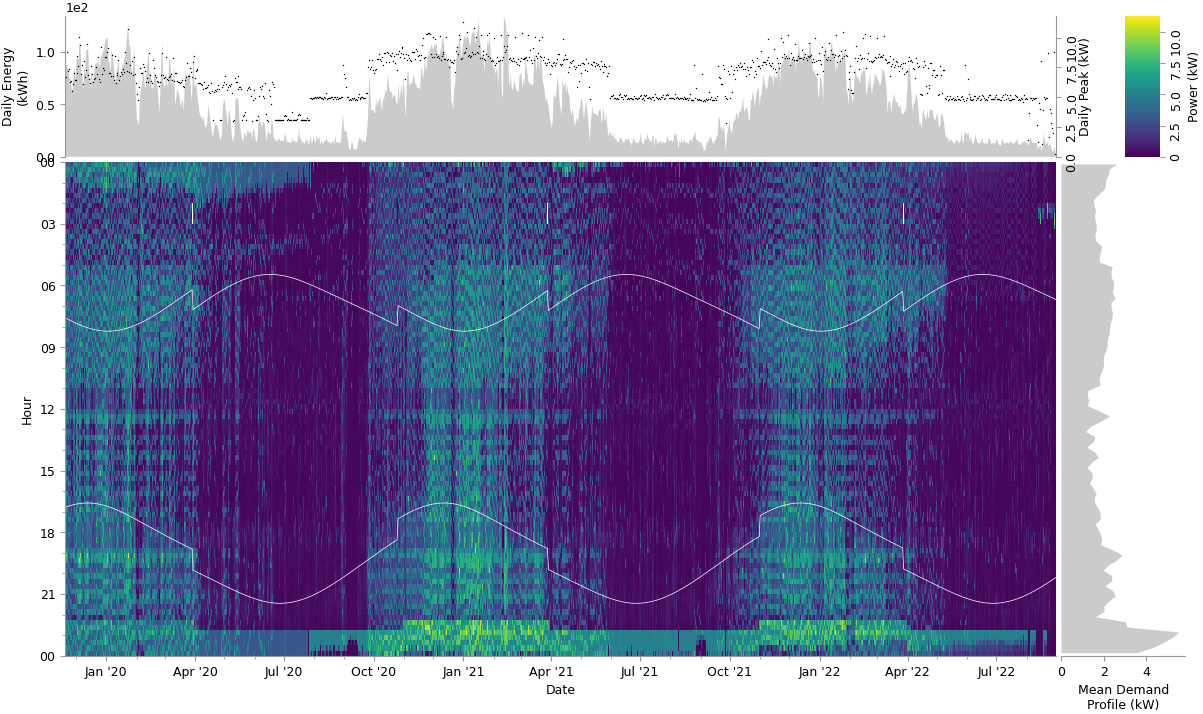

In [ ]:
df_smd_filled = df_smd.asfreq("15min", fill_value=pd.NA) * 4  # convert to power
fig = sma.HeatmapFigure(df_smd_filled, 'Value', figsize=(14, 8))
fig.show()

<a name=displaying_aggregated_demand></a>
### **3.5 Displaying aggregated demand**

Remember that the data frame contains not only the total consumption measured at the meter, but also two columns containing **separate measurements for the heat pump and all other appliances**.

When dealing with multiple time series, a **stacked area graph** can be interesting to visualize the individual data and their contribution to the combined consumption.
As an example, we show again the daily demand, while the other graphs from above can be easily created in a similar way.

In other situations, this type of visualization can also be useful when processing data from multiple households, for example, to analyze their consumption relative to the total demand at a transformer station.

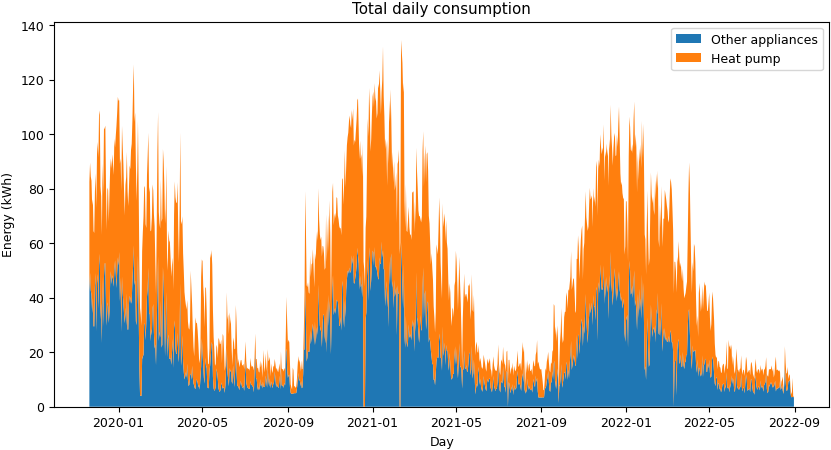

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# calculate the daily demand of the heat pump and the other appliances
daily_hp = df_smd.groupby([df_smd.index.date])['Value_HeatPump'].sum()
daily_other = df_smd.groupby([df_smd.index.date])['Value_OtherAppliances'].sum()

# create the stacked plot
ax.stackplot(daily_other.index, daily_other, daily_hp, labels=['Other appliances', 'Heat pump'])

ax.set_xlabel('Day')
ax.set_ylabel('Energy (kWh)')
ax.set_title('Total daily consumption')
ax.legend()
fig.show()

[Bring me back to the outline](#outline)

<a name=preprocessing_smd></a>
# **4. Pre-processing smart meter data** 🛠️

In some cases, it may be necessary to pre-process the data for analysis. In this section we present some best practices to be used in later sections.

<a name=combining_smd_weather></a>
### **4.1 Combining smart meter data with temperature data**

In order to interpret energy data correctly, a link to the local weather is often required. For example, if a building is heated or cooled electrically, the energy consumption often depends strongly on the outside temperature. Similarly, the energy consumption of a building with a photovoltaic (PV) system is most likely affected by the hours of sunshine on each day. Smart meter data and weather data often come from different data sources. Therefore, we will now show you how to merge **weather and energy data into one data frame**, which can facilitate any analysis.

- **Remember** that in a [section at the beginning](#data_imports) you have loaded not only the smart meter data, but also some temperature data in hourly and daily resolution.
- **Remember** that the *df_weather_daily* data frame contains only dates as indices (YYYY-MM-DD).
- **Remember** that the data frame *df_weather_hourly* contains dates and hours as indices (YYYY-MM-DD HH).
- **Remember** that the smart meter data *df_smd* contains dates and times as indices (YYYY-MM-DD HH:MM).

Let's look at how to handle these different types of timestamps.



In [ ]:
# --------------------------------
# DEFINE HELPER FUNCTION
# --------------------------------

def merge_smd_with_weather(df_smd, df_weather, hourly=False):
  '''
    Merges a weather data frame into the data frame containing the smart meter data.
    Can cope with daily and hourly weather.
    NOTE: assumes that parameters df_smd and df_weather have the timestamps as index and that they are of type pd.datetime
    Args:
      df_smd: the pandas data frame holding smart meter data
      df_smd: the pandas data frame holding weather data
      hourly: boolean to set to True if the weather data is in hourly resolution, otherwise assuming daily
    Returns:
      copy of the SMD data frame with the weather observations merged into it as additional columns
  '''

  # as we will add additional columns and do not want the original data to be affected, create copies of the original data frames
  df_smd_copy = df_smd.copy()
  df_weather_copy = df_weather.copy()

  # for merging convert the time zones back to UTC
  df_smd_copy.index = df_smd_copy.index.tz_convert('UTC')
  df_weather_copy.index = df_weather_copy.index.tz_convert('UTC') # for merging set to UTC

  # change the index to a multi index that distinguished between date and hour
  df_smd_copy.index = pd.MultiIndex.from_arrays(arrays=[df_smd_copy.index.date, df_smd_copy.index.hour], names=['date_temp', 'hour_temp'])
  df_weather_copy.index = pd.MultiIndex.from_arrays(arrays=[df_weather_copy.index.date, df_weather_copy.index.hour], names=['date_temp', 'hour_temp'])

  # merge the weather data into the smart meter data
  # (differs for hourly and daily weather data)
  if hourly:
    df_combined = df_smd_copy.merge(df_weather_copy, on=['date_temp', 'hour_temp'])
  else:
    df_combined = df_smd_copy.merge(df_weather_copy, on=['date_temp'])

  # reset the index to the original index in the SMD data frame
  df_combined.reset_index(inplace=True, drop=True) #first flatten everything
  df_combined.index = df_smd.index # now reset the index to the original data frame

  return df_combined

# --------------------------------
# ADDING TEMPERATURES TO SMD
# --------------------------------

# add daily temperatures
df_combined = merge_smd_with_weather(df_smd, df_weather_daily, hourly=False)

# add hourly temperatures
df_combined = merge_smd_with_weather(df_combined, df_weather_hourly, hourly=True)

display(df_combined)


Value  Value_HeatPump  Value_OtherAppliances  \
Timestamp                                                                 
2019-11-20 00:00:00+01:00  0.736           0.682                  0.054   
2019-11-20 00:15:00+01:00  1.216           1.126                  0.090   
2019-11-20 00:30:00+01:00  0.488           0.450                  0.038   
2019-11-20 00:45:00+01:00  0.065           0.023                  0.042   
2019-11-20 01:00:00+01:00  0.650           0.608                  0.042   
...                          ...             ...                    ...   
2022-08-31 22:45:00+02:00  0.052           0.000                  0.052   
2022-08-31 23:00:00+02:00  0.035           0.000                  0.035   
2022-08-31 23:15:00+02:00  0.031           0.000                  0.031   
2022-08-31 23:30:00+02:00  0.042           0.000                  0.042   
2022-08-31 23:45:00+02:00  0.043           0.000                  0.043   

                           daily_mintemp  daily_maxtemp  daily_avgtemp  \
Timestamp                                                                
2019-11-20 00:00:00+01:00              0              5              3   
2019-11-20 00:15:00+01:00              0              5              3   
2019-11-20 00:30:00+01:00              0              5              3   
2019-11-20 00:45:00+01:00              0              5              3   
2019-11-20 01:00:00+01:00              2              7              4   
...                                  ...            ...            ...   
2022-08-31 22:45:00+02:00             14             20             18   
2022-08-31 23:00:00+02:00             14             20             18   
2022-08-31 23:15:00+02:00             14             20             18   
2022-08-31 23:30:00+02:00             14             20             18   
2022-08-31 23:45:00+02:00             14             20             18   

                           hourly_temperature  
Timestamp                                      
2019-11-20 00:00:00+01:00                   4  
2019-11-20 00:15:00+01:00                   4  
2019-11-20 00:30:00+01:00                   4  
2019-11-20 00:45:00+01:00                   4  
2019-11-20 01:00:00+01:00                   5  
...                                       ...  
2022-08-31 22:45:00+02:00                  18  
2022-08-31 23:00:00+02:00                  17  
2022-08-31 23:15:00+02:00                  17  
2022-08-31 23:30:00+02:00                  17  
2022-08-31 23:45:00+02:00                  17  

[97532 rows x 7 columns]

Now you can see that we **have** successfully merged the weather data with the smart meter data. Note that the hourly and daily weather data have lower resolution than the smart meter data. Therefore, we now have duplicate entries for each hour in the hourly weather data and for each day in the daily weather data. However, we can **use this information to calculate the correlation of energy and temperature measurements**.

In [ ]:
# calculate correlation across all days
corr = stats.pearsonr(df_combined['Value'], df_combined['daily_avgtemp'])
print('Correlation across all days:', np.round(corr[0], 3))

Correlation across all days: -0.625


You can see that the energy consumption correlates negatively with the outside air temperature. Often, instead of using temperature directly, **a value is calculated that indicates whether a day is a heating day and how cold that heating day is**. This value should be zero for non-heating days (i.e., days with an average outdoor temperature above a certain heating threshold) and non-zero otherwise. The higher the value, the more heating is required on that day.

We calculate this value as follows and call it **heating degree day (HD)**:

$HD = b \times (t_{mr} - t_{mo})$

where:
- $t_{mr}$: is the assumed mean room temperature (e.g. 20 degrees Celsius)
- $t_{mo}$: is the mean outdoor temperature of a day
- $b$: is a boolean variable which has the value 1 if the mean outdoor temperature of a day is below the heating limit (e.g. 12 degrees Celsius), and the value 0 otherwise

Now let's apply this **to the smart meter data with the daily temperature readings**.
In the cell below we do the following:
- Calculate the heating degree day value for each timestamp
- Calculate the correlation of energy and heating degree day
- Group the observations by heating degree day
- Create a boxplot to show the distribution of observations for each degree day
- Calculate the aggregated statistics for each heating degree day

Correlation of energy with heating degree: 0.631


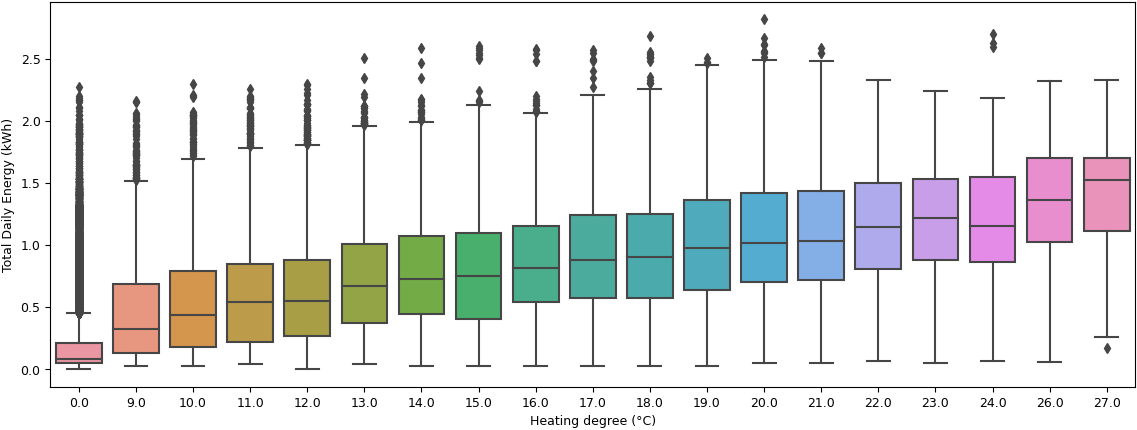

heating_degree  median      mean       std  observations
0              0.0  0.0820  0.209884  0.292074         43864
1              9.0  0.3280  0.454186  0.396481          3744
2             10.0  0.4390  0.532965  0.414789          3936
3             11.0  0.5390  0.584772  0.431491          4224
4             12.0  0.5485  0.610677  0.428520          4992
5             13.0  0.6700  0.719333  0.437461          4032
6             14.0  0.7290  0.766523  0.437767          3552
7             15.0  0.7530  0.773078  0.467749          4800
8             16.0  0.8125  0.832156  0.445094          3744
9             17.0  0.8830  0.896028  0.464963          5764
10            18.0  0.9010  0.909008  0.473703          4992
11            19.0  0.9780  0.993386  0.469335          4320
12            20.0  1.0215  1.052554  0.480723          2688
13            21.0  1.0360  1.069940  0.470710          1440
14            22.0  1.1475  1.151565  0.461936           384
15            23.0  1.2215  1.201393  0.480523           384
16            24.0  1.1565  1.202403  0.472229           288
17            26.0  1.3655  1.347830  0.465161           288
18            27.0  1.5285  1.414750  0.460445            96

In [ ]:
# ------------------------
# DEFINE HELPER FUNCTION
# ------------------------

def calculate_heating_degree_day(df, temp_column='daily_avgtemp', room_temp=20.0, heating_limit_temp=12.0):
  '''
      Calculates heating degree day values and adds them as additional column to the data frame.
      Args:
          df_weather: data frame (must contain temperature readings)
          temp_column: string defining the column name of the average temperature value per day
          room_temp: assumed room temperature (in Switzerland, usually 20 degrees Celsius)
          heating_limit_temp: heating limit temperature (in Switzerland, usually 12 degrees Celsius)
      Returns:
          the given data frame with an additional column
  '''
  df = df.copy()
  df['heating_degree'] = np.where(df[temp_column] < heating_limit_temp, room_temp - df[temp_column], 0)
  df.loc[df[temp_column].isnull(), 'heating_degree'] = np.nan
  return df

# ------------------------
# APPLY CALCULATIONS
# ------------------------

# calculate the degree day for each observation
df_hd = calculate_heating_degree_day(df_combined, temp_column='daily_avgtemp', room_temp=20.0, heating_limit_temp=12.0)

# calculate correlation of energy with heating degree
corr = stats.pearsonr(df_hd['Value'], df_hd['heating_degree'])
print('Correlation of energy with heating degree:', np.round(corr[0], 3))

# plot bot plots that group the observations over degree days
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(data=df_hd, x='heating_degree', y='Value', ax=ax)
ax.set_xlabel('Heating degree (°C)')
ax.set_ylabel('Total Daily Energy (kWh)')
plt.show()

# group the observations by degree day and calculate statistics for each degree day
df_median = df_hd.groupby(by=['heating_degree']).median().reset_index()[['heating_degree', 'Value']].rename(columns={'Value': 'median'})
df_mean = df_hd.groupby(by=['heating_degree']).mean().reset_index()[['heating_degree', 'Value']].rename(columns={'Value': 'mean'})
df_std = df_hd.groupby(by=['heating_degree']).std().reset_index()[['heating_degree', 'Value']].rename(columns={'Value': 'std'})
df_count = df_hd.groupby(by=['heating_degree']).count().reset_index()[['heating_degree', 'Value']].rename(columns={'Value': 'observations'})

# combine all statistics
df_grouped = pd.merge(df_median, df_mean, on='heating_degree', how='left')
df_grouped = pd.merge(df_grouped, df_std, on='heating_degree', how='left')
df_grouped = pd.merge(df_grouped, df_count, on='heating_degree', how='left')
display(df_grouped)


You can now see above that instead of the previous negative correlations between energy and temperature, there is a **positive correlation between energy and heating degree day values**. You can also see from the boxplot and the table that as heating degree values increase, energy consumption increases but the number of observations decreases.

<a name=adding_time_information></a>
### **4.2 Add additional information for filtering timestamps**

In some cases, it may be beneficial to add **additional columns to the data frame describing the time of day or seasons, etc**, as this allows for improved filtering or grouping of the time series. We can add these columns by simply indexing the data frame.

In [ ]:
# --------------------------------
# DEFINE HELPER FUNCTION
# --------------------------------

def add_descriptive_columns(df, basic=True, seasons=True, weekday=True, daytime=True):
  '''
      Creates a copy of the SMD data frame and adds additional descriptive columns.
      NOTE: assumes that the timestamp is set as index of the data frame and is of type pd.datetime
      Args:
          df: data frame holding the smart meter data
          basic: boolean to set to True if very basic information should be added
          seasons: boolean to set to True if the seasons should be added
          weekday: boolean to set to True if distinction between weekend and weekday should be added
          daytime: boolean to set to True if the time of day should be added (e.g. morning vs evening)
      Returns:
          processed copy of the data frame with additional columns
  '''

  # create a copy of the data frame as we do not want the original data to be affected
  df = df.copy()

  # add some basic columns
  df['date'] = df.index.date
  df['time_utc'] = df.index.tz_convert('UTC').time
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['week'] = df.index.isocalendar().week
  df['dayOfWeek'] = df.index.dayofweek
  df['hour_utc'] = df.index.tz_convert('UTC').hour
  df['minute'] = df.index.minute

  # mapping months to seasons: 1- winter, 2-spring, 3-summer, 4-autumn
  if seasons:
    seasons = {1: 1, 2: 1, 3: 2, 4: 2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1} # maps months to seasons:
    df['season'] = df['month'].map(seasons, na_action=None)
    df['winter'] = np.where(df['season'] == 1, True, False)
    df['spring'] = np.where(df['season'] == 2, True, False)
    df['summer'] = np.where(df['season'] == 3, True, False)
    df['autumn'] = np.where(df['season'] == 4, True, False)
    df['transitionperiod'] = np.where((df['season'] == 2) | (df['season'] == 4), True, False)

  # mapping to descriptive times of the day
  if weekday:
    df['weekday'] = np.where(df['dayOfWeek'] <=4, True, False)
    df['weekend'] = np.where(df['dayOfWeek'] >=5, True, False)

  # add the time of day
  if daytime:
    df['morning'] = np.where(df['hour_utc'].between(6, 10, inclusive='left'), True, False)
    df['noon'] = np.where(df['hour_utc'].between(10, 14, inclusive='left'), True, False)
    df['afternoon'] = np.where(df['hour_utc'].between(14, 18, inclusive='left'), True, False)
    df['evening'] = np.where(df['hour_utc'].between(18, 23, inclusive='left'), True, False)
    df['day'] = np.where(df['hour_utc'].between(6, 23, inclusive='left'), True, False)
    df['night'] = np.where((df['hour_utc'] >= 23) | (df['hour_utc'] < 6), True, False)

  if not basic:
    df.drop(columns=['date', 'time_utc', 'year', 'month', 'week', 'dayOfWeek', 'hour_utc', 'minute'], inplace=True)
  return df

# --------------------------------
# APPLY HELPER FUNCTION
# --------------------------------

# let's add some information about the seasons
df_add = add_descriptive_columns(df_smd, basic=False, seasons=True, weekday=False, daytime=True)
display(df_add)

# now let's for example compare the mean consumption of summer vs. winter
print('Mean energy consumption in summer per 15 min:', np.round(df_add[df_add['summer']]['Value'].mean(), 3))
print('Mean energy consumption in winter per 15 min:', np.round(df_add[df_add['winter']]['Value'].mean(), 3))

Value  Value_HeatPump  Value_OtherAppliances  \
Timestamp                                                                 
2019-11-20 00:00:00+01:00  0.736           0.682                  0.054   
2019-11-20 00:15:00+01:00  1.216           1.126                  0.090   
2019-11-20 00:30:00+01:00  0.488           0.450                  0.038   
2019-11-20 00:45:00+01:00  0.065           0.023                  0.042   
2019-11-20 01:00:00+01:00  0.650           0.608                  0.042   
...                          ...             ...                    ...   
2022-08-31 22:45:00+02:00  0.052           0.000                  0.052   
2022-08-31 23:00:00+02:00  0.035           0.000                  0.035   
2022-08-31 23:15:00+02:00  0.031           0.000                  0.031   
2022-08-31 23:30:00+02:00  0.042           0.000                  0.042   
2022-08-31 23:45:00+02:00  0.043           0.000                  0.043   

                           season  winter  spring  summer  autumn  \
Timestamp                                                           
2019-11-20 00:00:00+01:00       4   False   False   False    True   
2019-11-20 00:15:00+01:00       4   False   False   False    True   
2019-11-20 00:30:00+01:00       4   False   False   False    True   
2019-11-20 00:45:00+01:00       4   False   False   False    True   
2019-11-20 01:00:00+01:00       4   False   False   False    True   
...                           ...     ...     ...     ...     ...   
2022-08-31 22:45:00+02:00       3   False   False    True   False   
2022-08-31 23:00:00+02:00       3   False   False    True   False   
2022-08-31 23:15:00+02:00       3   False   False    True   False   
2022-08-31 23:30:00+02:00       3   False   False    True   False   
2022-08-31 23:45:00+02:00       3   False   False    True   False   

                           transitionperiod  morning   noon  afternoon  \
Timestamp                                                                
2019-11-20 00:00:00+01:00              True    False  False      False   
2019-11-20 00:15:00+01:00              True    False  False      False   
2019-11-20 00:30:00+01:00              True    False  False      False   
2019-11-20 00:45:00+01:00              True    False  False      False   
2019-11-20 01:00:00+01:00              True    False  False      False   
...                                     ...      ...    ...        ...   
2022-08-31 22:45:00+02:00             False    False  False      False   
2022-08-31 23:00:00+02:00             False    False  False      False   
2022-08-31 23:15:00+02:00             False    False  False      False   
2022-08-31 23:30:00+02:00             False    False  False      False   
2022-08-31 23:45:00+02:00             False    False  False      False   

                           evening    day  night  
Timestamp                                         
2019-11-20 00:00:00+01:00    False  False   True  
2019-11-20 00:15:00+01:00    False  False   True  
2019-11-20 00:30:00+01:00    False  False   True  
2019-11-20 00:45:00+01:00    False  False   True  
2019-11-20 01:00:00+01:00    False  False   True  
...                            ...    ...    ...  
2022-08-31 22:45:00+02:00     True   True  False  
2022-08-31 23:00:00+02:00     True   True  False  
2022-08-31 23:15:00+02:00     True   True  False  
2022-08-31 23:30:00+02:00     True   True  False  
2022-08-31 23:45:00+02:00     True   True  False  

[97532 rows x 15 columns]

Mean energy consumption in summer per 15 min: 0.164
Mean energy consumption in winter per 15 min: 0.912


<a name=normalization_methods></a>
### **4.3 Normalization methods**
For most tasks it is necessary to scale and normalize the smart meter data. The **type of normalization depends on the specific use case**. For example, if you want to compare energy consumption for heating different buildings, you can normalize by heated floor area or number of occupants (remember that this requires additional context information as described [earlier](#context_and_domain_knowledge)). Or if you want to compare energy consumption across different seasons, you should normalize by weather metrics.

However, many machine learning tasks often require zero mean and unit variance, which can be achieved by using [sklearn's StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Value  Value_HeatPump  Value_OtherAppliances  \
Timestamp                                                                 
2019-11-20 00:00:00+01:00  0.736           0.682                  0.054   
2019-11-20 00:15:00+01:00  1.216           1.126                  0.090   
2019-11-20 00:30:00+01:00  0.488           0.450                  0.038   
2019-11-20 00:45:00+01:00  0.065           0.023                  0.042   
2019-11-20 01:00:00+01:00  0.650           0.608                  0.042   
...                          ...             ...                    ...   
2022-08-31 22:45:00+02:00  0.052           0.000                  0.052   
2022-08-31 23:00:00+02:00  0.035           0.000                  0.035   
2022-08-31 23:15:00+02:00  0.031           0.000                  0.031   
2022-08-31 23:30:00+02:00  0.042           0.000                  0.042   
2022-08-31 23:45:00+02:00  0.043           0.000                  0.043   

                           Value_Scaled  
Timestamp                                
2019-11-20 00:00:00+01:00      0.424269  
2019-11-20 00:15:00+01:00      1.385039  
2019-11-20 00:30:00+01:00     -0.072129  
2019-11-20 00:45:00+01:00     -0.918809  
2019-11-20 01:00:00+01:00      0.252131  
...                                 ...  
2022-08-31 22:45:00+02:00     -0.944829  
2022-08-31 23:00:00+02:00     -0.978857  
2022-08-31 23:15:00+02:00     -0.986863  
2022-08-31 23:30:00+02:00     -0.964846  
2022-08-31 23:45:00+02:00     -0.962844  

[97532 rows x 4 columns]

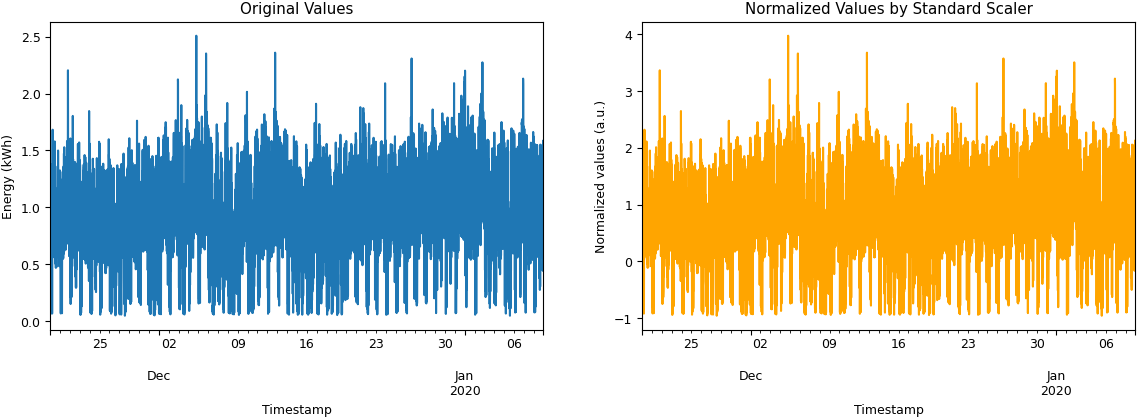

In [ ]:
# ---------------------
# APPLY STANDARD SCALER
# ---------------------

# copy data to not affect original data
df_norm = df_smd.copy()

# apply standard scaler
np_vals = df_smd['Value'].values.reshape(-1, 1)
scaler = StandardScaler().fit(np_vals)
np_vals = scaler.transform(np_vals)

# assign normalized values to new column
df_norm['Value_Scaled'] = np_vals.flatten()
display(df_norm)


# ---------------------
# VISUALIZE RESULT
# ---------------------

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
days = 50
df_norm.iloc[:96*days]['Value'].plot(ax=ax[0])
df_norm.iloc[:96*days]['Value_Scaled'].plot(ax= ax[1], color='orange')
ax[0].set_title('Original Values')
ax[0].set_ylabel('Energy (kWh)')
ax[1].set_title('Normalized Values by Standard Scaler')
ax[1].set_ylabel('Normalized values (a.u.)')
plt.show()

You can **see above that** the shape of the data remains exactly the same, but that **the labels on the y-axis have changed** - so the data is scaled. In the same way, you can apply other common normalization methods provided by sklearn, such as:
- [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)
- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)
- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

**For normalization by weather, we recommend, reading [this article](https://www.energylens.com/articles/degree-days).**

<a name=interpolation_methods></a>
### **4.4 Interpolation methods and downsampling**

If you want to analyze energy consumption by year, hour or day, for example, you have to **convert the data to a lower temporal resolution**. Basically, we just need to sum up the consumption over several timestamps. In pandas this can be done in a comparatively simple way by resampling the data.

In [ ]:
# define the pandas keys for the most common resolution changes
resolution_dict = {
    'daily': '1D',
    '30min' : '30min',
    'hourly' : '1H',
    'monthly' : '1M',
    'yearly' : '1Y'
}

# choose your resolution and resample
resolution = 'daily'
df_resampled = df_smd.resample(resolution_dict[resolution]).sum()
display(df_resampled)

Value  Value_HeatPump  Value_OtherAppliances
Timestamp                                                               
2019-11-20 00:00:00+01:00  82.463          40.091                 42.372
2019-11-21 00:00:00+01:00  89.534          40.455                 49.079
2019-11-22 00:00:00+01:00  84.448          41.784                 42.664
2019-11-23 00:00:00+01:00  82.895          41.809                 41.086
2019-11-24 00:00:00+01:00  73.950          39.631                 34.319
...                           ...             ...                    ...
2022-08-27 00:00:00+02:00   5.264           1.763                  3.501
2022-08-28 00:00:00+02:00   4.567           1.044                  3.523
2022-08-29 00:00:00+02:00  10.567           6.969                  3.598
2022-08-30 00:00:00+02:00   3.755           0.259                  3.496
2022-08-31 00:00:00+02:00   3.683           0.141                  3.542

[1016 rows x 3 columns]

As mentioned [above](#data_availability), SMD may have **missing data due to interruptions in measurements or communication**.
It can be useful to **fill these gaps with interpolated values** based on the enclosing measurements.
Since this is a very common problem with time series, pandas has a built-in method for interpolation using different approaches.

Here we compare linear, polymomial and spline interpolation of a segment of the time series.

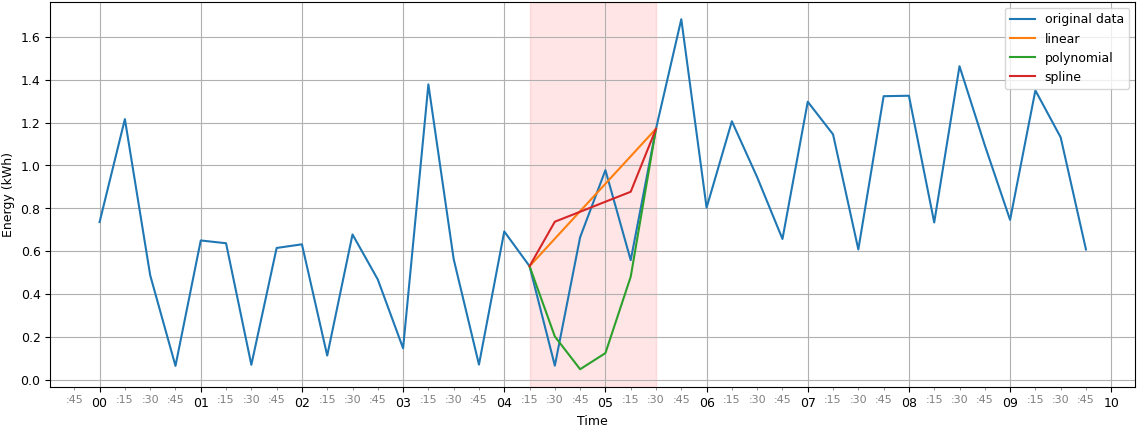

In [ ]:
# take a segment of data points
start = 0
stop = 40
start_missing = 18
stop_missing = 22
excerpt = df_smd.iloc[start:stop].copy()

# remove data for 4 consecutive data points
missing = excerpt.copy()
missing['Value'].iloc[start_missing:stop_missing] = np.nan

# create figure
fig, ax = plt.subplots(figsize=(14, 5))

# plot different interpolations
ax.plot(excerpt['Value'], label='original data')
ax.plot(missing['Value'].interpolate().iloc[start_missing - 1:stop_missing + 1], label='linear')
ax.plot(missing['Value'].interpolate(method='polynomial', order=3).iloc[start_missing - 1:stop_missing + 1], label='polynomial')
ax.plot(missing['Value'].interpolate(method='spline', order=3).iloc[start_missing - 1:stop_missing + 1], label='spline')
ax.axvspan(excerpt.index[start_missing - 1], excerpt.index[stop_missing], color='red', alpha=0.1)

# additional formatting and show plot
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(range(15, 60, 15)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter(":%M"))
ax.tick_params(axis='x', which='minor', labelsize=8, colors='grey')
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Energy (kWh)')
ax.legend()
fig.show()

You can see that the interpolated data does not quite match the original data points. The higher order polynomials in particular lead to large fluctuations in the interpolation.

Nonetheless, **interpolation can help deal with missing data**, especially when only short gaps of a single missing measurement are involved. As a more systematic test, we randomly remove 5% of the data **and apply different interpolation techniques**.
Here we see the strength of the interpolation. The mean absolute error between the interpolated and original data is consistently lower than when we naively fill in missing data with zero.

In [ ]:
# we randomly remove 5% of the data
indices = np.random.choice(len(df_smd.index), size=int(0.05 * len(df_smd.index)), replace=False)
masked_df = df_smd['Value'].copy()
masked_df[indices] = np.nan

# define the parameters for the different interpolations
parameters = [
    {'method': 'linear', 'order': None},
    {'method': 'polynomial', 'order': 3},
    {'method': 'polynomial', 'order': 5},
    {'method': 'spline', 'order': 3},
]

# calculate the mean absolute error of each interpolation
print('Mean absolute error: \n')
for d in parameters:
  print(d['method'] + ':', np.round(mean_absolute_error(masked_df.interpolate(**d), df_smd['Value']), 4))

# for comparison simply fill with zero
print('fill zeros:', np.round(mean_absolute_error(masked_df.fillna(0), df_smd['Value']), 4))

Mean absolute error: 

linear: 0.0108
polynomial: 0.0105
polynomial: 0.0108
spline: 0.0192
fill zeros: 0.0254


<a name=outlier_detection_hampel></a>
### **4.5 Outlier detection with Hampel filter**

So far we have dealt with missing data due to errors, but these errors can also lead to wrong data or wrong conclusions.
**Outlier detection methods are suitable for detecting unrealistic measurements.**

**Hampel filtering** is such a method to detect outliers based on a sliding window approach in which data points are compared to the distribution of their neighbors.
The method has two parameters:
- `window size` controls the size of the neighborhood to be considered for the distribution
- `n_sigmas` determines how far out of the distribution a point must fall, to be considered an outlier

Together, the parameters can be used to set the aggressiveness of the filtering. When a data point is detected as an outlier, its value is replaced by the median of its neighbors' distribution.

Share of outliers in the series: 0.005555555555555556


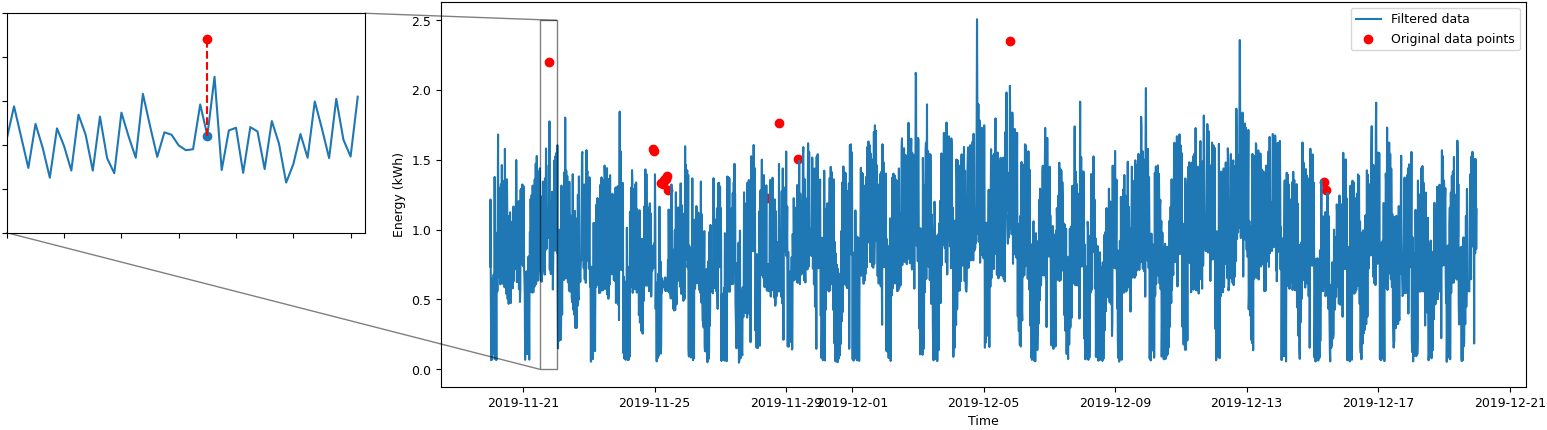

In [ ]:
# ------------------------
# DEFINE HELPER FUNCTION
# ------------------------

def hampel_filter(series, window_size, n_sigmas=3):
  '''
  Implementation based on https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d
  '''
  k = 1.4826  # scale factor for Gaussian distribution

  # make a new series in which we overwrite the outliers
  new_series = series.copy()

  # calculate the median of the data in the neighborhood
  rolling_median = series.rolling(window=2 * window_size, center=True).median()

  # calculate the median absolute difference to estimate the spread of the distribution
  rolling_mad = k * series.rolling(window=2 * window_size, center=True).apply(
      lambda x: np.median(np.abs(x - np.median(x)))
  )

  # calculate the deviation of each point from the median
  diff = np.abs(series - rolling_median)

  # select values that deviate more than n_sigma from the mad and replace them with the median
  mask = diff > (n_sigmas * rolling_mad)
  new_series[mask] = rolling_median[mask]

  print('Share of outliers in the series:', mask.mean())

  return new_series, mask

# -----------------
# APPLY FILTERING
# -----------------

# apply filter to one month of data
excerpt = df_smd['Value'].iloc[:96 * 30]
filtered, mask = hampel_filter(excerpt, 15)


fig, ax = plt.subplots(figsize=(14, 5))
# plot the filtered time series
ax.plot(filtered, label='Filtered data')
# plot dots for the filtered out data
ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')
ax.set_xlabel('Time')
ax.set_ylabel('Energy (kWh)')
ax.legend()

# Magnify a section of the data
start = int(1.5 * 96)
stop = start + 50
axins = ax.inset_axes([-0.4, 0.4, 0.33, 0.57])
# plot the filtered data
axins.plot(filtered.index[start:stop], filtered[start:stop])
axins.scatter(excerpt.index[mask], filtered[mask])
# plot the original data
axins.scatter(excerpt.index[mask], excerpt[mask], c='r')
axins.plot([excerpt.index[mask][0], excerpt.index[mask][0]],
           [filtered[mask][0], excerpt[mask][0]], ls='--', c='r')

axins.set_xlim(excerpt.index[start], excerpt.index[stop])
axins.set_ylim(0, 2.5)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

fig.show()

<a name=simple_baseload_estimation></a>
### **4.6 Simple baseload estimation**

The term **baseload refers to the minimum amount of electricity that a household or building uses on a fairly continuous basis**. It is independent of whether or not someone is actively using appliances or electronics. For example, it can be caused by heating and cooling systems, refrigerators, or other major appliances that run continuously even when no one is home. Normally, the baseload is relatively stable from day to day with only minor fluctuations. Estimating baseload can be beneficial for energy conservation initiatives or for identifying unusual spikes to detect device failures, leaks, or other issues that may need attention.

In the following, we **estimate the baseload** of the given smart meter data using a **simple distribution-based approach with the following steps:**
- first, we sort all energy observations in ascending order
- then we decide on a certain percentage (20% by default) of the smallest values to be considered for the calculation
- then we calculate the mean and standard deviation of the values to be considered
- Finally, we define the baseload as the first value above the mean plus three times the calculated standard deviation.

Estimated baseload: 0.084


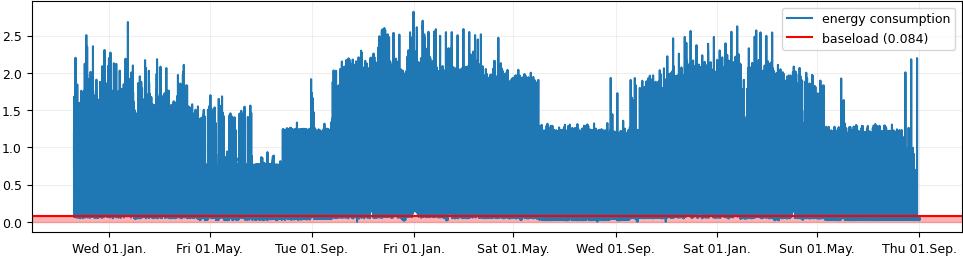

In [ ]:
# ------------------------
# DEFINE HELPER FUNCTION
# ------------------------

def estimate_baseload(df, val_share_included=0.2):
  '''
      Estimates the standby-/baseload of a data frame containing smart meter data.
      Baseload is assumed to be the first kWh-value of whole df that is > mean+3*std of ascendingly sorted kWh values to be considered (as given by val_share_included)
      Args:
          val_share_included: percentage of ascendingly sorted kWh-values to be considered for calculating mean and std
      Returns:
          float representing the calculated baseload
  '''

  # NOTE: current approach is rather naive and suitable for aggregated smart meters

  # copy the data frame and sort it ascendingly
  df_sorted = df.copy().sort_values(by='Value', ascending=True)

  # decide for the cut-off of values to be considered
  stop_index = math.ceil(val_share_included * len(df))

  # calculate mean and standard deviation
  mean = df_sorted[:stop_index]['Value'].mean()
  std = df_sorted[:stop_index]['Value'].std()

  # estimate the baseload and return it as rounded value
  baseload = df_sorted[df_sorted['Value'] > mean+3*std]['Value'].iloc[0]
  return round(baseload, 4)

# ------------------------
# APPLY BASELOAD ESTIMATION
# ------------------------

# estimate the baseload
baseload = estimate_baseload(df_smd, val_share_included=0.2)
print('Estimated baseload:', baseload)

# ------------------------------------
# PLOT ENERGY CONSUMPTION AND BASELOAD
# ------------------------------------

# let's see what this looks like in a plot
fig, ax = plt.subplots(figsize=(12,3))
df_sub = add_descriptive_columns(df_smd, seasons=True)
days = 7
df_sub = df_sub[df_sub['winter']].iloc[:96*days]
ax.plot(df_smd['Value'], label='energy consumption')
ax.axhline(y=baseload, color='red', label='baseload ({})'.format(baseload))
ax.axhspan(ymin=0, ymax=baseload, color='red', alpha=0.3)
ax.legend()
ax.grid(alpha=0.2)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%b."))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

<a name=small_activities></a>
### **4.7 Enhancing small activities**
We can use the baseload calculated above as a threshold to filter out all measured values that are smaller.
However, for some applications, just the opposite may be necessary or beneficial.
For example, devices such as LED light bulbs, laptops, smartphones, or tablets tend to consume little power compared to other large loads such as heat pumps.
Alternatively, we can **enhance small activities by applying a transformation function to the energy values**.
The function should **compress large values and expand small numbers relatively**.
This may result in less skewed values (especially for distributions with long tail ends), but requires an additional step to interpret the transformed energy measurements (since the inverse transform should be applied before interpretation).  

In general, the selection of an appropriate transformation function depends on the application.
In the [additional resources section](#resources_other), we provide some links to external guidance as a possible starting point.
However, in our experience, the **square root transformation works particularly well for energy data**.
Let's take a look at the data before and after the transformation.
You should see that the activities caused by the heat pump controller with comparatively low power consumption are now enhanced.

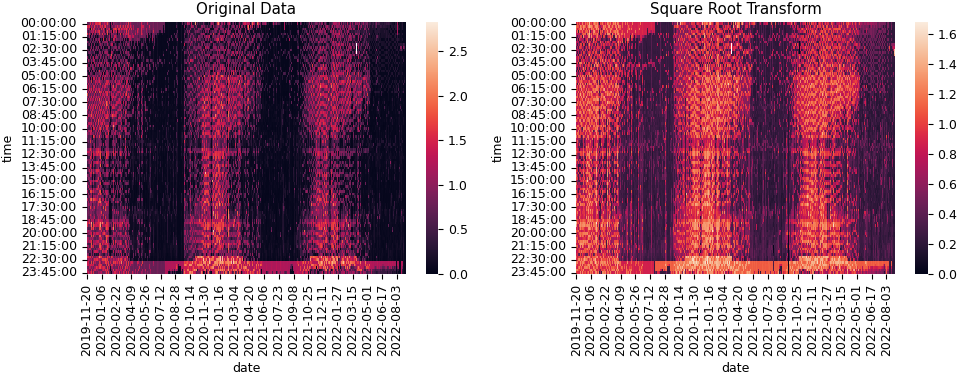

In [ ]:
#----------------------
# APPLY TRANSFORMATION
#----------------------

# apply square root transformation
df_sqrt = np.sqrt(df_smd)

#--------------------------------
# CREATE HEATMAPS FOR COMPARISON
#--------------------------------
# NOTE: we use the heatmap function introduced earlier

# create figure
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# first plot
sns.heatmap(create_heatmap(df_smd, column='Value'), ax=ax[0])
ax[0].set_title('Original Data')

# second plot
sns.heatmap(create_heatmap(df_sqrt, column='Value'), ax=ax[1])
ax[1].set_title('Square Root Transform')

plt.tight_layout()
plt.show()

<a name=detecting_switching_activities></a>
### **4.8 Detecting switching activities**

Let us use the square-root transformed data to **identify the switching events** caused by the heat pump. A **simple algorithm** for finding prominent switching events is presented in [7]. It **proceeds as follows:**
1. for each time $t$ the difference of the consumption to $t-2$ is calculated - let us call the resulting values *second differences*.
2. a positive value of the second difference can now be interpreted as a switch-on event that must have occurred between the last two measurements, and a negative value refers to a switch-off event. A value close to zero indicates an insignificant change in consumption, e.g. measurement errors, which we may wish to neglect.
2. applying a peak detection to the second difference allows to distinguish between prominent and non-prominent switching operations.

Let's implement this in Python using [scipy's peak detection algorithm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).

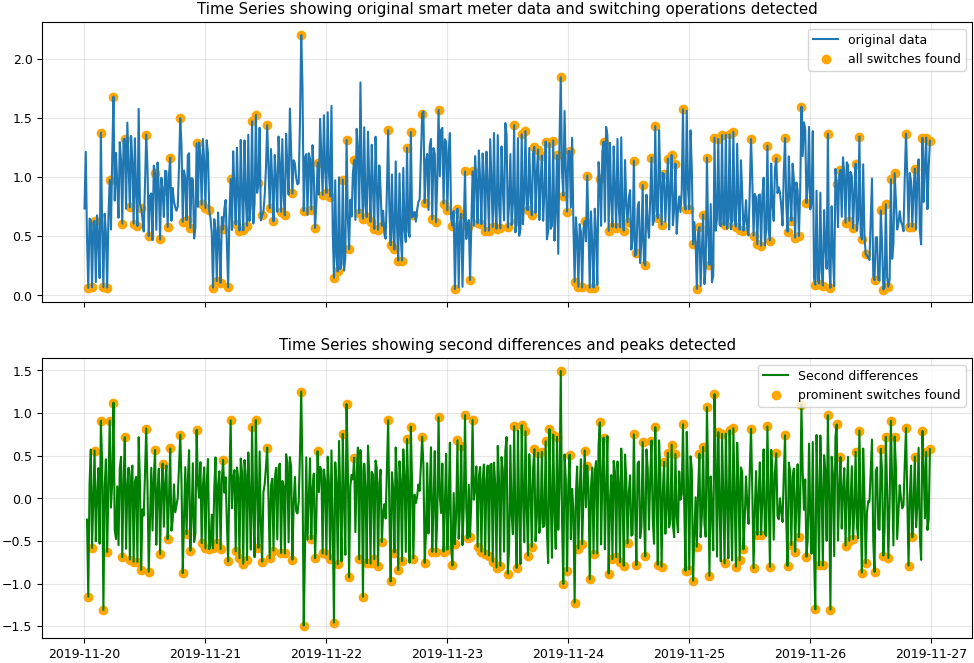

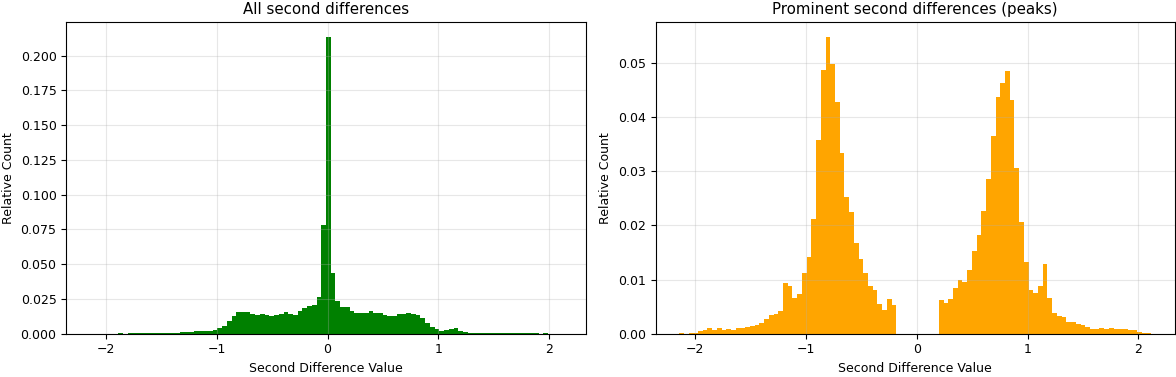

In [ ]:
#------------------------
# DEFINE HELPER FUNCTIONS
#------------------------

def calculate_second_differences(df, column='Value'):
  '''
      Calculates the difference of consumption of measurement t0 to t-2 and assigns it to time point t0.
      Adds these as separate column to the data frame - column named second_diff
      Args:
          df: data frame to be analyzed containing smart meter data
      Returns:
          returns copy of df where a new column named "second_diff" is available
              NOTE: first two values are NAN, because for these the previous measurements to not exist
  '''
  # copy data frame as original data should not be affected
  df = df.copy()
  # get consumption as vector
  np_cons = df[column].values
  # shift the consumption by two indices
  np_cons_shifted = np.roll(np_cons, 2)
  # subtract the shifted vector from the original one
  np_diff = np_cons - np_cons_shifted
  # replace the first two elements by NAN because there were actually no measurements to be subtracted
  np_diff[:2] = np.nan
  # add the differences again to the data frame
  df['second_diff'] = np_diff

  return df

def calculate_peaks_on_second_differences(df, prominence=None):
    '''
        Calculates the peaks on the second differences and adds a boolean indication as separate column called second_diff_peak.
        NOTE: it uses the absolute values of the differences to calculate peaks because the peak detection would ignore local minima.
        Args:
            df: data frame holding the calculated second difference values (assumed to be in column named second_diff)
            prominence: prominence parameter as defined in scipy.signal.find_peaks
        Returns:
            copy of df with additional column "second_diff_peak"
    '''

    # copy data frame as original data should not be affected
    df = df.copy()
    # get the local extrema on the absolute differences by peak detection
    np_peaks_indices = find_peaks(np.abs(df['second_diff'].values), prominence=prominence)[0]
    # mark in original data frame if the value is a peak or not
    df['second_diff_peak'] = False
    df.loc[df.iloc[np_peaks_indices].index, 'second_diff_peak'] = True
    return df

#------------------------
# APPLY SWITCHING DETECTION
#------------------------

# apply the second differences calculation
df_diff = calculate_second_differences(df_smd)

# apply peak detection to second differences
df_diff = calculate_peaks_on_second_differences(df_diff, prominence=0.2)

#-------------------------------------------
# PLOT TIMESERIES WITH IDENTIFIED SWITCHINGS
#-------------------------------------------

# create figure
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# select indices and values of found peaks
days = 7
df_sub = df_diff.iloc[:96*days]
indices = df_sub[df_sub['second_diff_peak']].index
peak_vals = df_sub.loc[indices, 'Value'].values
diff_vals = df_sub.loc[indices, 'second_diff'].values

# first plot: original time series
ax[0].plot(df_sub['Value'], label='original data')
ax[0].scatter(indices, peak_vals, color='orange', label='all switches found') # mark the found peaks
ax[0].legend()
ax[0].grid(alpha=0.3)
ax[0].set_title('Time Series showing original smart meter data and switching operations detected')

# second plot: second differences
ax[1].plot(df_sub['second_diff'], label='Second differences', color='green')
ax[1].scatter(indices, diff_vals, color='orange', label='prominent switches found') # mark the found peaks
ax[1].legend()
ax[1].grid(alpha=0.3)
ax[1].set_title('Time Series showing second differences and peaks detected')

plt.show()

#------------------------
# PLOT DISTRIBUTIONS
#------------------------

# create figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# plot the distributions of all second differences
np_diff = df_diff['second_diff'].values
weights = np.ones(len(np_diff)) / len(np_diff)
ax[0].hist(np_diff, bins=100, weights=weights, color='green')
ax[0].set_xlabel('Second Difference Value')
ax[0].set_ylabel('Relative Count')
ax[0].grid(alpha=0.3)
ax[0].set_title('All second differences')

# plot the distributions of only of the peak second differences
np_diff = df_diff[df_diff['second_diff_peak']]['second_diff'].values
weights = np.ones(len(np_diff)) / len(np_diff)
ax[1].hist(np_diff, bins=100, weights=weights, color='orange')
ax[1].set_xlabel('Second Difference Value')
ax[1].set_ylabel('Relative Count')
ax[1].grid(alpha=0.3)
ax[1].set_title('Prominent second differences (peaks)')

plt.tight_layout()
plt.show()

<a name=sliding_window_approaches></a>
### **4.9 Sliding window approaches**
Without going into depth here, **a common approach for working with time series data is to use a sliding window**. A window is assigned a width (example below with width 3) and then slid over the time series with a fixed step size (example below with step size 1). In each window, an operation can be performed (e.g. average, sum or more complex calculations).

| 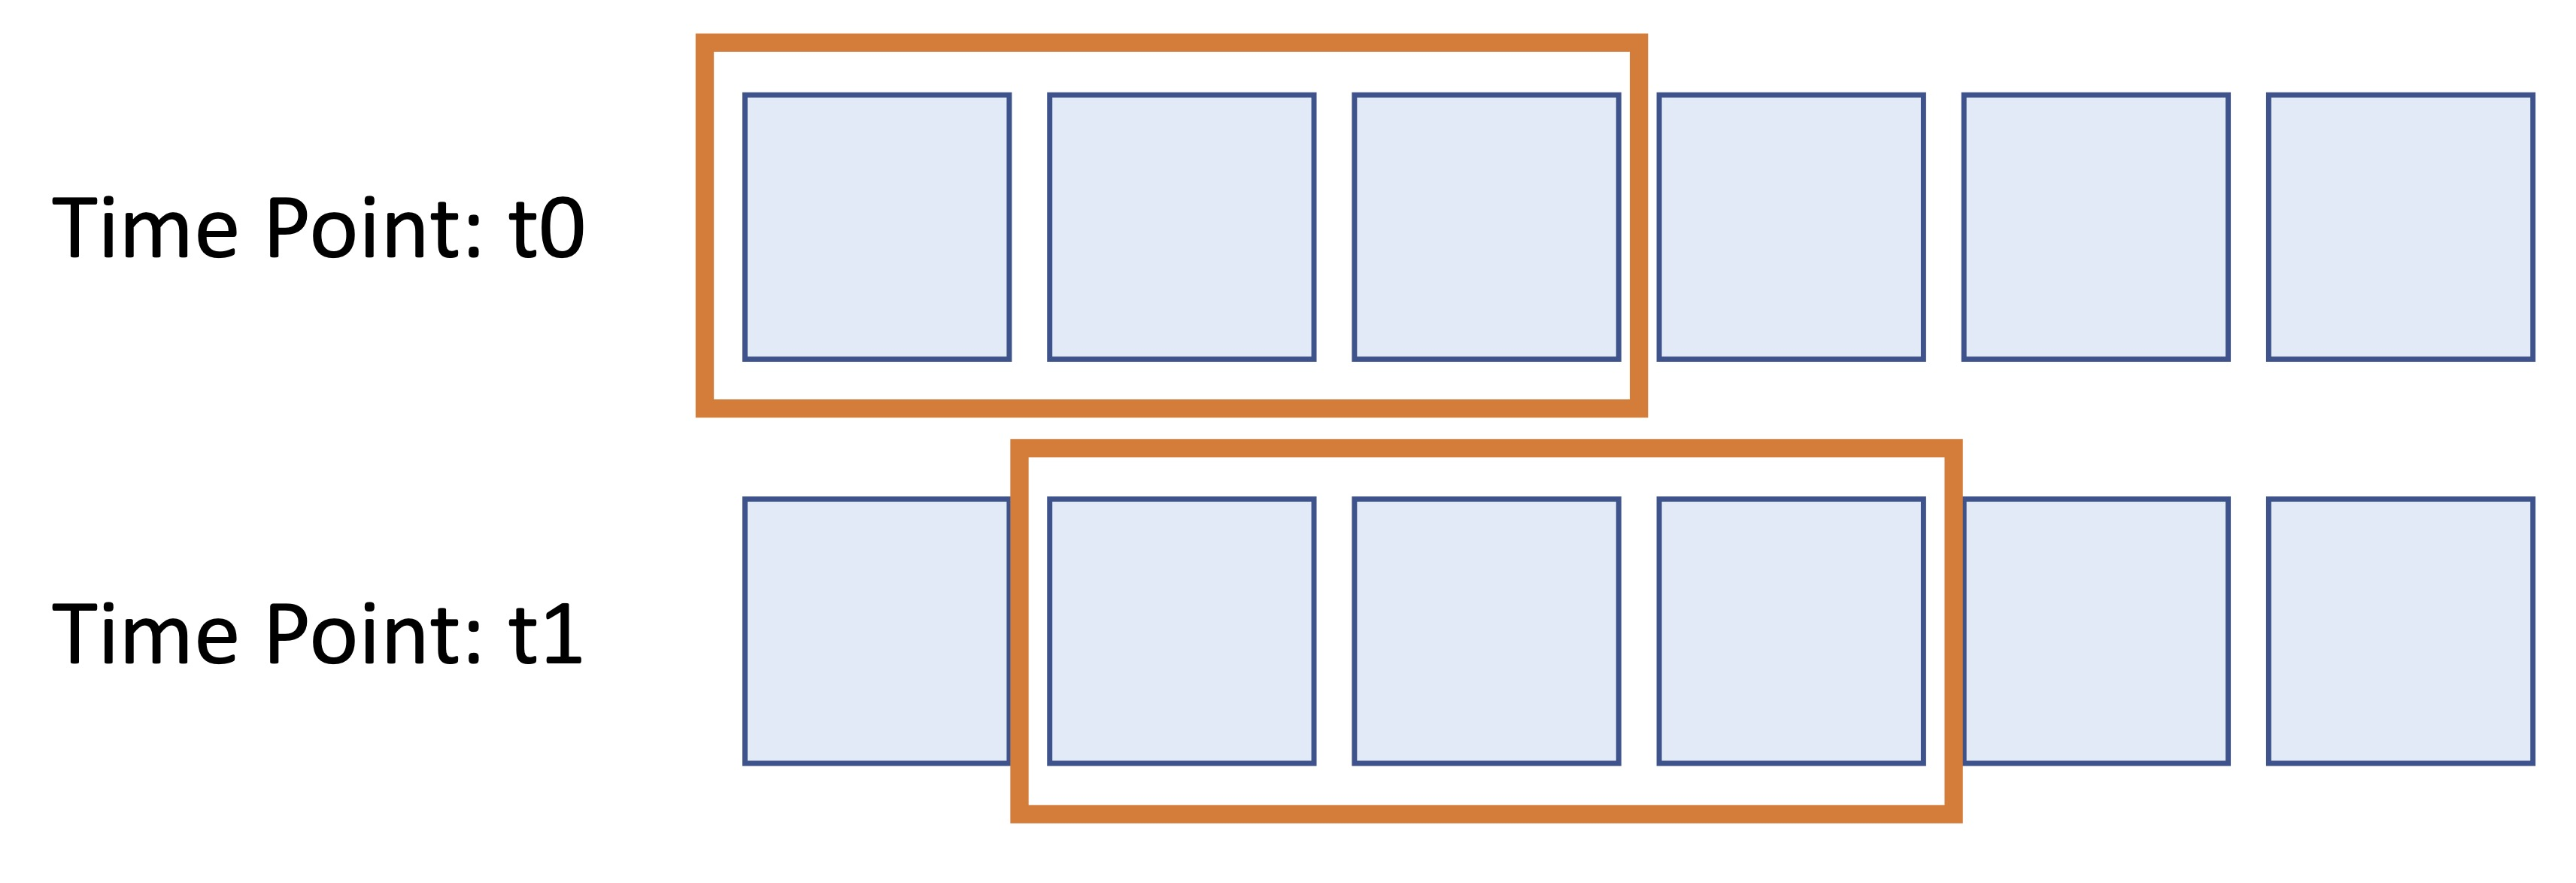 |
|:--:|
| *Source: Own figure.* |

An easy way to apply a sliding window to smart meter data is to use the [pandas internal rolling function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). Pandas also provides a [window operations guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html) online. Below is a **basic example**:

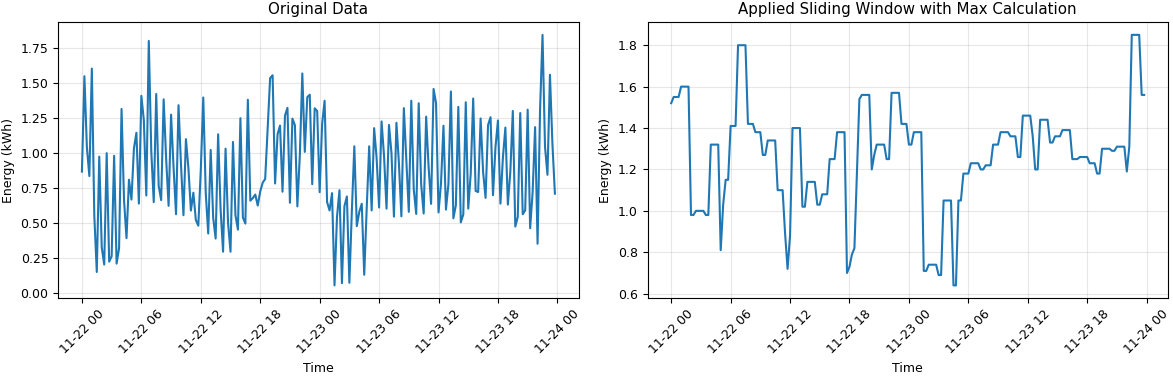

In [ ]:
# select a window size
window_size = 4

# apply a sliding window with maximum calculation (i.e. rolling mean)
df_sliding = df_smd.rolling(window_size).max().round(2)

# create figure to show the time series before and after sliding window
fig,ax = plt.subplots(1, 2, figsize=(12, 4))

# plot original data
plot_data(ax[0], df_smd.iloc[192:384])
ax[0].set_title('Original Data')
ax[0].grid(alpha=0.3)

# plot sliding window data
plot_data(ax[1], df_sliding.iloc[192:384])
ax[1].set_title('Applied Sliding Window with Max Calculation')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<a name=feature_extraction></a>
### **4.10 Feature extraction**

Many machine learning algorithms are not designed to deal with time series as input. Instead, **features can be extracted that describe the time series and can serve as input to the algorithms**. This usually also has the advantage of **dimensionality reduction**. For example, clustering or classification algorithms such as K-nearest neighbor or random forest do not work well with the original time series, but with previously extracted features. In general, choosing the appropriate features depends on your use case and often requires expertise. The best question to ask yourself is: *What do I want to achieve, and how does one household's data differ from another?*. However, you can start with a **well-known Python package called [tsfresh](https://github.com/blue-yonder/tsfresh)**. It is **easy to use and is designed for extracting features from arbitrary time series**. Below we show you what this looks like.

- **NOTE:** If you are interested, you can also use tsfresh to [define your own features](https://tsfresh.readthedocs.io/en/latest/text/how_to_add_custom_feature.html) or [check the meaning of features and select them accordingly](https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_selection.html).
- **NOTE:** In [one of the upcoming sections on load forecasting](#load_forecasting), we refer to a [separate CCAI tutorial](https://colab.research.google.com/drive/1ZWpJY03xLIsUrlOzgTNHemKyLatMgKrp?usp=sharing). This reference tutorial explains that *time* can also serve as a feature, but this requires special treatment so that it has cyclic properties. Please refer to the tutorial if you want to use the time variable as input to a model.

In [ ]:
# copy the smart meter data to not affect the original data
df_copy = df_smd.copy()

# make sure that the data frame is sorted
df_copy.sort_index(inplace=True)

# NOTE: tsfresh requires an ID-column to know which time series refers to which ID
# hence you could also combine the features extraction for data of multiple smart meters
# but here let's add the date as separate column and use it as ID to extract daily features
df_copy['date'] = df_copy.index.date

# for the sake of speeding up the process, let's select ten random days and remove the rest
dates = df_copy['date'].unique()
dates = np.random.choice(dates, size=10)
df_copy = df_copy[df_copy['date'].isin(dates)]

# now extract all available features
df_features = tsfresh.extract_features(df_copy, column_id='date', show_warnings=False, disable_progressbar=True)
print('Number of extracted features:', len(df_features.columns.values))

# show the feature data frame
display(df_features)

Number of extracted features: 2364


Value__variance_larger_than_standard_deviation  \
2019-12-31                                             0.0   
2020-01-03                                             0.0   
2020-08-29                                             0.0   
2021-01-03                                             0.0   
2021-02-28                                             0.0   
2021-04-02                                             0.0   
2021-09-22                                             0.0   
2021-10-25                                             0.0   
2022-02-26                                             0.0   
2022-08-17                                             0.0   

            Value__has_duplicate_max  Value__has_duplicate_min  \
2019-12-31                       0.0                       0.0   
2020-01-03                       0.0                       0.0   
2020-08-29                       0.0                       0.0   
2021-01-03                       0.0                       0.0   
2021-02-28                       0.0                       0.0   
2021-04-02                       0.0                       0.0   
2021-09-22                       0.0                       0.0   
2021-10-25                       0.0                       0.0   
2022-02-26                       0.0                       0.0   
2022-08-17                       0.0                       0.0   

            Value__has_duplicate  Value__sum_values  Value__abs_energy  \
2019-12-31                   1.0            113.622         152.177622   
2020-01-03                   1.0             89.150          99.757310   
2020-08-29                   1.0             26.908          15.112498   
2021-01-03                   1.0            109.852         145.352644   
2021-02-28                   1.0             78.479          86.252341   
2021-04-02                   1.0             34.656          25.596686   
2021-09-22                   1.0             29.414          19.495668   
2021-10-25                   1.0             58.600          53.946922   
2022-02-26                   1.0             79.526          87.355318   
2022-08-17                   1.0             10.034           2.930196   

            Value__mean_abs_change  Value__mean_change  \
2019-12-31                0.422253           -0.000653   
2020-01-03                0.448158           -0.009674   
2020-08-29                0.068853            0.011463   
2021-01-03                0.484032            0.011484   
2021-02-28                0.478400           -0.009642   
2021-04-02                0.203568           -0.000368   
2021-09-22                0.194011            0.004474   
2021-10-25                0.339905            0.009695   
2022-02-26                0.482874            0.003884   
2022-08-17                0.056347            0.000726   

            Value__mean_second_derivative_central  Value__median  ...  \
2019-12-31                               0.004170         1.2010  ...   
2020-01-03                               0.000516         0.9500  ...   
2020-08-29                              -0.000463         0.2270  ...   
2021-01-03                               0.001207         1.1755  ...   
2021-02-28                              -0.002527         0.7965  ...   
2021-04-02                               0.004660         0.1650  ...   
2021-09-22                               0.001633         0.1495  ...   
2021-10-25                              -0.004574         0.5455  ...   
2022-02-26                               0.000665         0.7965  ...   
2022-08-17                               0.000043         0.0575  ...   

            Value_OtherAppliances__fourier_entropy__bins_5  \
2019-12-31                                        0.198822   
2020-01-03                                        0.198822   
2020-08-29                                        0.198822   
2021-01-03                                        0.395906   
2021-02-28                        

<a name=distributional_peak_detection></a>
### **4.11 Detecting peaks in distribution**

In the previous section, we explained how to extract features from the time series to use as input for other algorithms.
Here we note that the **distribution** of values (e.g., shown as a histogram below) can also serve as a feature and direct input for machine learning methods.
In the context of smart meter data analytics, the distribution of energy measurements is particularly valuable because it can **provide an indication of the potential number of relevant appliances**.
If a device has a power consumption that is significantly different from other devices, and if the device is regularly active, it will show up as a peak in the distribution.

As an **example**, we identify peaks in the distribution below and highlight the areas around them.
We note that, in general, each measurement can be marked as belonging to one of the peaks and thus to a potential device, which would allow monitoring of their running times in a later step.
However, we also emphasize that in the case of many devices with overlapping power consumption, the approach of finding maxima in the distribution can lead to erroneous conclusions.

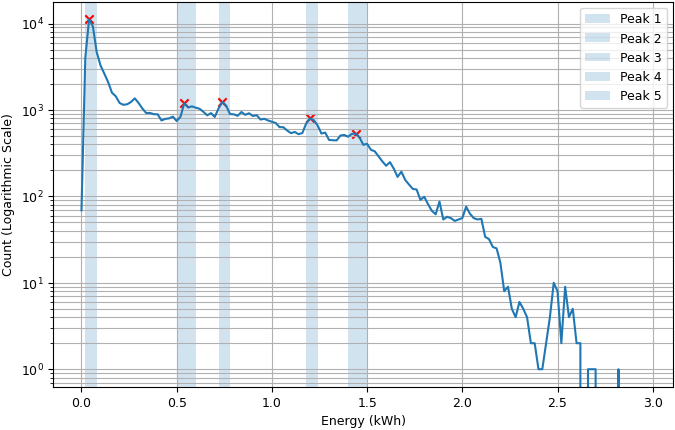

In [ ]:
# define the bin width and number of bins of histogram
binwidth = 0.02  # kWh
bins = np.arange(0, 3, binwidth)

# calculate the distribution of energy values
df_smd_hist, _ = np.histogram(df_smd['Value'], bins=bins)

# require width of 2.5*0.02kWh = 50Wh
peaks, peak_properties = find_peaks(df_smd_hist, prominence=3, width=2.5)

# create figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(bins[:-1], df_smd_hist)

# mark regions around peaks in blue
i = 1
for p, w in zip(peaks, peak_properties['widths']):
  ax.axvspan(bins[int(p - w / 2) + 1], bins[int(p + w / 2) + 1], alpha=0.2, label='Peak {}'.format(i))
  i += 1

# mark peaks with read cross
ax.scatter(bins[peaks], df_smd_hist[peaks], color='red', marker='x')

# adjust formatting and show figure
ax.set_yscale('log')
ax.grid(which='both')
ax.legend()
ax.set_xlabel('Energy (kWh)')
ax.set_ylabel('Count (Logarithmic Scale)')
fig.show()

<a name=frequency_based_methods></a>
### **4.12 Frequency-based methods for low-resolution data**

Frequency-based methods are a useful way to unveil regular patterns in data.
**By applying a Fast Fourier transform to the smart meter data**, the energy signal can be transformed from the time domain to the frequency domain. This way the regularity of a signal can be observed.

Below, you find an **example how to calculate the frequency spectrogram over the entire observation period**. Here, the spectogram shows the periodic peaks in the real part and a pronounced rise in amplitude at a period of 45 min (0.75h) to 1h. This activity can especially be observed in winter because it is caused by the heat pump.

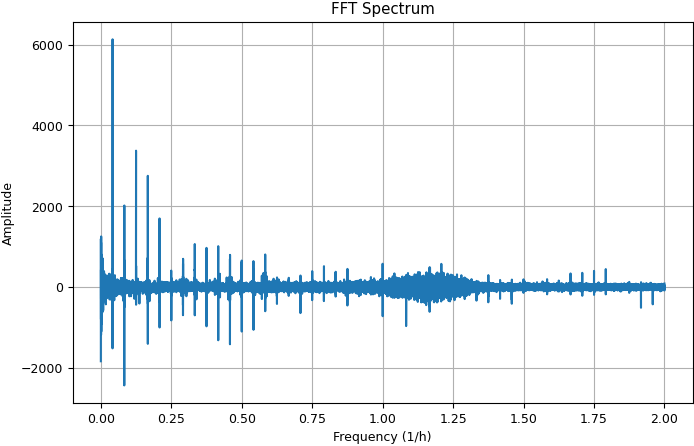

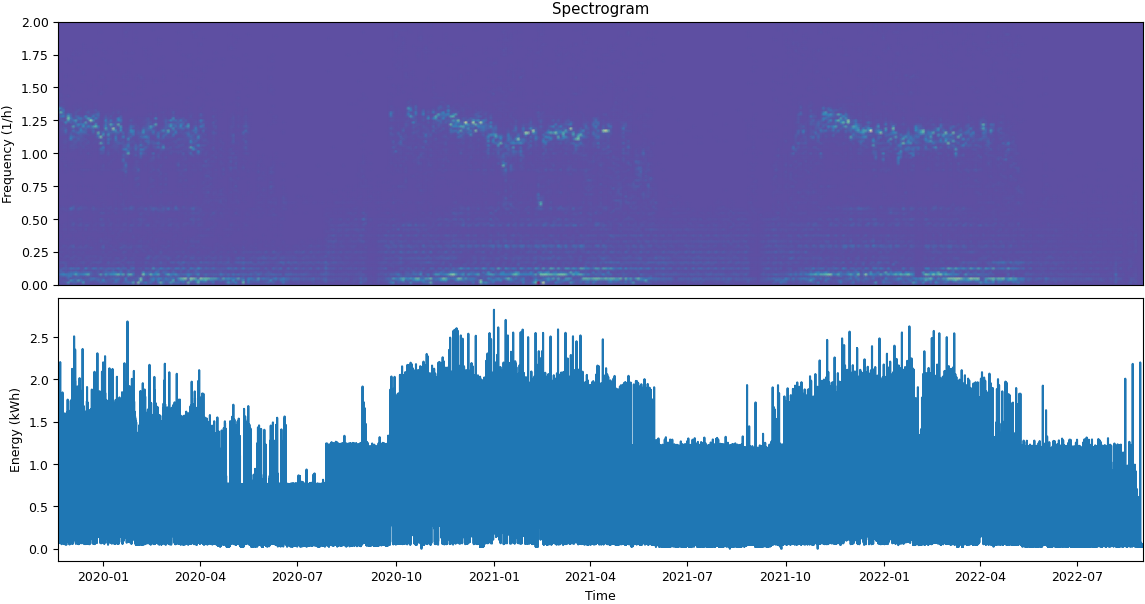

In [ ]:
from scipy.fft import fft, fftfreq
from scipy import signal

# define time sampling interval in hours
T = 0.25

# calculate fft
yf = fft(df_smd['Value'].to_numpy()).real
# calculate fft frequencies
xf = fftfreq(len(df_smd), T)[:len(df_smd) // 2]

# plot fft (excluding fist data point)
fig, ax = plt.subplots()
ax.plot(xf[1:len(df_smd) // 2], yf[1:len(df_smd) // 2])
ax.set_xlabel('Frequency (1/h)')
ax.set_ylabel('Amplitude')
ax.set_title('FFT Spectrum')
ax.grid()
fig.show()

# plot spectrogram
fig, ax = plt.subplots(2, 1, figsize=(14, 7), sharex=False)
# sample frequency in 1 / hours
fs = 1 / 0.25
f, t, Sxx = spectrogram(df_smd['Value'].to_numpy(), fs)
ax[0].pcolormesh(t, f, Sxx, shading='gouraud', cmap='Spectral_r')
ax[0].set_ylabel('Frequency (1/h)')
ax[0].set_title('Spectrogram')
ax[0].set_xticks([])
# plot original data for comparison
ax[1].plot(df_smd['Value'])
ax[1].set_xlim(df_smd.index[0], df_smd.index[-1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Energy (kWh)')

fig.subplots_adjust(hspace=0.05)
fig.show()

[Bring me back to the outline](#outline)

<a name=nilm></a>
# **5. Non-Intrusive Load Monitoring (NILM) / Load Disaggregation** 💡
Non-Intrusive Load Monitoring (NILM), also known as load disaggregation, addresses the **extraction of device-specific loads from measurements that combine multiple loads**.
For a detailed overview of tools, metrics, and data sets, we refer to [23].

Here we want to give a **brief overview of the idea** behind disaggregation. In our case **we try to extract the energy consumption of the heat pump from the total consumption**.
For this we use the features and pre-processing methods mentioned above.

<a name=classification_for_appliance_detection></a>
### **5.1 Using classification algorithms to detect appliance installations**

Recall that our data includes a separate column for heat pump consumption.
In the following, we use **linear regression to determine heat pump consumption from total consumption**.
In doing so, we use the seasonal features defined [above](#adding_time_information).
The model is trained with the first year data and tested with the rest of the data.

Note that you can **easily extend** the features with temperature readings, time of day information, and other derived time series properties such as switching activity.
Try it out and see how it affects performance!

In [ ]:
# Use season features from above
df_add = add_descriptive_columns(df_smd, basic=False, seasons=True, weekday=False, daytime=False)
X = df_add[['Value', 'summer', 'winter', 'autumn', 'spring']].to_numpy()
y = df_add['Value_HeatPump'].to_numpy()

# Fit the linear regression model to the first year
reg = LinearRegression().fit(X[:365 * 96], y[:365 * 96])
# Predict rest of the data
y_pred = reg.predict(X[365 * 96:])

# Report performance and compare to a naive guess of no heat pump activity
print('Fit Score:', reg.score(X[:365 * 96], y[:365 * 96]))
print('MAE prediction:', mean_absolute_error(y_pred, y[365 * 96:]))
print('MAE naive:', mean_absolute_error(np.zeros_like(y[365 * 96:]), y[365 * 96:]))

Fit Score: 0.7794214158719875
MAE prediction: 0.13476029525529268
MAE naive: 0.3031268482365742


<a name=nilm_deep_learning></a>
### **5.2 Applying simple deep learning models for NILM**

As a simple **demonstration of a more advanced machine learning approach**, we use a **small neural network** to perform disaggregation. Since there are many tutorials on applying deep networks to regression tasks, we provide only a simple example from sklearn. You can easily adjust the model parameters or define your own, bigger models.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup network model
reg = MLPRegressor(hidden_layer_sizes=(100, 100), solver='adam', random_state=1, max_iter=500)

# Fit training data
reg.fit(X[:365 * 96], y[:365 * 96])
# Predict rest of the data
y_pred = reg.predict(X[365 * 96:])

# Report performance
print('Fit Score:', reg.score(X[:365 * 96], y[:365 * 96]))
print('MAE prediction:', mean_absolute_error(y_pred, y[365 * 96:]))

Fit Score: 0.8110226605327255
MAE prediction: 0.11849053700428729


<a name=nilm_hmm></a>
### **5.3 Applying Hidden Markov Models for NILM**

Since disaggregation essentially attempts to **estimate the operating state of a device from a noisy observation** of its demand, **Hidden Markov Models (HMMs)** are a promising method. A notebook that discusses HMMs for disaggregation can be found here: https://nbviewer.org/github/nilmtk/nilmtk/blob/v0.1.0/notebooks/fhmm.ipynb

<a name=evaluating_nilm></a>
### **5.4 Correctly evaluating NILM approaches**
We would like to point out that NILM is a vibrant research area with a countless number of publications in the field. Often, the approaches presented are difficult to compare due to the use of different data sets, the lack of available implementations, and the diversity of evaluation metrics. Therefore, the **Python framework [nilmtk](https://nilmtk.github.io) is an attempt to provide a unified interface and benchmarking of NILM approaches**. In the developers' words, *nilmtk* provides:

- parsers for eight common data sets
- a collection of pre-processing algorithms
- a set of statistics to describe data sets
- a set of reference benchmark disaggregation algorithms
- a common set of accuracy metrics

For more information on NILM evaluation, including an overview of metrics and existing data sets, we recommend reading [14].

<a name=rule_based_heuristics></a>
### **5.5 Rule-based heuristics for pattern isolations**

In some circumstances, it can be easier to rely on **heuristic rules to extract certain patterns visible in the data**. The advantage of such heurisitics is that they are training-free and rather easy to implement.
On the other hand, rule-based heuristics usually require more domain knowledge and experimental evaluation.

In the following, we provide an **example of an approach that extracts regular patterns at night-time**, which can be observed from day to day. Such patterns at night are typically linked to the domestic hot water production if done electrically. As the algorithm presented in the following may be a bit more complicated to understand, we walk you slowly through each step.

Our heuristics are based on the following **assumptions**:
- there is only one activation per night
- the consumption is above a threshold every day
- the consumption in each activation is constant
- the start times of the activations are the same (or similar) every day

To start with, let's again **have a look at the original data**.

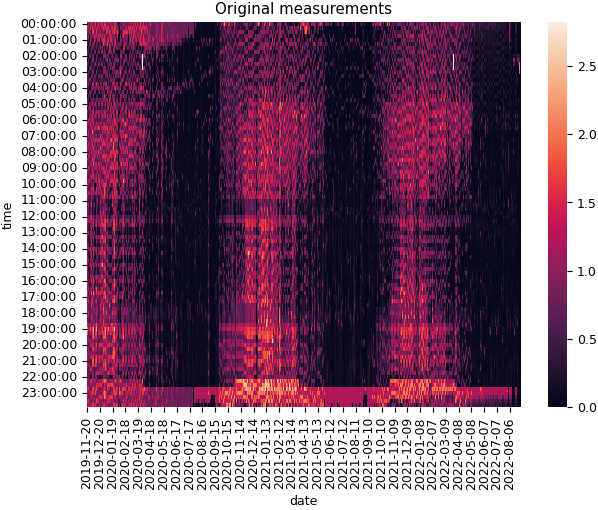

In [ ]:
# As we will add columns to the df, make a copy
df_disag = df_smd.copy()

# show heatmap
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(create_heatmap(df_disag, column='Value'), ax=ax)
ax.set_title('Original measurements')
fig.show()

We assume that the consumption during activation exceeds a certain minimum value. Therefore, we interpret this minimum as a threshold and **apply a threshold filering** to the data. This leaves us with what we call **activation "plateaus"**, meaning that times of consumption above the threshold are separated by times of consumption below the threshold.

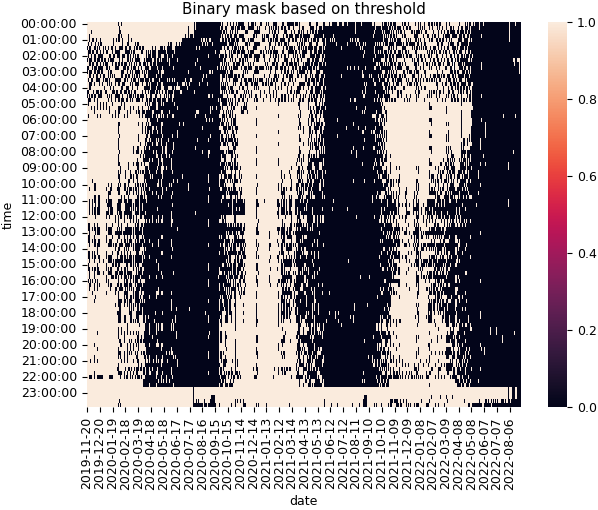

In [ ]:
# Threshold data at 0.5 kWh corresponding to a minium power of 2kW. We can derive this value from the height of the peak in the mean demand profile.
# Create a binary mask based on the thresholding.
df_disag['mask_threshold'] = (df_disag['Value'] > 0.5).astype(int)

# Plot the mask
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(create_heatmap(df_disag, column='mask_threshold'), ax=ax)
ax.set_title('Binary mask based on threshold')
fig.show()

Now, that we found potential activation plateaus, we can incorporate information about time. Recall that we aim to find activations that follow the prominent regular pattern in the late evening hours. Therefore, we **extract the start times of each detected activation plateau**.

Using a histogram of the time of day of activation times, we can **determine the hour that has the most activations**. Here, we find a clear peak.

**NOTE:** We use a simple trick to make handling the data a lot easier. Recall that we are looking for one activation per night. Since this might start in the evening of one day and end in the morning of another, we would have to localize an activation accross two days. Instead, we shift the data by 12 hours, such that a "night time" activation will fully fall within one day. As long as we undo the shift this does not change anything in the data (just like working in a different timezone does not change when something actually happens).

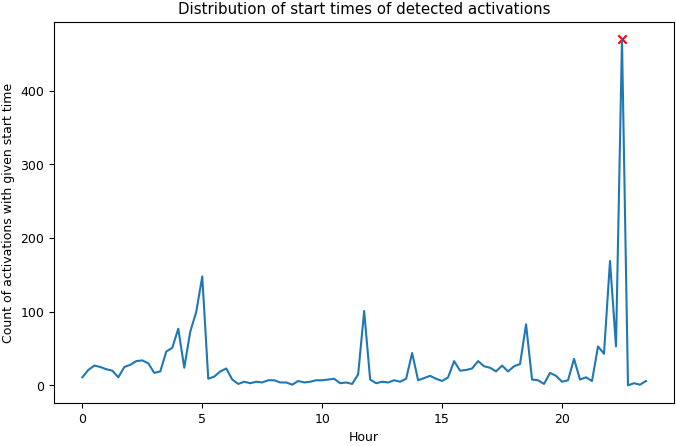

In [ ]:
# Shift data by 12 hours such that activations fall within the same day. This makes handling the data easier and we shift them back later.
df_disag.index += dt.timedelta(hours=12)

# In the binary mask, we find all "plateaus" - intervals of 1s separated by 0s
# We require the length to be at least 45 minutes
_, plateau_properties = find_peaks(df_disag['mask_threshold'], plateau_size=3, prominence=0.1)
# The left_edges of the plateaus are the times of the activations
left_edges = plateau_properties["left_edges"]

# Find the highest peak in the distribution of activation times. This will be the regular edge observed in the data.
bins = np.arange(0, 96)
hist, _ = np.histogram(df_disag.index[left_edges].hour * 4 + df_disag.index[left_edges].minute // 15, bins=bins)
peaks, peak_properties = find_peaks(hist, prominence=1)
peak_activation_time = peaks[peak_properties['prominences'].argmax()]

# Plot the distribution of start times and the identified peak.
fig, ax = plt.subplots()
# just for visualization we shift back the data
ax.plot(bins[:-1] / 4, list(hist[4 * 12 :]) + list(hist[:4 * 12]))
ax.scatter(bins[peak_activation_time + 4 * 12 - 1] / 4, hist[peak_activation_time], marker='x', color='r')
ax.set_title('Distribution of start times of detected activations')
ax.set_xlabel('Hour')
ax.set_ylabel('Count of activations with given start time')
fig.show()

Next, we **remove activations that start before the identified peak time** because they are not of interest anymore. However, it could happen that from day to day the activation time deviates a little. Therefore, we still keep activations that start up to one hour before the identified peak time.

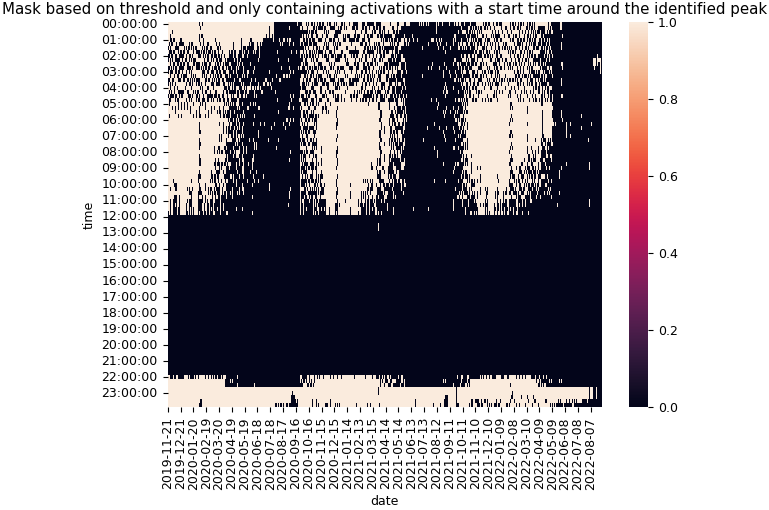

In [ ]:
# Set values before the edge to zero. We allow up to one hour before the peak.
df_disag['mask_regularity'] = df_disag['mask_threshold']
df_disag.loc[df_disag.index.hour < peak_activation_time // 4, 'mask_regularity'] = 0

# Shift back the time for the plot
df_disag.index += dt.timedelta(hours=12)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(create_heatmap(df_disag, column='mask_regularity'), ax=ax)
ax.set_title('Mask based on threshold and only containing activations with a start time around the identified peak')
fig.show()

# shift the time forward again for further processing
df_disag.index += dt.timedelta(hours=12)

Since we have already removed many unwanted activations, all remaining plateaus in the mask start at the earliest around the determined activation time. Next, we are only interested in **the first activation of each evening**, since we assume that any subsequent activation relates to a different activity pattern.

**Note:** Remember that we have shifted the time index by 12 hours so that the activation is in the middle of the day and does not stretch into the next day.

Finally, we have found the correct activations and can examine them.

<ipython-input-37-7c5ee0b73e8e>:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for date, df in df_disag.groupby([df_disag.index.date]):


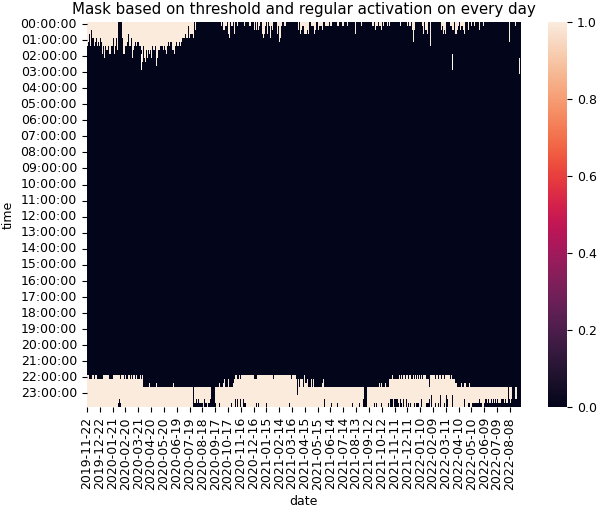

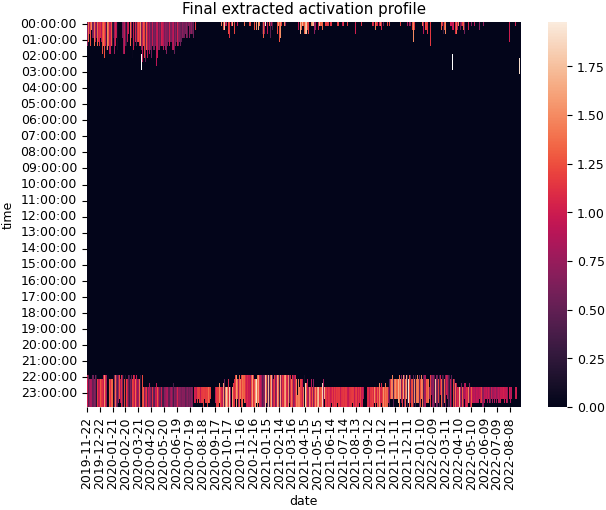

In [ ]:
# new column for the masked out data for every day
df_disag['mask_daily'] = 0
# new colum for the energy consumption of the regular activations
df_disag['profile'] = 0

# on each day re-calculate the plateaus
for date, df in df_disag.groupby([df_disag.index.date]):
  _, plateau_properties = find_peaks(df['mask_regularity'], plateau_size=3, prominence=0.1)
  left_edges = plateau_properties["left_edges"]
  right_edges = plateau_properties["right_edges"]

  # take the first plateau as the activation
  if len(left_edges) > 0:
    le = left_edges[0]
    ri = right_edges[0]
    start = dt.datetime.combine(date, dt.time(hour=le // 4, minute=le % 4 * 15))
    end = dt.datetime.combine(date, dt.time(hour=ri // 4, minute=ri % 4 * 15))
    df_disag.loc[timezone(TZ_LOCAL).localize(start):timezone(TZ_LOCAL).localize(end), 'mask_daily'] = 1

    # Estiamte the consumption during the activation as the energy difference at switch-on and switch-off
    # This should capture the energy amount added by the activation.
    diff_on = df_disag.loc[timezone(TZ_LOCAL).localize(start) + dt.timedelta(minutes=15), 'Value'] \
           - df_disag.loc[timezone(TZ_LOCAL).localize(start) - dt.timedelta(minutes=15), 'Value']
    diff_off = df_disag.loc[timezone(TZ_LOCAL).localize(end) - dt.timedelta(minutes=15), 'Value'] \
           - df_disag.loc[timezone(TZ_LOCAL).localize(end) + dt.timedelta(minutes=15), 'Value']
    df_disag.loc[timezone(TZ_LOCAL).localize(start):timezone(TZ_LOCAL).localize(end), 'profile'] = max(np.mean([diff_on, diff_off]), 0)

# Shift back the time
df_disag.index += dt.timedelta(hours=12)

# Plot heatmaps
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(create_heatmap(df_disag, column='mask_daily'), ax=ax)
ax.set_title('Mask based on threshold and regular activation on every day')
fig.show()

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(create_heatmap(df_disag, column='profile'), ax=ax)
ax.set_title('Final extracted activation profile')
fig.show()

This leaves **only a single activation per night** with a constant value.
The start times are regular, but we have allowed deviations of up to one hour to account for the fluctuations caused by the daylight saving time changeover.

[Bring me back to the outline](#outline)

<a name=flexibility_estimation></a>
# **6. Flexibility Estimation** 📊

One **promising application** of smart meter analytics, and load disaggregation in particular, is the use of flexibility. This concept refers to the **postponing of consumption from appliances in order to stabilize the power grid**. An example of this is to delay the operation of a heating system or to defer the charging of an electric vehicle during periods of high demand. Even further, the operation of such devices can be coordinated with local solar or wind generation, if available.

In the following, **we estimate the flexibility of water heating in the sample household**.
To do this, we use the patterns we isolated earlier.
These regular high demand patterns are generated by a boiler that runs only once a day.
A typical hot water boiler can easily store heat throughout the day and therefore has inherent heat storage.
This makes it ideal for shifting hot water production to other times of the day without sacrificing comfort for the owner.

<a name=load_shifting_potential></a>
### **6.1 Estimating load shifting potential of disaggregated appliances**
To estimate the impact of the boiler on household demand, **we calculate its share of daily energy demand and its contribution to peak demand**.

Share of boiler consumption: 0.1442343237633432
Peak reduction without boiler: 0.9510985116938342


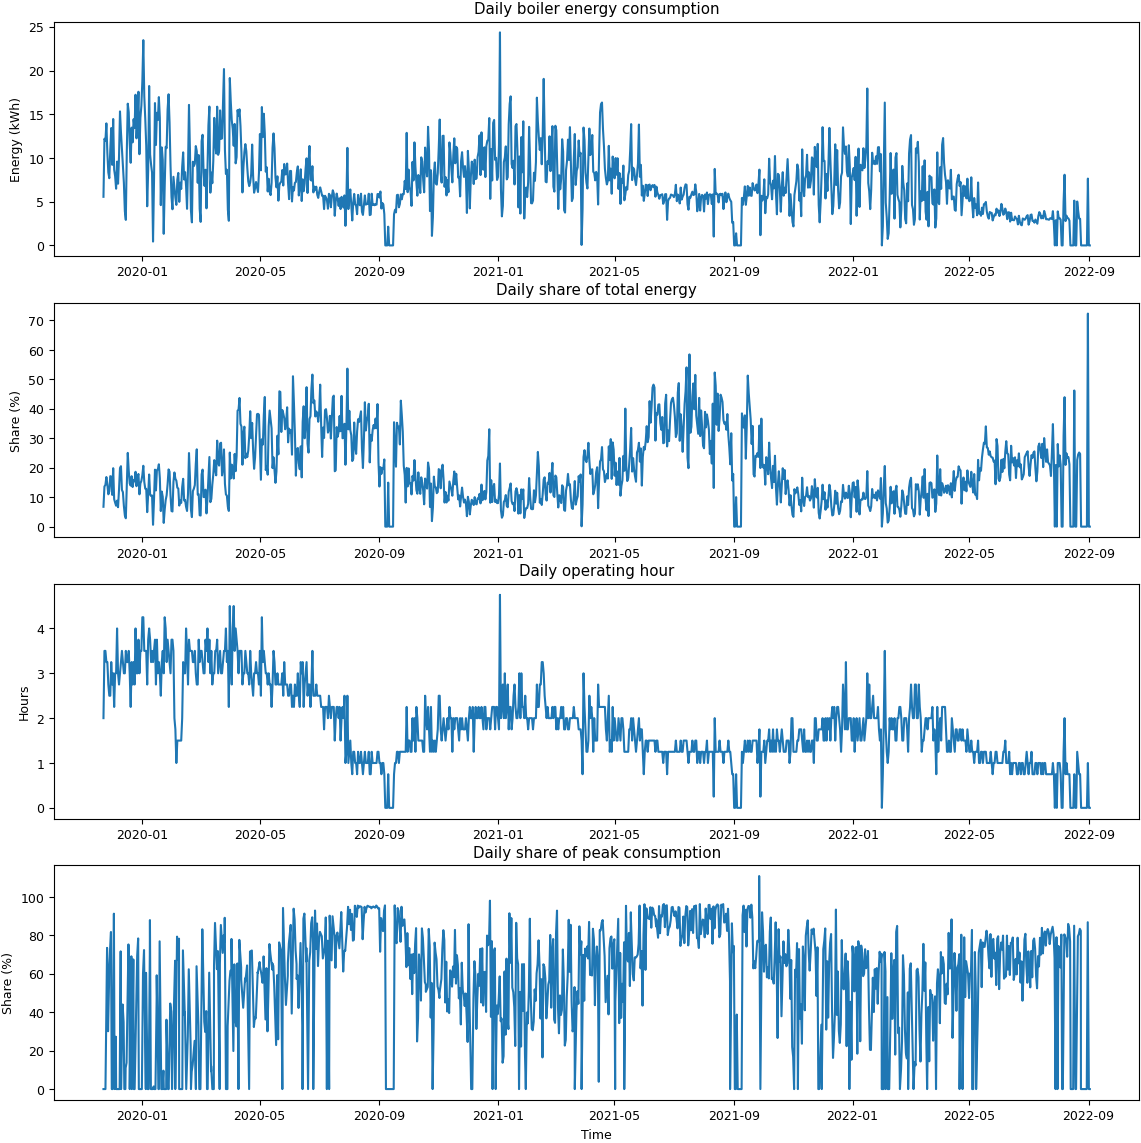

In [ ]:
# Calculate daily values
# here we could use outlier detection to make sure our disaggregation result are reasonable
daily_boiler = calculate_daily_consumption(df_disag, column='profile')
daily_total = calculate_daily_consumption(df_disag, column='Value')

fig, ax = plt.subplots(4, 1, figsize=(14, 14))

# Daily energy
ax[0].plot(daily_boiler)
ax[0].set_ylabel('Energy (kWh)')
ax[0].set_title('Daily boiler energy consumption')

# Daily energy share
ax[1].plot(daily_boiler / daily_total * 100)
ax[1].set_ylabel('Share (%)')
ax[1].set_title('Daily share of total energy')

# Daily operating hours
ax[2].plot(df_disag.groupby([df_disag.index.date])['mask_daily'].sum() / 4)
ax[2].set_ylabel('Hours')
ax[2].set_title('Daily operating hour')

# Daily peak contribution (percent of demand at peak of day)
# get the index of the peak on every day
daily_peak_mask = df_disag.groupby([df_disag.index.date])['Value'].transform(max) == df_disag['Value']
# plot the share of boiler consumption during the peak times
ax[3].plot((df_disag['profile'] / df_disag['Value'])[daily_peak_mask] * 100)
ax[3].set_ylabel('Share (%)')
ax[3].set_title('Daily share of peak consumption')

ax[-1].set_xlabel('Time')
fig.show()


# Calculate metrics for full time span
print('Share of boiler consumption:', df_disag['profile'].sum() / df_disag['Value'].sum())
print('Peak reduction without boiler:', (df_disag['Value'] - df_disag['profile']).max() / df_disag['Value'].max())

We find that the **daily boiler demand** ranges from about 5 kWh/day in summer to 15 kWh/day in winter, with occasionally much higher demand which might partially be caused by errors in the disaggregation. While this demand is only about **10% of total consumption** in winter, it is up to **50% of total daily household consumption** in summer.
This difference is due to the high electricity demand for heating in winter.

The results show that a significant portion of a household's electricity consumption is available for easy and trouble-free shifting by controlling the **times for boiler activation during the day**.
Especially in summer, this potential can be leveraged to make use of solar power generated during the day.

We can also look at the **peak electricity consumption** of the household with and without the boiler.
This ratio is especially **important for the power grid**, as transformer stations and connecting lines must be dimensioned for the highest power consumption, even if it is only reached on few occasions.

During the entire period, the **boiler increases the highest power demand by 5%**.
This low number is likely influenced by missed detection of boiler consumption.
There are many days when the contributes a much higher percentage of the daily peak demand.
This is especially true on summer days because of the lower heating demand.

Thus, although we see over the entire period that we would have a similar peak without the boiler, we also find that the boiler is very often responsible for the highest peak.
Since it is unlikely that the natural peaks of multiple households will coincide, reducing the peak of the boiler has a significant impact on the overall peaks in a community.

[Bring me back to the outline](#outline)

<a name=anomaly_detection></a>
# **7. Anomaly Detection** 🔦
A common topic in time series analysis is **anomaly detection**. In the context of energy data, **potential application scenarios** are the recognition of atypical building occupancy, energy theft, broken appliances, or unusually high energy consumption in order to inform the affected households.

<a name=online_vs_offline_cpd></a>
### **7.1 Introduction to online vs. offline change point detection**
According to [9], "**change points are abrupt changes in time series data**. Such abrupt changes may represent transitions between different states". In the context of energy consumption, there are **many reasons** that can cause noticeable change points to be observed in smart meter data. **For example**:
- the installation of a new appliance
- changes in occupancy
- a malfunction in the heating system (e.g. additional electric heating instead of heat pump)
- electricity theft
- etc.

**Change point detection (CPD) methods can be categorized as follows:**.
- **Offline CPD:** Looking at the entire data set at once; looking back in time to identify all change points.
- **Online CPD:** continuous observation over time and identifying change points in real time.

The following section is an example of offline change point detection.

<a name=applying_offline_cpd></a>
### **7.2 Finding state changes with offline change point detection**
To understand how offline change point detection works, it is best to imagine that existing algorithms take an approach similar to the [sliding_window](#sliding_window_approaches) we have already learned about. Basically, at each time point, the **time series is split into a time series before and after the current observation**. By comparing the distributions before and after, the **difference between the distributions** can be determined using various functions (for example, the simplest would be something like the absolute difference of the means). Change points are then points where the **change in the distribution is very noticeable**.

There are some Python packages that provide offline detection of change points for time series data (see the [additional resources](#additional_resources) we list at the end of the tutorial). One of the most popular packages is [ruptures](https://pypi.org/project/ruptures/). So let's take a look at how we can apply it to our smart meter data.

**NOTE:** With a large number of observations, the calculations may take a while. Therefore, we will limit the application below to a few days as the observation period. Also, note that finding a cost function for ranking change points and determining an appropriate number of change points often relies to some degree on trial and error.

Changepoint 1 at: 2020-01-30 11:00:00+01:00
Changepoint 2 at: 2020-02-28 00:00:00+01:00


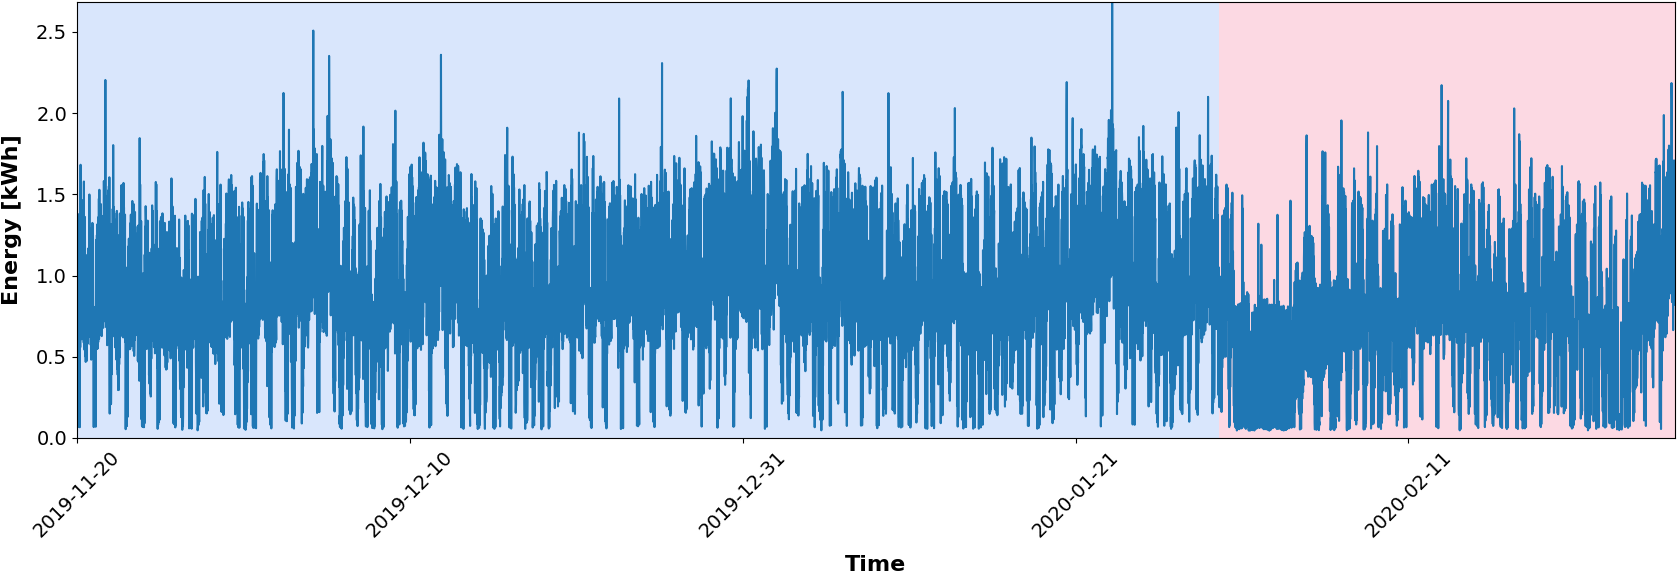

In [ ]:
# ----------------------------
# APPLY CHANGE POINT DETECTION
# ----------------------------

# the number of days from the start of the data frame, you want to look at
# NOTE: we added this because for a large number of observations, the calculation can become quite slow
days = 100

# extract the signal, i.e. values of energy consumption
signal = df_smd['Value'].values[:96*days]

# define the number of break points to be determined
n_bkps = 1

# try out different algorithms
# algo = rpt.Dynp(model='l2').fit(signal)
# algo = rpt.Dynp(model="rank").fit(signal)
algo = rpt.Binseg(model='l2').fit(signal)

# determine the break points
bkps = algo.predict(n_bkps=n_bkps)

# get the timestamps of the change points
bkps_timestamps = [df_smd.index[e] for e in bkps]
for idx, e in enumerate(bkps_timestamps):
    print('Changepoint {} at: {}'.format(idx+1, e))

# ----------------------------
# VISUALIZE RESULTS
# ----------------------------

# show results as plot
fig, ax = rpt.display(signal, bkps, figsize=(17, 6))

# as the original plot does not show the timestamps, let's add them
xticks = ax[0].get_xticks()
xtick_labels = df_smd.iloc[xticks].index.strftime('%Y-%m-%d').values
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels, fontsize=14, rotation=45)
ax[0].set_xlim(0, 96*days+1)
ax[0].set_xlabel('Time', fontsize=16, fontweight='bold', labelpad=10)

# adjust y-axis
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=14)
ax[0].set_ylabel('Energy [kWh]', fontsize=16, fontweight='bold', labelpad=10)
ax[0].set_ylim(0, np.max(signal))

plt.tight_layout()
plt.show()

<a name=finding_anomalies_sliding_window></a>
### **7.3 Finding anomalies with sliding window**
While we use offline change point detection in the above section to find state changes (i.e., times when the time series changes), we can also **use a simple sliding window** (like [here](#sliding_window_approaches)) **and use peak detection** (like [here](#detecting_switching_activities)) to find anomalies.

Number of anomalies found: 14


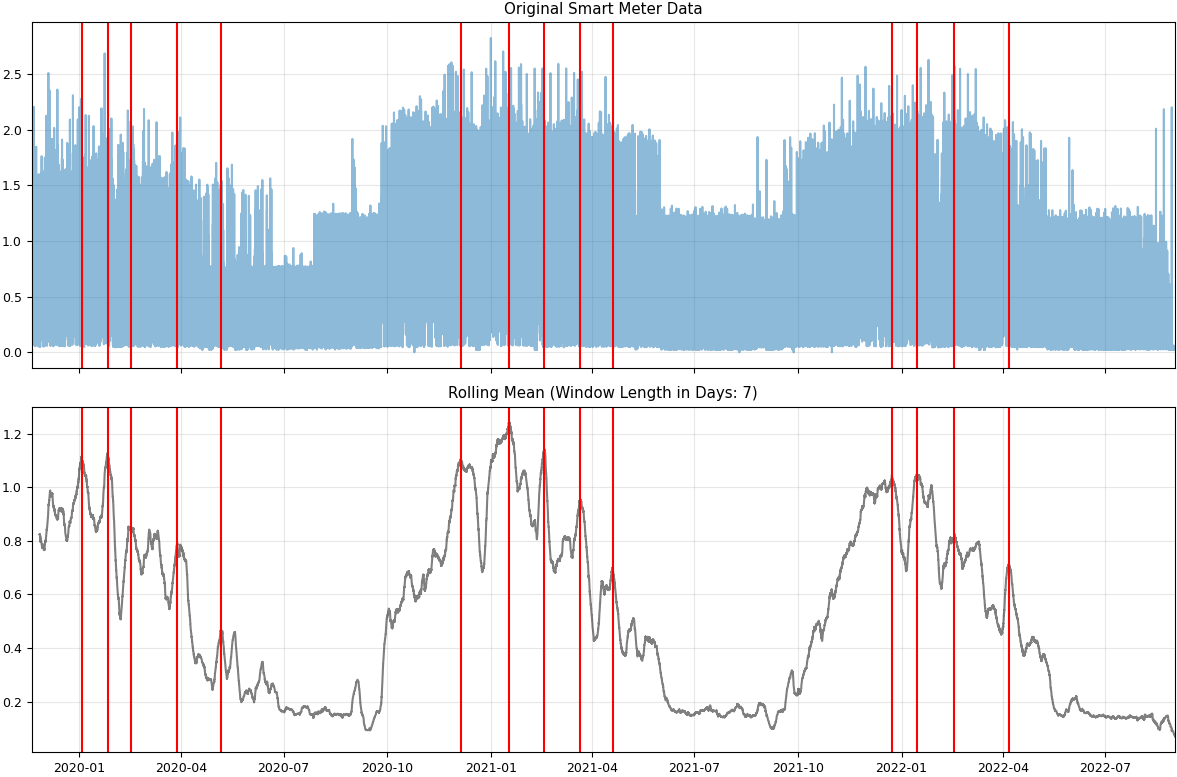

In [ ]:
# ----------------------------
# ANOMALY DETECTION WITH ROLLING MEAN
# ----------------------------

# do this when wanting to see the whole time series
df_sub = df_smd.copy()

# apply sliding window with rolling mean
window_days = 7
prominence = 0.2

df_sub['rolling_mean'] = df_sub['Value'].rolling(int(window_days*96)).mean()
vals = df_sub['rolling_mean'].values

# find peaks
anomaly_indices = find_peaks(vals, prominence=prominence)[0]
anomaly_timestamps = df_sub.iloc[anomaly_indices].index.values
anomaly_values = df_sub.iloc[anomaly_indices]['Value'].values
print('Number of anomalies found: {}'.format(len(anomaly_indices)))

# ----------------------------
# VISUALIZE RESULTS
# ----------------------------

# create figure
fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# plot the original signal
ax[0].plot(df_sub.index.values, df_sub['Value'].values, alpha=0.5)
ax[0].set_title('Original Smart Meter Data')
for e in anomaly_timestamps:
    ax[0].axvline(x=e, color='red')
ax[0].grid(alpha=0.3)
ax[0].set_xlim(df_sub.index.min(), df_sub.index.max())

# plot the anomaly scores
ax[1].plot(df_sub.index.values, vals, color='black', alpha=0.5)
ax[1].set_title('Rolling Mean (Window Length in Days: {})'.format(window_days))
for e in anomaly_timestamps:
    ax[1].axvline(x=e, color='red')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<a name=applying_sax></a>
### **7.4 Applying Symbolic Aggregate ApproXimation**
Another common method for finding anomalies is to first perform a dimensionality reduction of the time series data in the form of a **Symbolic Aggregate ApproXimation (SAX)**. Following the descriptions in [12], we will briefly summarize **the different steps**. While the procedure may sound complicated, it probably becomes more intuitive if you additionally consider the following diagram (from [12]).

1. **Normalization:** The time series is normalized (typically with Z-score normalization).
2. **Breakpoints:** The range of values is divided into equiprobable regions based on a Gaussian distribution. The regions are separated by breakpoints - their calculation depends on the selected alphabet size. In the following figure, the alphabet size is 3, resulting in 3 different breakpoint regions. The breakpoints are represented by the dashed grey horizontal lines.
3. **Chunking:** The time series is broken down into individual subsequences (can also be based on a sliding window approach). In the following figure, the chunks are represented by the vertical lines.
4. **Averaging:** The average of the individual subsequences is calculated.
5. **Assignment of characters:** Each mean value of a subsequence is assigned to an alphabetic character corresponding to the breakpoint region. Recall the alphabet size of 3 and the corresponding horizontal breakpoints in the graph below. Therefore, the mean values of each chunk are assigned to the three letters a, b, and c.

| 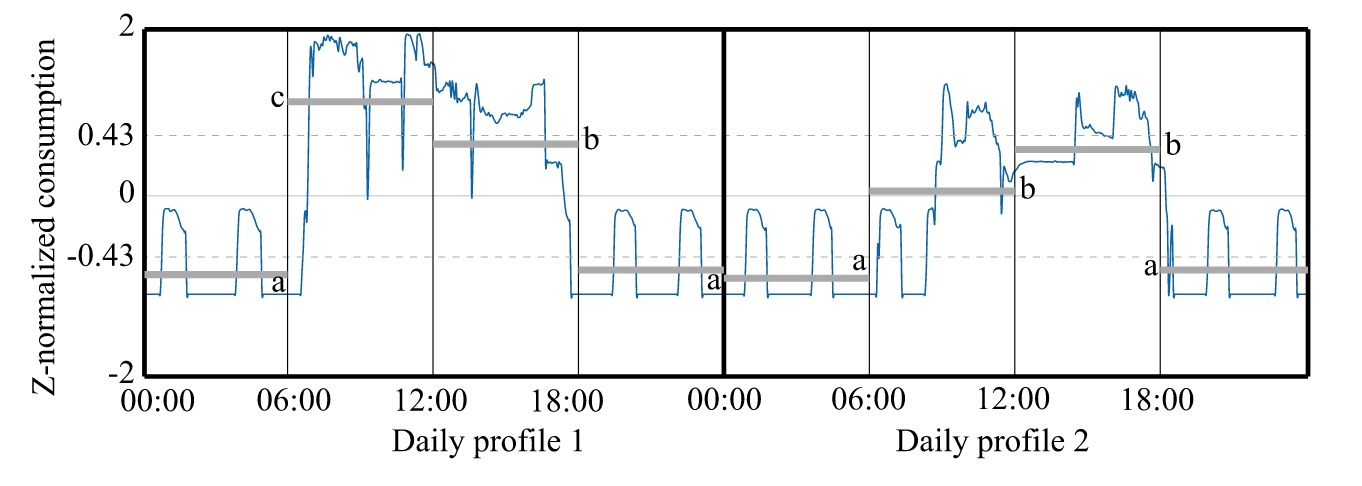 |
|:--:|
| *Source: SAX WORD creation example - taken from [12].* |

Now each subsequence is approximated by a single alphabetic character. **Successive characters form words**, which can serve as a **guide to how regularly or irregularly certain patterns occur**. In Python, this is implemented by the [pyts package](https://pyts.readthedocs.io/en/stable/index.html) or the [saxpy package](https://github.com/seninp/saxpy). In the following example, we make use of the latter.

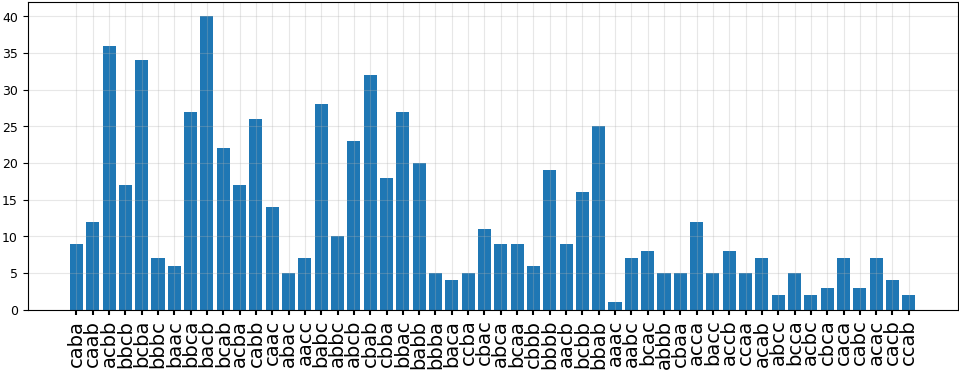

In [ ]:
# select the smart meter data values
days = 7
np_vals = df_smd['Value'].values[:96*days]

# set parameters
win_size = 8
paa_size = 4
alphabet_size = 3
nr_strategy = 'exact'
z_threshold = 0.01

# apply SAX
sax = sax_via_window(np_vals, win_size=win_size, paa_size=paa_size, alphabet_size=alphabet_size, nr_strategy=nr_strategy, z_threshold=z_threshold)
# the method returns a dictionary with words as keys and lists as items, where the elements in the list represent positions on time series

# get number of occurences of each word
sax_statistics = sax.copy()
for k in sax.keys():
  sax_statistics[k] = len(sax_statistics[k])

# plot a histogram to show regularity of occurences
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(list(sax_statistics.keys()), sax_statistics.values())
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90, width=1.5)
ax.grid(alpha=0.3)
plt.show()


<a name=finding_discords_and_motifs></a>
### **7.5 Finding discords and motifs**
In practice, SAX can be a useful way to distinguish between discords and motifs, which according to [11] can be defined as follows:  
- **Motifs:** "a subsequence of data that exhibits a pattern that frequently occurs in a data stream"
- **Discords:** "a subsequence that occurs rarely and is considered anomalous amongst the rest of the data set"

Publications [10], [11], [12] provide some examples of the application to smart meter data. The following figure shows an example of the application of discord detection to a larger data set of smart meter data.

| 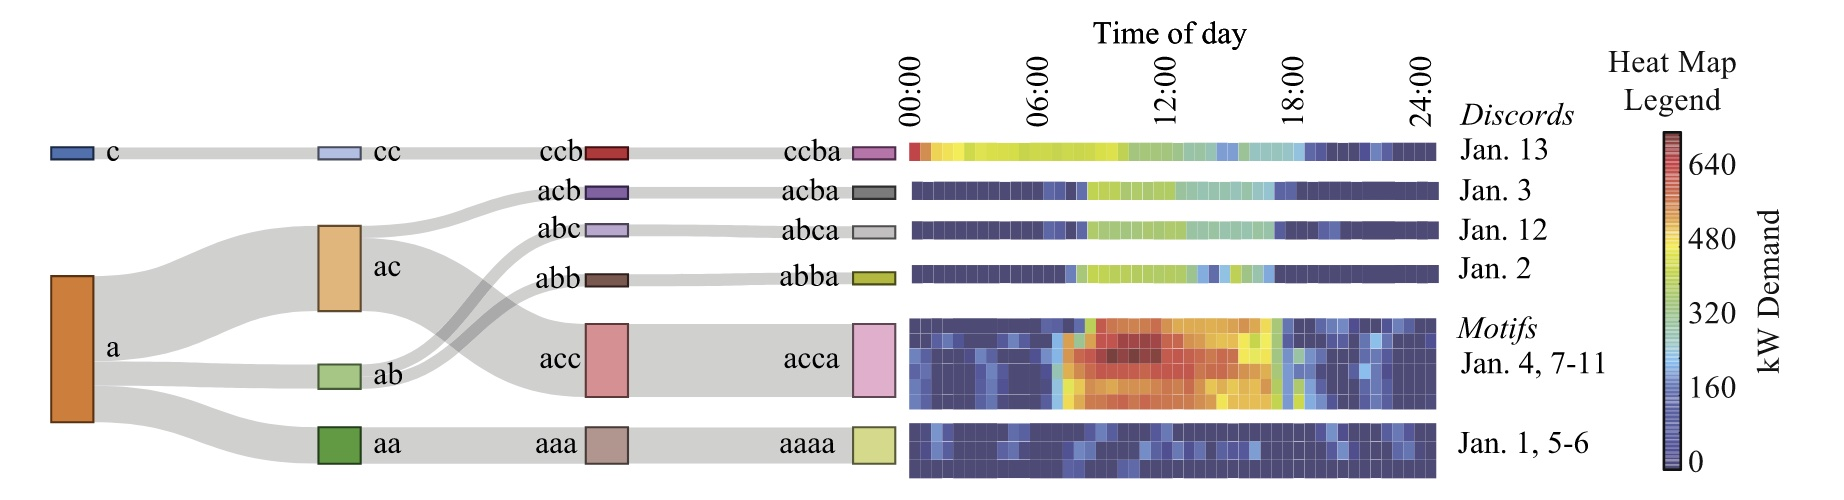 |
|:--:|
| *Source [11]: Example of motif and discord candidate extraction from a two week example data set.* |

Again, we can use the [saxpy package](https://github.com/seninp/saxpy) to easily **find discords** and mark them accordingly. Let's check out how.

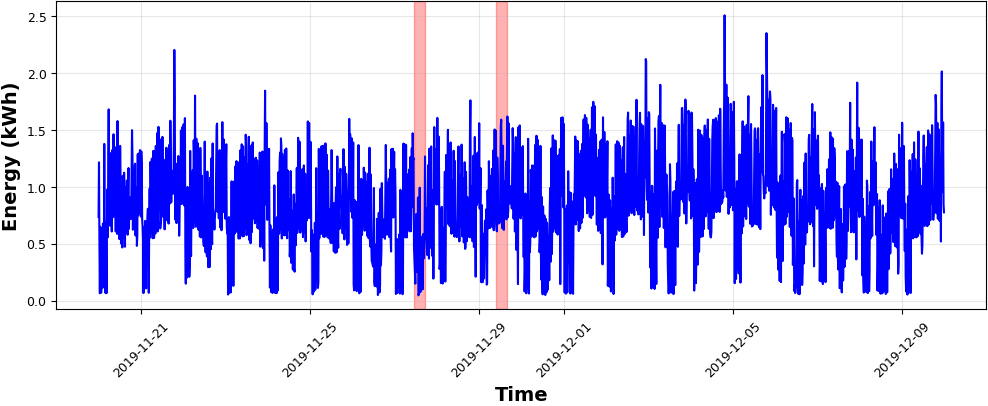

In [ ]:
# ------------------
# FIND DISCORDS
# ------------------

# select the smart meter data values
days = 20
np_vals = df_smd.iloc[:96*days]['Value'].values
np_timestamps = df_smd.iloc[:96*days].index.values

# set parameters
win_size = 24
paa_size = 4
alphabet_size = 3
nr_strategy = 'exact'
num_discords = 2

# find discords
discords = find_discords_hotsax(np_vals, win_size=win_size, a_size=alphabet_size, paa_size=paa_size, num_discords=num_discords)
# method returns a list of sequences where the first element of each sequence refers to the start index of the discord

# get indices of values referring to discords discords
indices = [(e[0], e[0]+win_size+1) for e in discords]

# ------------------
# VISUALIZE
# ------------------

# create figure
fig, ax = plt.subplots(figsize=(12,4))

# plot motifs
ax.plot(np_timestamps, np_vals, color='blue', label='Motifs')

# mark discords
for start, stop in indices:
  ax.axvspan(np_timestamps[start], np_timestamps[stop+1], color='red', alpha=0.3)

# ax.legend(fontsize=14)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Energy (kWh)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.show()

[Bring me back to the outline](#outline)

<a name=customer_segmentation></a>
# **8. Customer segmentation** 🗂️
For **utilities** it is usually of interest to **divide their customer base into different groups**, e.g. high and low consumption customers, or in a more sophisticated form, customers with similar appliance installations or patterns. This information can be **important for a variety of purposes**, such as monitoring the grid, forecasting future demand, or planning energy conservation campaigns, etc. In this section, we therefore use energy signatures and average daily profiles as a starting point for the topic.

<a name=energy_signatures></a>
### **8.1 Extraction of energy signatures through regression**
**Energy signatures** describe the **relationship between the energy consumption of a building and the outdoor air temperature**.
They can basically be understood as **simple scatter plots**, where the:
- **x-axis:** represents the outdoor air temperature.  
- **y-axis:** represents the energy consumption of the building.

The scatter plot shape makes it possible to estimate the energy efficiency of the building and simple features such as the heating system. A good starting point for understanding energy signatures is [13]. The different steps of the method are shown in the figure below.


| 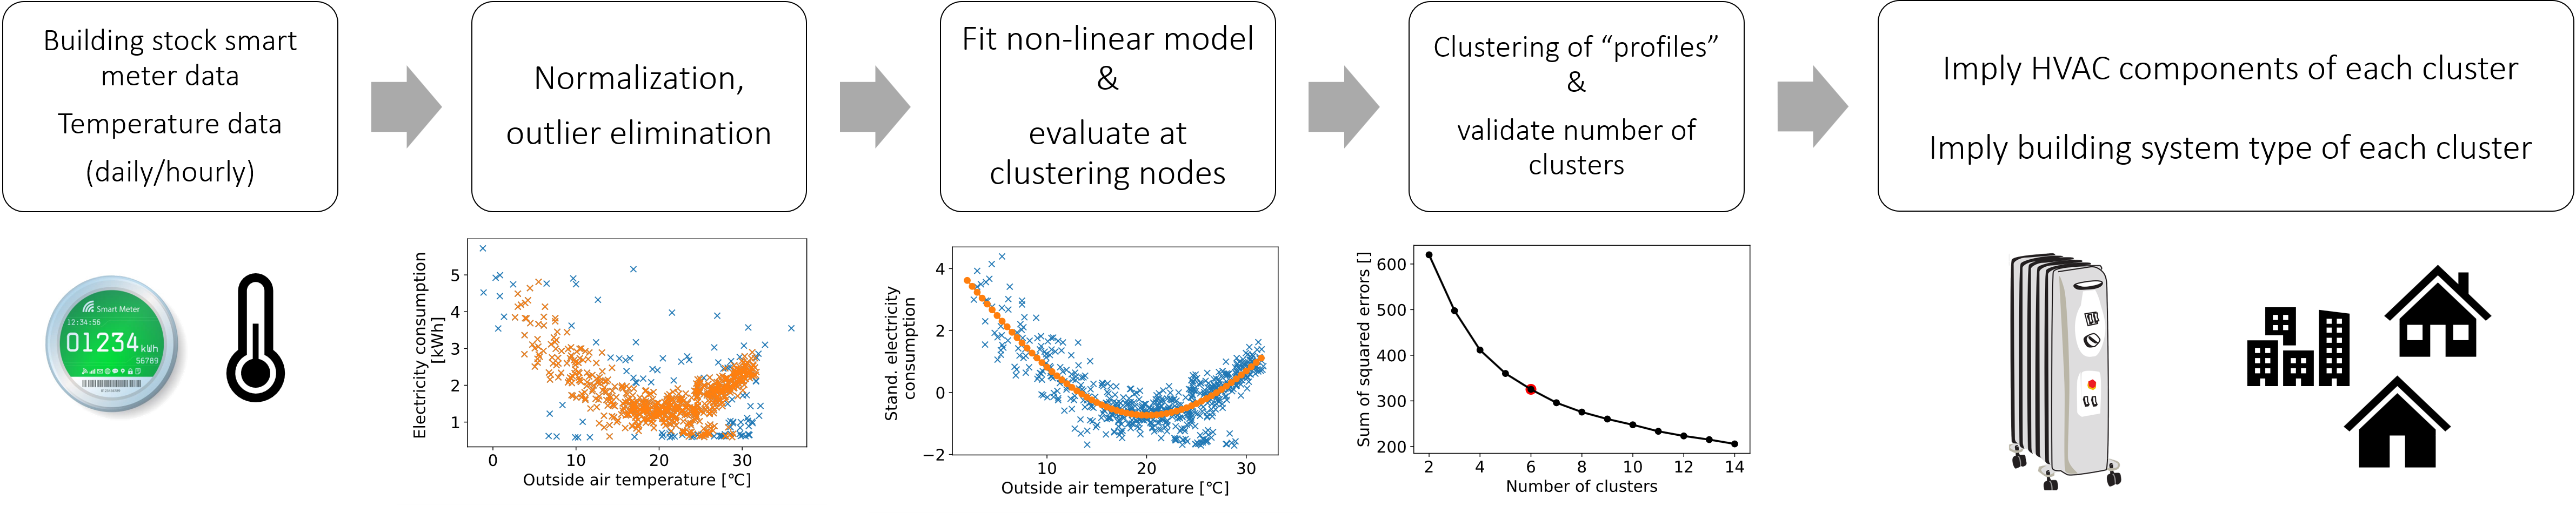 |
|:--:|
| *Source: [GitLab repo](https://gitlab.com/energyincities/energy-signature-analyser) as a part of [13]: The different steps involved in extracting and using energy signatures.* |

In the following, we apply the method of [13] for extracting energy signatures to our smart meter data. The code below is inspired by the authors' [code framework, available on GitLab](https://gitlab.com/energyincities/energy-signature-analyser). **The steps we perform are:**

1. **Downsampling:** We calculate the average energy consumption per day - similar to the [section on interpolation and downsampling](#interpolation_methods)).
2. **Combining with weather data:** We combine the average daily outdoor temperatures and the daily energy data (as we also learned [previously](#combining_smd_weather)).
3. **Normalization:** We normalize the daily energy data using the default scaler (as we learned in the [section on normalization](#normalization_methods)).
4. **Fitting a nonlinear regression model:** We perform a grid search and fit a nonlinear support vector regression model.
5. **Energy signature profile - resampling:** Using the fitted model, we sample between the minimum and maximum observed temperatures in 0.5 degree Celsius increments. The result is a vector that defines the energy signature profile.

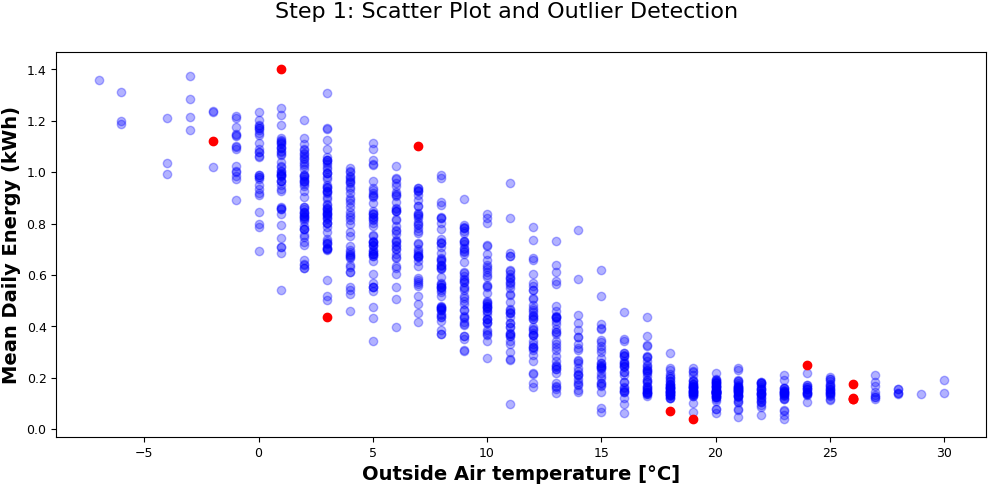

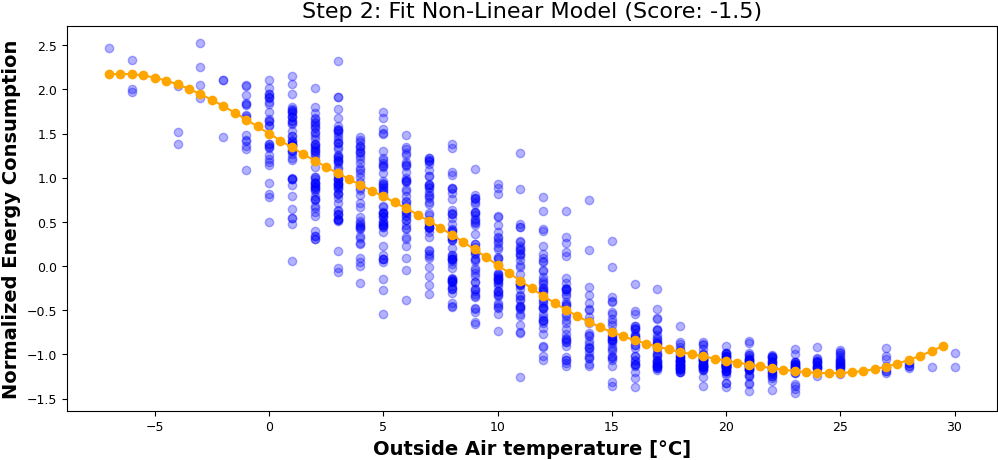

In [ ]:
# ---------------------------
# STEP 1: OUTLIER ELIMINATION
# ---------------------------

# downsample the energy data to daily resolution
df_resampled = df_smd.resample('1D').mean()

# combine daily energy data with daily temperature data
df_combined = merge_smd_with_weather(df_resampled, df_weather_daily, hourly=False)
df_combined = df_combined[['Value', 'daily_avgtemp']].dropna()

# extract the energy and temperature readings
np_energy = df_combined['Value'].values
np_temp = df_combined['daily_avgtemp'].values

# detect outliers
y_pred = LocalOutlierFactor(n_neighbors=5, contamination=0.01).fit_predict(np.vstack((np_temp, np_energy)).T)

# NOTE: now y_pred is a vector referring to the indices of np_energy and np_temp
# NOTE: an outlier is marked with a value of -1 and an inlier with a value of 1
# let's replace these by boolean values and assign them to the pandas data frame
y_pred[y_pred==1] = False
y_pred[y_pred==-1] = True
df_combined['Outlier'] = y_pred.astype(bool)

# -------------------------------------
# VISUALIZE STEP 1: OUTLIER ELIMINATION
# -------------------------------------

fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(df_combined[df_combined['Outlier']==False]['daily_avgtemp'], df_combined[df_combined['Outlier']==False]['Value'], color='blue', alpha=0.3)
ax.scatter(df_combined[df_combined['Outlier']==True]['daily_avgtemp'], df_combined[df_combined['Outlier']==True]['Value'], color='red')
ax.set_xlabel('Outside Air temperature [°C]', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean Daily Energy (kWh)', fontsize=14, fontweight='bold')
fig.suptitle('Step 1: Scatter Plot and Outlier Detection', fontsize=16)
plt.show()

# ---------------------------
# STEP 2: FIT NON-LINEAR MODEL
# ---------------------------

# now use only the non-outlier points
np_energy = df_combined[df_combined['Outlier'] == False]['Value'].values.reshape(-1,1)
np_temp = df_combined[df_combined['Outlier'] == False]['daily_avgtemp'].values.reshape(-1,1)

# normalize energy values
scaler = StandardScaler().fit(np_energy)
np_energy = scaler.transform(np_energy).reshape(-1, 1)

# define a grid searach to find the best parameters
svr = GridSearchCV(SVR(kernel='rbf', epsilon=.3), cv=5, param_grid={"C": [10e0, 10e1], "gamma": np.logspace(-2, -2, 8)})

# perform the grid search and non-linear fit
svr.fit(np_temp, np_energy.ravel())

# choose best model from grid search and get corresponding score
model = svr.best_estimator_
score = r2_score(np_temp, svr.predict(np_energy))

# sample the energy signature between minimum and maximum observed temperature in 0.5 steps
x_hat = np.arange(np.floor(np_temp.min()), np.ceil(np_temp.max()), .5).reshape(-1, 1)

# create the energy signature profile by predicting for each
df_energy_signature = pd.DataFrame(np.transpose([x_hat.ravel(), model.predict(x_hat)]),columns=['Temperature', 'Usage_hat'])

# --------------------------------------
# VISUALIZE STEP 2: FIT NON-LINEAR MODEL
# --------------------------------------
plt.figure(figsize=(12,5))
plt.plot(np_temp, np_energy, 'o', color='blue', alpha=0.3)
plt.plot(x_hat, df_energy_signature['Usage_hat'], '-o', color='orange')
plt.ylabel('Normalized Energy Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Outside Air temperature [°C]', fontsize=14, fontweight='bold')
plt.title('Step 2: Fit Non-Linear Model (Score: {})'.format(np.round(score, 2)), fontsize=16)
plt.show()


<a name=average_day_profiles></a>
### **8.2 Extraction of average day profiles**
In many customer segmentation applications, an **average daily profile** is calculated per customer. Such a profile is given by the **average consumption at each time of day**. The average daily profiles can serve as input to a classification or clustering algorithm. Alternatively, such a profile can also be useful for calculating how much an individual household's energy consumption fluctuates around the average profile, i.e., how regular the patterns are from day to day. More sophisticated methods could further distinguish between days of the week or seasons, but below we will look at a very simple example that extracts the average daily profile of all summer days available in our smart meter data.

<ipython-input-44-3a3ca7c31b51>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(by='time').mean()


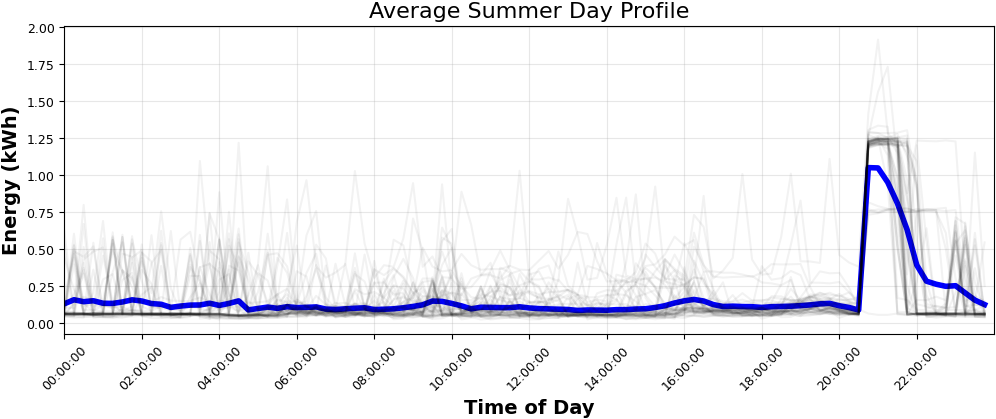

In [ ]:
# ---------------------
# DEFINE HELPER METHODS
# ---------------------
def calculate_average_day_profile(df):
    '''
        Calculates an average day profile (i.e. the mean consumption of every time of the day).
        Args:
            df: data frame to be analyzed
        Returns:
            data frame with average day profile
    '''
    # copy data frame such that it is not affected by changes
    df = df.copy()
    # add a columns about the time information
    df['time'] = df.index.tz_convert('UTC').time
    df = df.groupby(by='time').mean()
    df.sort_values(by='time', inplace=True)
    df.reset_index(inplace=True)
    df = df[['time', 'Value']]
    return df

# ---------------------
# APPLY CALCULATION
# ---------------------

# create copy with additional columns (as learned in a previous section)
df_copy = add_descriptive_columns(df_smd, basic=True, seasons=True, weekday=False, daytime=False)

# select only summer days
df_copy = df_copy[df_copy['summer']]

# calculate the average day profile
df_profile = calculate_average_day_profile(df_copy)

# ---------------------
# VISUALIZE
# ---------------------

# create figure
fig, ax = plt.subplots(figsize=(12, 4))

# plot the average day profile
ax.plot(df_profile.index.values, df_profile['Value'].values, color='blue', linewidth=4)

# plot some individual daily profiles as examples
for date in df_copy['date'].unique()[50:100]:
  df_sub = df_copy.loc[df_copy['date'] == date].copy()
  df_sub.sort_values(by='time_utc', inplace=True)
  df_sub.reset_index(inplace=True)
  ax.plot(df_sub.index.values, df_sub['Value'].values, color='black', alpha=0.05)

# set xlabels
xticks = range(0, 96, 8)
xlabels = df_profile.iloc[xticks]['time'].values
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45)

# additional formatting
ax.set_xlim(0, 96)
ax.set_xlabel('Time of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Energy (kWh)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.title('Average Summer Day Profile', fontsize=16)
plt.show()

<a name=clustering_algorithms></a>
### **8.3 Applying clustering algorithms**
Both the energy signature profile and average daily profile shown above can be computed for multiple households. If we apply a clustering algorithm to either the average daily profiles or the energy signature profiles, we **can cluster and group households according to their similarities** - i.e., perform customer segmentation.

To show you an **example of applying clustering algorithms to average daily profiles**, we have already calculated them for several Swiss households. The data comes from a large Swiss utility called CKW and is [publicly available](https://www.ckw.ch/landingpages/open-data). Here we use only a subset of 1000 households and calculate only the average daily profiles for the month of January. We have already loaded the data in the [load data section](#data_imports). So, let's take a look at it.

In [ ]:
display(df_profiles)

0      1      2      3      4      5  \
id                                                                           
05799b091d77acb8963bc4f189cbbc94  0.021  0.020  0.018  0.015  0.014  0.014   
057c30dbdc165d5dbc8dfaba85be5be7  0.566  0.557  0.799  0.908  0.822  0.770   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.014  0.013  0.013  0.015  0.015  0.013   
057d57d2e17e556e76045ec53f58beb2  0.459  0.342  0.286  0.342  0.900  0.858   
057d990ed2aee058d63f15f30443f9e4  0.631  0.624  0.624  0.620  0.629  0.634   
...                                 ...    ...    ...    ...    ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.086  0.126  0.101  0.084  0.093  0.082   
a427d8292c36aadbf48269008ce844b3  0.620  0.480  0.437  0.522  0.842  0.413   
a428b13bc581d14804c35c1f6b4169be  2.800  3.114  3.097  2.848  2.614  2.765   
a429fd879fe72a1660cbd364cced304b  0.463  0.482  0.457  0.443  0.497  0.480   
a42a3bba9dcf618c93b5cbb32da24a32  0.445  0.509  0.362  0.367  0.754  0.709   

                                      6      7      8      9  ...     86  \
id                                                            ...          
05799b091d77acb8963bc4f189cbbc94  0.013  0.012  0.013  0.013  ...  0.056   
057c30dbdc165d5dbc8dfaba85be5be7  0.658  0.609  0.934  0.931  ...  0.040   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.013  0.015  0.015  0.014  ...  0.037   
057d57d2e17e556e76045ec53f58beb2  0.660  0.592  0.521  0.160  ...  0.113   
057d990ed2aee058d63f15f30443f9e4  0.632  0.634  0.638  0.632  ...  0.632   
...                                 ...    ...    ...    ...  ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.082  0.087  0.079  0.075  ...  0.166   
a427d8292c36aadbf48269008ce844b3  0.439  0.400  0.406  0.353  ...  0.476   
a428b13bc581d14804c35c1f6b4169be  2.877  3.013  3.371  2.895  ...  0.441   
a429fd879fe72a1660cbd364cced304b  0.531  0.475  0.398  0.283  ...  0.137   
a42a3bba9dcf618c93b5cbb32da24a32  0.681  0.273  0.224  0.117  ...  0.130   

                                     87     88     89     90     91     92  \
id                                                                           
05799b091d77acb8963bc4f189cbbc94  0.054  0.044  0.040  0.037  0.033  0.029   
057c30dbdc165d5dbc8dfaba85be5be7  0.040  0.581  0.752  0.773  0.782  0.713   
057c3fcbdcbfd97b9f8a50fb34f385d6  0.034  0.033  0.034  0.032  0.029  0.025   
057d57d2e17e556e76045ec53f58beb2  0.180  0.727  0.723  0.719  0.529  0.431   
057d990ed2aee058d63f15f30443f9e4  0.618  0.612  0.617  0.624  0.622  0.624   
...                                 ...    ...    ...    ...    ...    ...   
a42793c65fddea7c1f8228f8d4742635  0.163  0.176  0.193  0.166  0.136  0.142   
a427d8292c36aadbf48269008ce844b3  0.593  0.847  0.579  0.580  0.537  0.632   
a428b13bc581d14804c35c1f6b4169be  0.629  0.974  1.541  1.746  1.910  1.880   
a429fd879fe72a1660cbd364cced304b  0.189  0.417  0.357  0.374  0.369  0.232   
a42a3bba9dcf618c93b5cbb32da24a32  0.119  0.118  0.127  0.108  0.132  0.452   

                                     93     94     95  
id                                                     
05799b091d77acb8963bc4f189cbbc94  0.024  0.023  0.022  
057c30dbdc165d5dbc8dfaba85be5be7  0.563  0.470  0.528  
057c3fcbdcbfd97b9f8a50fb34f385d6  0.024  0.021  0.018  
057d57d2e17e556e76045ec53f58beb2  0.471  0.488  0.518  
057d990ed2aee058d63f15f30443f9e4  0.634  0.632  0.636  
...                                 ...    ...    ...  
a42793c65fddea7c1f8228f8d4742635  0.068  0.058  0.069  
a427d8292c36aadbf48269008ce844b3  0.433  0.415  0.438  
a428b13bc581d14804c35c1f6b4169be  2.270  2.557  2.546  
a429fd879fe72a1660cbd364cced304b  0.249  0.273  0.282  
a42a3bba9dcf618c93b5cbb32da24a32  0.540  0.494  0.332  

[1000 rows x 96 columns]

Since the data is in **15 minute resolution**, there are 4 measurements per hour and thus 96 measurements per day. Consequently, the **average daily profiles have 96 values encoded in the columns** of the data frame, while the **rows refer to households** uniquely identified by their ID.

Now **we apply a K-means algorithm** to the data to cluster households with similar patterns in their average daily profiles. Finally, we visualize the individual clusters.

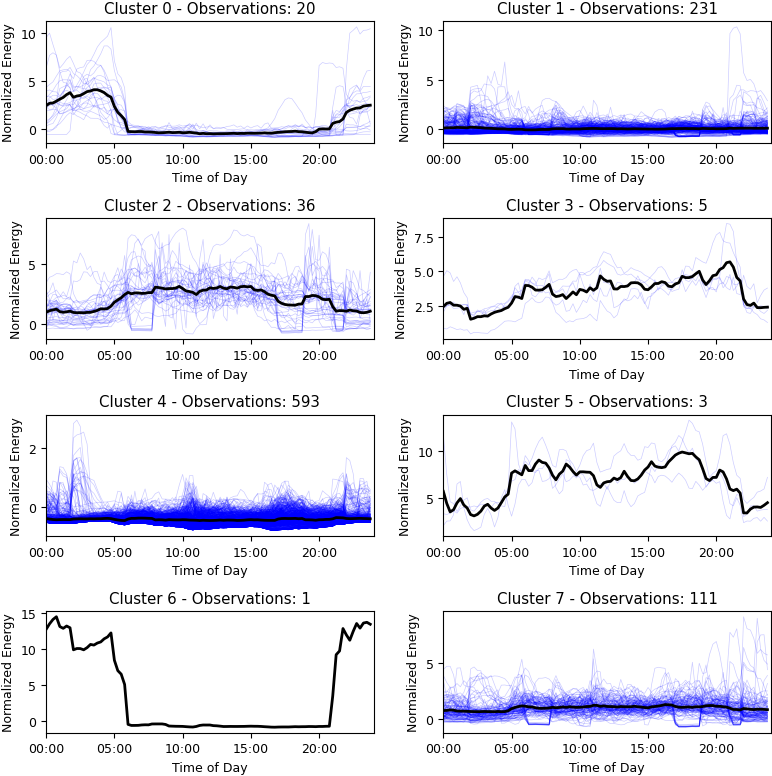

In [ ]:
# extract the data and scale / normalized the profiles
np_scaled = StandardScaler().fit_transform(df_profiles.values)

# define the number of clusters, fit the model to the scaled profiles and predict
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
np_preds = kmeans.fit_predict(np_scaled)

# create the figure
fig, ax = plt.subplots(int(math.ceil(n_clusters/2)), 2, figsize=(8, 8))
ax = ax.flatten()

# to visualize the clusters, loop over the clusters (i.e. unique labels of predictions)
for idx in np.unique(np_preds):

  # get the indices of the elements (rows) that belong to the same cluster
  indices = np.where(np_preds == idx)[0]

  # use the indices to get the relevant profiles
  np_profs = np_scaled[indices, :].T

  # plot all profiles of a cluster and their mean profile
  ax[idx].plot(np_profs, color='blue', alpha=0.2, linewidth=0.5)
  ax[idx].plot(np.mean(np_profs, axis=1), color='black', linewidth=2)

  # adjust additional formatting
  ax[idx].set_ylabel('Normalized Energy')
  ax[idx].set_xlabel('Time of Day')
  ax[idx].set_xticks(ax[idx].get_xticks())
  ax[idx].set_xticklabels(['{:02d}:{:02d}'.format(int(e/4), int(e%4)) for e in ax[idx].get_xticks()])
  ax[idx].set_title('Cluster {} - Observations: {}'.format(idx, len(indices)))
  ax[idx].set_xlim(0, 96)

# show
plt.tight_layout()
plt.show()

[Bring me back to the outline](#outline)

<a name=load_forecasting></a>
# **9. Load Forecasting** 🔭

**Load forecasting** refers to **predicting energy demand at the building level for the near future**. This can be done from minutes to days in advance and is important for grid operators and utilities to make informed decisions. Consequently, it can be considered an **important pillar for proper load management to maintain grid stability**. In general, load forecasting is a very popular research area that is closely related to time series forecasting in general. If you want to explore different load forecasting methodologies, [8] is a good starting point.

<a name=load_forecasting_introduction></a>
### **9.1 Brief and short introduction**

In the [list of tutorials](https://www.climatechange.ai/tutorials?) provided by the [Climate Change AI](https://www.climatechange.ai) initiative, you will find [**one tutorial**](https://colab.research.google.com/drive/1ZWpJY03xLIsUrlOzgTNHemKyLatMgKrp?usp=sharing) **that deals specifically with load forecasting with smart meter data**. Therefore, we will not repeat the content here, but recommend that you view the other tutorial if you are interested in this topic. The tutorial briefly covers the following points:
- Load forecasting in different spatial and temporal dimensions.
- Overview of forecasting methods
- Formulation of forecasting as a machine learning problem
- Generation of feature candidates  
- Fitting baseline models and neural networks
- Common pitfalls
- Different methods of cross-validation

[Bring me back to the outline](#outline)

<a name=conclusion></a>
# **10. Conclusion**

Smart meter data is time series data that provides a variety of ways to monitor activity on the power grid. After this tutorial, you should now be familiar with the most common use cases for smart meter data analytics. However, because it is a dynamic area of research, new use cases and techniques are being released all the time. This tutorial provides you with a practical introduction to this highly dynamic research area, as you can get more out of smart meter data with a few tips, tricks, and expertise. We hope you found it useful and learned something. We'd be even happier if you'd like to learn more about smart meter analytics and contribute to this topic. Below are additional resources as possible follow-ups. Of course, you are welcome to pass on these materials to interested colleagues.

[Bring me back to the outline](#outline)

<a name=additional_resources></a>
# **11. Additional Resources**
If you would like to continue learning after this tutorial, below are some additional resources in the form of publicly available data sets, useful software packages, and articles. You may also want to use these resources for other work with time series data of any kind.

<a name=resources_data_sets></a>
### **11.1. Data Sets**
If you want to apply what you have learned in this tutorial to other data sets, below is a list of possible starting points. Which data set is appropriate for your purposes depends on the use case you want to cover, as data varies in terms of resolution, types of dwellings measured, and appliances covered. However, **all data sets listed below contain real-world data**.


| Name | Links | Description |
| ----- | ----- | ----- |
| **CKW** | [[Website](https://www.ckw.ch/landingpages/open-data)] | Energy consumption data in 15-resolution from households and small businesses with total annual consumption <= 25 MWh. Provided by one of the biggest utility companies in Switzerland. |
| **UK-DALE** | [[Website](https://ukerc.rl.ac.uk/DC/cgi-bin/edc_search.pl?GoButton=Detail&WantComp=41)] | Appliance-by-appliance and whole-home power demand for 5 UK homes recorded approximately once every 6s. |
| **WPuQ** | [[Publication](https://www.nature.com/articles/s41597-022-01156-1)] [[GitHub](https://github.com/ISFH/WPuQ)] [[Download](https://zenodo.org/record/5642902#.Y_RtaC9Xbyg)] | Voltage, reactive power and active power of 38 households. Separate measurements for total household load, heat pump and at the local power transformer level. |
|**Building Genome** |[[GitHub V2](https://github.com/buds-lab/building-data-genome-project-2)] [[GitHub V1](https://github.com/buds-lab/the-building-data-genome-project)] | Open data set made up of 3,053 energy meters from 1,636 buildings |
| **Low Carbon London** | [[Website](https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households)] | Energy consumption readings for a sample of 5,567 households in London. |
|**Meter Data** | [[Website](https://www.energy-use.org/data/)] | One minute electricity readings available upon request for research purpose.|  

See also another **curated list of data sets with smart meter data**. The list is particularly useful for load forecasting, but can be used for other tasks as well. You can find the list [here](https://low-voltage-loadforecasting.github.io).

<a name=resources_software></a>
### **11.2. Software Packages**
Below you can find a useful list of software tools to check out in the context of smart meter data analytics.

| Name | Links | Description |
| ----- | ----- | ----- |
| **tslearn** | [[GitHub](https://github.com/tslearn-team/tslearn/)] [[Docs](https://tslearn.readthedocs.io/en/stable/index.html)] | Python package that provides machine learning tools for the analysis of time series. |
| **pyflux** | [[GitHub](https://github.com/RJT1990/pyflux)] [[Docs](https://pyflux.readthedocs.io/en/latest/index.html)] | Python package for probabilistic approach to time series modelling. |
| **seglearn** | [[GitHub](https://github.com/dmbee/seglearn)] [[Docs](https://dmbee.github.io/seglearn/index.html)] | Pipeline for segmentation, feature extraction, feature processing, and final estimators in the context of time series data. |
|**Darts**| [[GitHub](https://github.com/unit8co/darts)] [[Docs](https://pypi.org/project/darts/)] | Python library for forecasting and anomaly detection on time series. |
|**pyts++**| [[GitHub](https://github.com/johannfaouzi/pyts)] [[Documentation](https://pyts.readthedocs.io/en/stable/)] | Python package for time series classification |
| **demod** | [[GitHub](https://github.com/epfl-herus/demod)] [[Docs](https://demod.readthedocs.io/en/latest/)] | A Python library for assembling bottom-up domestic energy demand models |
| **VISDOM** | [[GitHub](https://github.com/ConvergenceDA/visdom)][[Conference Paper](https://link.springer.com/chapter/10.1007/978-3-319-20889-3_32)] | Toolkit for time series analysis and related modeling for utility interval meter data |
|**Temporal Data Mining by Clayton Miller** |[[GitHub](https://github.com/buds-lab/temporal-features-for-nonres-buildings-library)] [[Doctoral Thesis]](https://www.research-collection.ethz.ch/handle/20.500.11850/125778) | Useful hands on collection of example notebooks for smart meter data analysis. |
|**SHAP (SHapley Additive exPlanations)**| [[GitHub](https://github.com/slundberg/shap)] | Package for ML-explainability and feature influence.|
|**prophet**| [[Website](https://facebook.github.io/prophet/)]| Procedure for forecasting time series data. |
|**DiCE** | [[GitHub](https://github.com/interpretml/DiCE)] [[Website](https://interpret.ml)] [[arxiv Paper](https://arxiv.org/abs/1905.07697)]| Python Implementation of counterfactual explanations. |
|**tsfresh** | [[GitHub](https://github.com/blue-yonder/tsfresh)] [[Docs](https://tsfresh.readthedocs.io/en/latest/)]| Python package for systematic time-series feature extraction. |  
| **changefinder** | [[pypi](https://pypi.org/project/changefinder/0.03/)] | Python library for online change point detection. |
|**ruptures**| [[Website](https://centre-borelli.github.io/ruptures-docs/)] [[Docs](https://pypi.org/project/ruptures/)] | Python library for offline change point detection |
|**ALDI++**| [[GitHub](https://github.com/buds-lab/aldiplusplus)] [[Paper](https://www.sciencedirect.com/science/article/abs/pii/S0378778822002675)] | Discord and outlier detection for building energy load profiles |
|**saxpy** | [[GitHub](https://github.com/seninp/saxpy)] [[pypi](https://pypi.org/project/saxpy/)] | Python package for Symbolic Aggregate approXimation (SAX) |
|**stumpy** | [[Website](https://stumpy.readthedocs.io/en/latest/index.html)] [[GitHub](https://github.com/TDAmeritrade/stumpy)] | Python library to efficiently compute matrix profiles. |
|**Energy Signature Analyser** | [[GitLab](https://gitlab.com/energyincities/energy-signature-analyser)] | Toolbox to analyze energy signatures of buildings and compare the signatures of all buildings within an entire building stock. |  
|**clock plot** | [[GitHub](https://github.com/ES-Catapult/clock_plot)] | Visualize timeseries data in radar plot, mapping 24 hours onto the 360 degrees of a polar plot. |
|**nilmtk** | [[Website](https://nilmtk.github.io)] [[GitHub](https://github.com/nilmtk/nilmtk)] | A toolkit designed to help researchers evaluate the accuracy of NILM algorithms. |

<a name=resources_other></a>
### **11.3. Other**

#### **More on time series analysis in general**
1. [Script and slides on applied time series analysis with R - part of a course at ETH Zurich](https://stat.ethz.ch/lectures/ss19/applied-time-series.php#course_materials)

#### **More on data transformation and scaling techniques:**
  1. [Normalizing Energy Data by Degree Days](https://www.energylens.com/articles/degree-days)
  2. [Guide: "Feature Transformation and Sclaing Techniques to Boost You Model Performance"](https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/)
  3. [Guide: "How to Transform Data to Better Fit the Normal Distribution"](https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/)
  4. [Sklearn Overview on Dataset Transformations](https://scikit-learn.org/stable/data_transforms.html)

#### **More on change point and anomaly detection:**
1. [Guide: A Brief Introduction to Change Point Detection using Python](https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/)
2. [A collection of notebooks for change point detection with Python](https://github.com/amanahuja/change-detection-tutorial)
3. [Keras Tutorial: Timeseries anomaly detection using an Autoencoder](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)

[Bring me back to the outline](#outline)

<a name="references"></a>
# **References** 📚

[1] Makonin, Stephen. (2014). Real-Time Embedded Low-Frequency Load Disaggregation.

[2] Van de Kaa, G., Fens, T., Rezaei, J., Kaynak, D., Hatun, Z., & Tsilimeni-Archangelidi, A. (2019). Realizing smart meter connectivity: Analyzing the competing technologies Power line communication, mobile telephony, and radio frequency using the best worst method. Renewable and Sustainable Energy Reviews, 103, 320-327.

[3] U.S. Energy Information Administration. (2017). Nearly half of all U.S. electricity customers have smart meters. Online: https://www.eia.gov/todayinenergy/detail.php?id=34012 (Last accessed: 2022-Feb-14).

[4] Smart Energy International. (2021). Asia to deploy more than 570 million smart electricity meters. Online: https://www.smart-energy.com/industry-sectors/smart-meters/smart-electricity-meters-rollout-in-china-india-japan-and-south-korea/ (Last accessed: 2022-Feb-14).

[5] Efkarpidis, N., Geidl, M., Wache, H., Peter, M., & Adam, M. (2022). Smart Metering Applications. In Smart Metering Applications: Main Concepts and Business Models (pp. 13-124). Cham: Springer International Publishing.

[6] Brudermueller, T., Wirth, F., Weigert, A., & Staake, T. (2022, October). Automatic differentiation of variable and fixed speed heat pumps with smart meter data. In 2022 IEEE International Conference on Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm) (pp. 412-418). IEEE.

[7] Müller, F. L., & Jansen, B. (2019). Large-scale demonstration of precise demand response provided by residential heat pumps. Applied Energy, 239, 836-845.

[8] Alani, A. Y., & Osunmakinde, I. O. (2017). Short-term multiple forecasting of electric energy loads for sustainable demand planning in smart grids for smart homes. Sustainability, 9(11), 1972.

[9] Aminikhanghahi, S., & Cook, D. J. (2017). A survey of methods for time series change point detection. Knowledge and information systems, 51(2), 339-367.

[10] Leprince, J., Miller, C., & Zeiler, W. (2021). Data mining cubes for buildings, a generic framework for multidimensional analytics of building performance data. Energy and Buildings, 248, 111195.

[11] Miller, C., Nagy, Z., & Schlueter, A. (2018). A review of unsupervised statistical learning and visual analytics techniques applied to performance analysis of non-residential buildings. Renewable and Sustainable Energy Reviews, 81, 1365-1377.

[12] Miller, C., Nagy, Z., & Schlueter, A. (2015). Automated daily pattern filtering of measured building performance data. Automation in Construction, 49, 1-17.

[13] Westermann, P., Deb, C., Schlueter, A., & Evins, R. (2020). Unsupervised learning of energy signatures to identify the heating system and building type using smart meter data. Applied Energy, 264, 114715.

[14] Pereira, L., & Nunes, N. (2018). Performance evaluation in non‐intrusive load monitoring: Datasets, metrics, and tools—A review. Wiley Interdisciplinary Reviews: data mining and knowledge discovery, 8(6), e1265.

[15] International Energy Agency. (2022). Energy transitions: Tracking progress in clean energy transitions through key indicators across fuels and technologies. Online: https://www.iea.org/topics/energy-transitions (Last accessed: 2022-Feb-23).

[16] Carroll, J., Lyons, S., & Denny, E. (2014). Reducing household electricity demand through smart metering: The role of improved information about energy saving. Energy Economics, 45, 234-243.

[17] D’Oca, S., Corgnati, S. P., & Buso, T. (2014). Smart meters and energy savings in Italy: Determining the effectiveness of persuasive communication in dwellings. Energy Research & Social Science, 3, 131-142.

[18] Schleich, J., Faure, C., & Klobasa, M. (2017). Persistence of the effects of providing feedback alongside smart metering devices on household electricity demand. Energy Policy, 107, 225-233.

[19] Clastres, C. (2011). Smart grids: Another step towards competition, energy security and climate change objectives. Energy policy, 39(9), 5399-5408.

[20] Phuangpornpitak, N., & Tia, S. (2013). Opportunities and challenges of integrating renewable energy in smart grid system. Energy Procedia, 34, 282-290.

[21] Stephens, J. C., Wilson, E. J., Peterson, T. R., & Meadowcroft, J. (2013). Getting smart? climate change and the electric grid. Challenges, 4(2), 201-216.

[22] Pinson, P., & Madsen, H. (2014). Benefits and challenges of electrical demand response: A critical review. Renewable and Sustainable Energy Reviews, 39, 686-699.

[23] Pereira, L, Nunes, N. Performance evaluation in non-intrusive load monitoring: Datasets, metrics, and tools—A review. WIREs Data Mining Knowl Discov. 2018; 8:e1265. https://doi.org/10.1002/widm.1265

[24] European Commission. (2018). Data protection impact assessment for smart grid and smart metering environment. Online: https://energy.ec.europa.eu/topics/markets-and-consumers/smart-grids-and-meters/data-protection-impact-assessment-smart-grid-and-smart-metering-environment_en#documents (Last accessed: 2023-Mar-28).

[Bring me back to the outline](#outline)